In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import style

In [4]:
import random

**Reading the data**

In [5]:
df1=pd.read_csv("ADANIENT.csv")
df2=pd.read_csv("ADANIGREEN.csv")
df3=pd.read_csv("ADANIPORTS.csv")
df4=pd.read_csv("ADANIPOWER.csv")
df5=pd.read_csv("ADANITRANS.csv")
df6=pd.read_csv("ATGL.csv")
df7=pd.read_csv("AWL.csv")

In [6]:
df1.head()

Date  series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
0  08-May-2023      EQ  1,920.30  1,926.90  1,876.00     1,920.30  1,892.00   
1  05-May-2023      EQ  1,954.80  1,955.00  1,903.15     1,911.25  1,919.20   
2  04-May-2023      EQ  1,839.05  1,935.00  1,839.05     1,839.00  1,925.00   
3  03-May-2023      EQ  1,919.00  1,940.00  1,785.35     1,919.85  1,834.00   
4  02-May-2023      EQ  1,935.00  1,966.00  1,908.00     1,924.95  1,919.00   

     close      vwap     52W H     52W L     VOLUME              VALUE   \
0  1,887.50  1,893.79  4,190.00  1,017.45  2,835,197   5,369,263,788.00   
1  1,920.30  1,930.87  4,190.00  1,017.45  6,137,744  11,851,215,203.30   
2  1,911.25  1,886.78  4,190.00  1,017.45  4,842,127   9,136,040,023.05   
3  1,839.00  1,856.55  4,190.00  1,017.45  5,849,432  10,859,776,808.70   
4  1,919.85  1,932.34  4,190.00  1,017.45  3,813,963   7,369,855,740.30   

  No of trades   
0       101,164  
1       207,327  
2       168,632  
3       228,734  
4       143,521

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           84 non-null     object
 1   series         84 non-null     object
 2   OPEN           84 non-null     object
 3   HIGH           84 non-null     object
 4   LOW            84 non-null     object
 5   PREV. CLOSE    84 non-null     object
 6   ltp            84 non-null     object
 7   close          84 non-null     object
 8   vwap           84 non-null     object
 9   52W H          84 non-null     object
 10  52W L          84 non-null     object
 11  VOLUME         84 non-null     object
 12  VALUE          84 non-null     object
 13  No of trades   84 non-null     object
dtypes: object(14)
memory usage: 9.3+ KB


Setting Company Name as Index and changing the Datatype of Date column to 'datetime64'

In [8]:
def set_ind(df,cmp_name):
    df[df.columns[0]] = df[df.columns[0]].apply(pd.to_datetime)
    df['Company']=cmp_name
    df.set_index('Company',inplace=True)

In [9]:
set_ind(df1,'ADANI ENTERPRISES')
set_ind(df2,'ADANI GREEN')
set_ind(df3,'ADANI PORTS')
set_ind(df4,'ADANI POWER')
set_ind(df5,'ADANI TRANSMISSION')
set_ind(df6,'ADANI TOTAL GAS LIMITED')
set_ind(df7,'ADANI WILMAR')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, ADANI ENTERPRISES to ADANI ENTERPRISES
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           84 non-null     datetime64[ns]
 1   series         84 non-null     object        
 2   OPEN           84 non-null     object        
 3   HIGH           84 non-null     object        
 4   LOW            84 non-null     object        
 5   PREV. CLOSE    84 non-null     object        
 6   ltp            84 non-null     object        
 7   close          84 non-null     object        
 8   vwap           84 non-null     object        
 9   52W H          84 non-null     object        
 10  52W L          84 non-null     object        
 11  VOLUME         84 non-null     object        
 12  VALUE          84 non-null     object        
 13  No of trades   84 non-null     object        
dtypes: datetime64[ns](1), object(13)
memory usage: 9.8

**Renaming the columns**

In [11]:
df1.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [12]:
dict={}
for i in df1.columns:
    dict[i]=i[:-1]

In [13]:
dict

{'Date ': 'Date',
 'series ': 'series',
 'OPEN ': 'OPEN',
 'HIGH ': 'HIGH',
 'LOW ': 'LOW',
 'PREV. CLOSE ': 'PREV. CLOSE',
 'ltp ': 'ltp',
 'close ': 'close',
 'vwap ': 'vwap',
 '52W H ': '52W H',
 '52W L ': '52W L',
 'VOLUME ': 'VOLUME',
 'VALUE ': 'VALUE',
 'No of trades ': 'No of trades'}

In [14]:
def rename_col(df,dict):
    df.rename(columns = dict, inplace = True)

In [15]:
rename_col(df1,dict)
rename_col(df2,dict)
rename_col(df3,dict)
rename_col(df4,dict)
rename_col(df5,dict)
rename_col(df6,dict)
rename_col(df7,dict)


In [16]:
def convert_to_float(x):
    return float(x.replace(',',''))

In [17]:
dfs=[df1,df2,df3,df3,df4,df5,df6,df7]
for df in dfs:
    for col in df.columns[2:]:
        if df[col].dtype=='O':  # Check whether the column is object type or not
            df[col] = df[col].apply(convert_to_float)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, ADANI ENTERPRISES to ADANI ENTERPRISES
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          84 non-null     datetime64[ns]
 1   series        84 non-null     object        
 2   OPEN          84 non-null     float64       
 3   HIGH          84 non-null     float64       
 4   LOW           84 non-null     float64       
 5   PREV. CLOSE   84 non-null     float64       
 6   ltp           84 non-null     float64       
 7   close         84 non-null     float64       
 8   vwap          84 non-null     float64       
 9   52W H         84 non-null     float64       
 10  52W L         84 non-null     float64       
 11  VOLUME        84 non-null     float64       
 12  VALUE         84 non-null     float64       
 13  No of trades  84 non-null     float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 9.8+ KB

In [19]:
df1.head()

Date series     OPEN    HIGH      LOW  PREV. CLOSE  \
Company                                                                      
ADANI ENTERPRISES 2023-05-08     EQ  1920.30  1926.9  1876.00      1920.30   
ADANI ENTERPRISES 2023-05-05     EQ  1954.80  1955.0  1903.15      1911.25   
ADANI ENTERPRISES 2023-05-04     EQ  1839.05  1935.0  1839.05      1839.00   
ADANI ENTERPRISES 2023-05-03     EQ  1919.00  1940.0  1785.35      1919.85   
ADANI ENTERPRISES 2023-05-02     EQ  1935.00  1966.0  1908.00      1924.95   

                      ltp    close     vwap   52W H    52W L     VOLUME  \
Company                                                                   
ADANI ENTERPRISES  1892.0  1887.50  1893.79  4190.0  1017.45  2835197.0   
ADANI ENTERPRISES  1919.2  1920.30  1930.87  4190.0  1017.45  6137744.0   
ADANI ENTERPRISES  1925.0  1911.25  1886.78  4190.0  1017.45  4842127.0   
ADANI ENTERPRISES  1834.0  1839.00  1856.55  4190.0  1017.45  5849432.0   
ADANI ENTERPRISES  1919.0  1919.85  1932.34  4190.0  1017.45  3813963.0   

                          VALUE  No of trades  
Company                                        
ADANI ENTERPRISES  5.369264e+09      101164.0  
ADANI ENTERPRISES  1.185122e+10      207327.0  
ADANI ENTERPRISES  9.136040e+09      168632.0  
ADANI ENTERPRISES  1.085978e+10      228734.0  
ADANI ENTERPRISES  7.369856e+09      143521.0

In [20]:
df2.head()

Date series    OPEN    HIGH     LOW  PREV. CLOSE     ltp  \
Company                                                                      
ADANI GREEN 2023-05-08     EQ  922.00  925.95  903.30       940.55  913.45   
ADANI GREEN 2023-05-05     EQ  946.95  957.65  933.00       945.55  938.50   
ADANI GREEN 2023-05-04     EQ  936.00  950.00  933.50       942.05  943.65   
ADANI GREEN 2023-05-03     EQ  972.00  980.00  928.95       974.65  942.00   
ADANI GREEN 2023-05-02     EQ  994.75  998.55  951.15       951.00  977.00   

              close    vwap   52W H  52W L     VOLUME         VALUE  \
Company                                                               
ADANI GREEN  917.30  915.22  2840.0  439.1  3406153.0  3.117365e+09   
ADANI GREEN  940.55  940.93  2955.0  439.1  3266241.0  3.073302e+09   
ADANI GREEN  945.55  944.67  2955.0  439.1  3394830.0  3.206991e+09   
ADANI GREEN  942.05  953.46  2955.0  439.1  1870972.0  1.783892e+09   
ADANI GREEN  974.65  984.49  2955.0  439.1  3323308.0  3.271778e+09   

             No of trades  
Company                    
ADANI GREEN       83982.0  
ADANI GREEN       64518.0  
ADANI GREEN       76979.0  
ADANI GREEN       74453.0  
ADANI GREEN       80064.0

In [21]:
df3.head()

Date series   OPEN    HIGH     LOW  PREV. CLOSE     ltp  \
Company                                                                     
ADANI PORTS 2023-05-08     EQ  684.7  690.65  678.60       683.90  685.90   
ADANI PORTS 2023-05-05     EQ  682.8  693.60  677.50       679.75  683.10   
ADANI PORTS 2023-05-04     EQ  670.0  682.00  667.70       669.65  680.15   
ADANI PORTS 2023-05-03     EQ  675.0  684.85  656.75       681.50  668.00   
ADANI PORTS 2023-05-02     EQ  683.8  685.90  672.60       681.30  681.00   

              close    vwap   52W H  52W L     VOLUME         VALUE  \
Company                                                               
ADANI PORTS  685.10  684.86  987.85  395.1  3671007.0  2.514114e+09   
ADANI PORTS  683.90  684.47  987.85  395.1  5193692.0  3.554950e+09   
ADANI PORTS  679.75  674.08  987.85  395.1  5124811.0  3.454518e+09   
ADANI PORTS  669.65  673.54  987.85  395.1  5645727.0  3.802602e+09   
ADANI PORTS  681.50  679.76  987.85  395.1  5563089.0  3.781577e+09   

             No of trades  
Company                    
ADANI PORTS       58366.0  
ADANI PORTS       65110.0  
ADANI PORTS       87207.0  
ADANI PORTS       82651.0  
ADANI PORTS       99001.0

In [22]:
df4.head()

Date series    OPEN    HIGH     LOW  PREV. CLOSE     ltp  \
Company                                                                      
ADANI POWER 2023-05-08     EQ  244.00  247.80  235.35       239.85  238.65   
ADANI POWER 2023-05-05     EQ  240.90  243.40  236.50       238.15  240.10   
ADANI POWER 2023-05-04     EQ  231.00  239.80  230.65       231.65  238.45   
ADANI POWER 2023-05-03     EQ  235.45  244.90  224.15       235.95  230.00   
ADANI POWER 2023-05-02     EQ  230.00  236.05  227.65       224.85  236.00   

              close    vwap  52W H  52W L      VOLUME         VALUE  \
Company                                                               
ADANI POWER  238.70  239.69  432.5  132.4   6805988.0  1.631309e+09   
ADANI POWER  239.85  239.71  432.5  132.4   5879771.0  1.409442e+09   
ADANI POWER  238.15  236.92  432.5  132.4   7562540.0  1.791682e+09   
ADANI POWER  231.65  234.82  432.5  132.4  19375629.0  4.549826e+09   
ADANI POWER  235.95  234.34  432.5  132.4  15316767.0  3.589378e+09   

             No of trades  
Company                    
ADANI POWER       65958.0  
ADANI POWER       56890.0  
ADANI POWER       74755.0  
ADANI POWER      154532.0  
ADANI POWER       75708.0

In [23]:
df5.head()

Date series     OPEN     HIGH      LOW  PREV. CLOSE  \
Company                                                                        
ADANI TRANSMISSION 2023-05-08     EQ   949.05   949.05   949.05       999.00   
ADANI TRANSMISSION 2023-05-05     EQ  1028.70  1030.00   997.60      1011.55   
ADANI TRANSMISSION 2023-05-04     EQ   993.05  1025.35   990.00       993.05   
ADANI TRANSMISSION 2023-05-03     EQ  1023.00  1036.00   984.00      1021.95   
ADANI TRANSMISSION 2023-05-02     EQ  1022.00  1077.70  1015.00      1029.45   

                        ltp    close     vwap    52W H  52W L     VOLUME  \
Company                                                                    
ADANI TRANSMISSION   949.05   949.05   949.05  4236.75  631.5   574862.0   
ADANI TRANSMISSION   999.00   999.00  1004.95  4236.75  631.5   267732.0   
ADANI TRANSMISSION  1015.00  1011.55  1002.86  4236.75  631.5   247361.0   
ADANI TRANSMISSION   994.80   993.05  1009.94  4236.75  631.5   694882.0   
ADANI TRANSMISSION  1022.90  1021.95  1047.02  4236.75  631.5  1329916.0   

                           VALUE  No of trades  
Company                                         
ADANI TRANSMISSION  5.455728e+08       13827.0  
ADANI TRANSMISSION  2.690565e+08       15155.0  
ADANI TRANSMISSION  2.480681e+08       14595.0  
ADANI TRANSMISSION  7.017873e+08       31398.0  
ADANI TRANSMISSION  1.392446e+09       49313.0

In [24]:
df6.head()

Date series   OPEN   HIGH     LOW  PREV. CLOSE  \
Company                                                                        
ADANI TOTAL GAS LIMITED 2023-05-08     EQ  880.0  887.8  872.90       918.80   
ADANI TOTAL GAS LIMITED 2023-05-05     EQ  938.0  939.0  915.40       930.20   
ADANI TOTAL GAS LIMITED 2023-05-04     EQ  916.0  935.0  911.70       922.95   
ADANI TOTAL GAS LIMITED 2023-05-03     EQ  958.0  958.0  915.85       959.05   
ADANI TOTAL GAS LIMITED 2023-05-02     EQ  950.0  990.0  941.20       945.00   

                            ltp   close    vwap   52W H  52W L     VOLUME  \
Company                                                                     
ADANI TOTAL GAS LIMITED  872.90  872.90  873.85  4000.0  650.0  1276025.0   
ADANI TOTAL GAS LIMITED  921.00  918.80  923.64  4000.0  650.0   288689.0   
ADANI TOTAL GAS LIMITED  932.95  930.20  926.21  4000.0  650.0   335815.0   
ADANI TOTAL GAS LIMITED  925.00  922.95  936.65  4000.0  650.0   716246.0   
ADANI TOTAL GAS LIMITED  957.00  959.05  965.52  4000.0  650.0  1279904.0   

                                VALUE  No of trades  
Company                                              
ADANI TOTAL GAS LIMITED  1.115057e+09       26918.0  
ADANI TOTAL GAS LIMITED  2.666441e+08       15575.0  
ADANI TOTAL GAS LIMITED  3.110366e+08       17759.0  
ADANI TOTAL GAS LIMITED  6.708738e+08       33247.0  
ADANI TOTAL GAS LIMITED  1.235776e+09       46356.0

In [25]:
df7.head()

Date series   OPEN    HIGH     LOW  PREV. CLOSE    ltp  \
Company                                                                     
ADANI WILMAR 2023-05-08     EQ  399.4  400.00  392.00       397.00  392.7   
ADANI WILMAR 2023-05-05     EQ  400.0  403.55  396.05       399.00  397.5   
ADANI WILMAR 2023-05-04     EQ  392.6  401.50  389.05       397.45  399.4   
ADANI WILMAR 2023-05-03     EQ  414.6  419.00  390.30       415.45  396.4   
ADANI WILMAR 2023-05-02     EQ  414.5  423.20  413.20       411.85  415.3   

               close    vwap  52W H   52W L     VOLUME         VALUE  \
Company                                                                
ADANI WILMAR  393.25  394.09  841.7  327.25  1414041.0  5.572612e+08   
ADANI WILMAR  397.00  398.95  841.7  327.25  1147292.0  4.577133e+08   
ADANI WILMAR  399.00  398.31  841.7  327.25  1678816.0  6.686848e+08   
ADANI WILMAR  397.45  403.36  841.7  327.25  4578768.0  1.846876e+09   
ADANI WILMAR  415.45  418.02  841.7  327.25  2441446.0  1.020574e+09   

              No of trades  
Company                     
ADANI WILMAR       32016.0  
ADANI WILMAR       24890.0  
ADANI WILMAR       31706.0  
ADANI WILMAR       80447.0  
ADANI WILMAR       38938.0

**Exploratory Data Analysis**

Analysing Volume of Stock Traded

In [26]:
def volume_analysis(df,cmp_name):
    plt.figure(figsize=(10,7))
    plt.plot(df['Date'],df['VOLUME'],c='orange')
    plt.title('Volume Of '+cmp_name+' Stock Prices')
    plt.ylabel('Volume')
    plt.show()

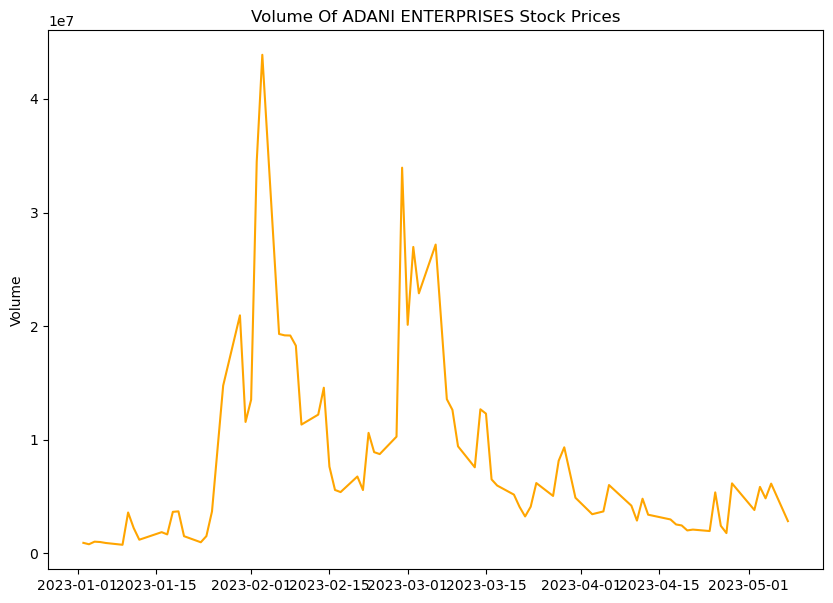

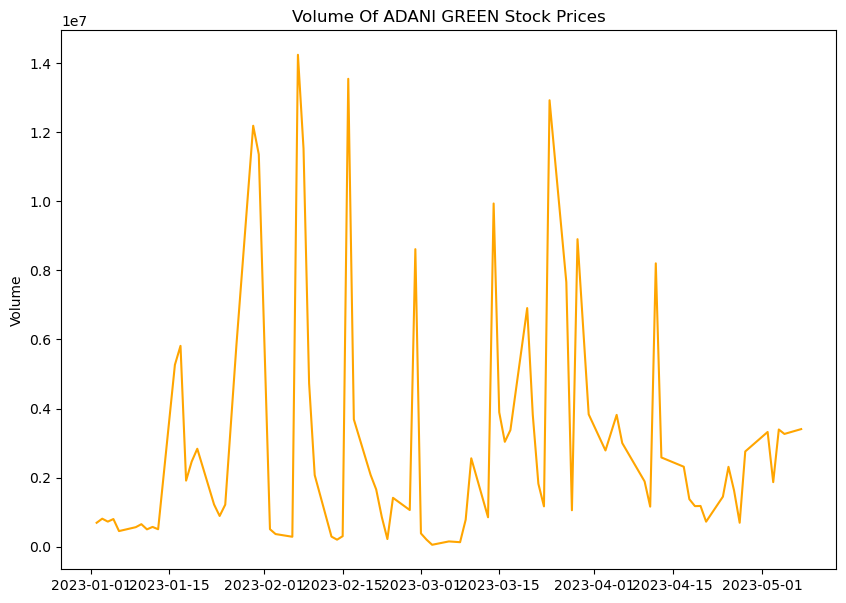

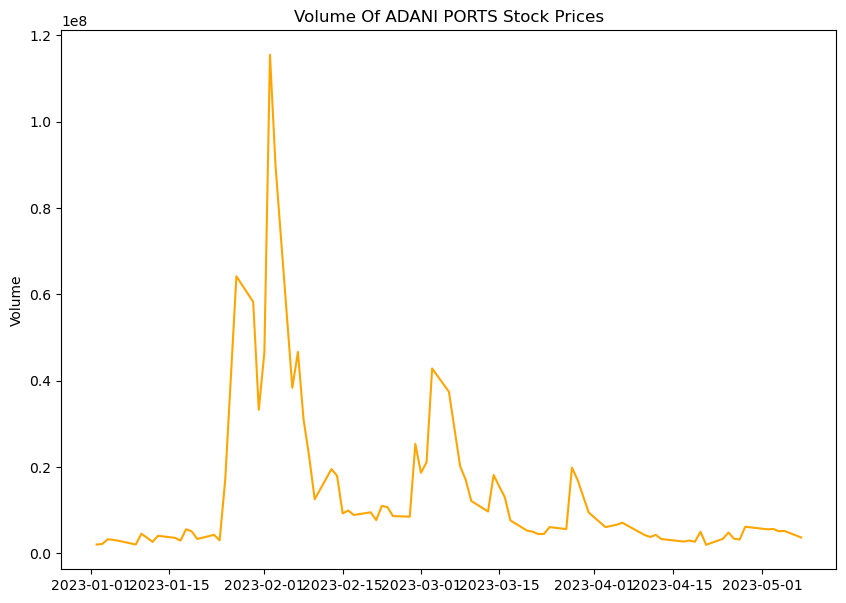

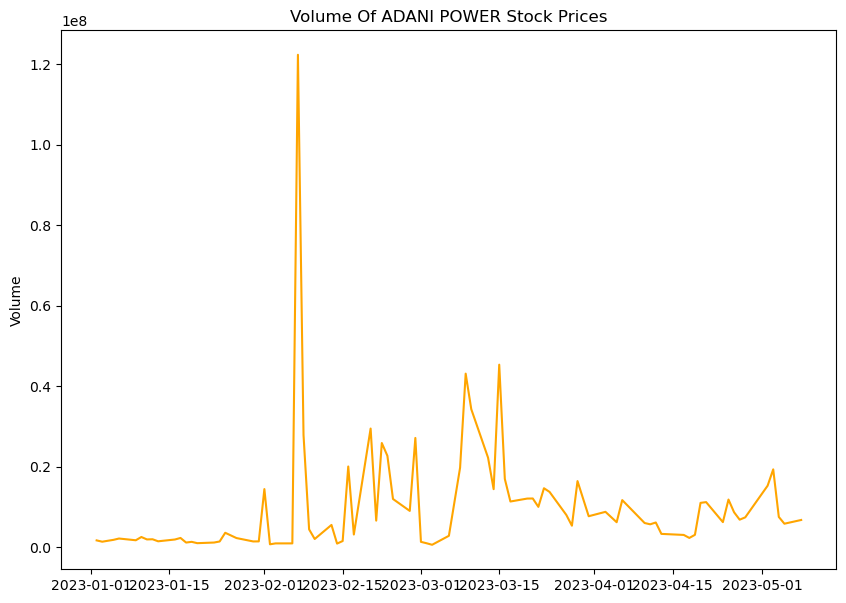

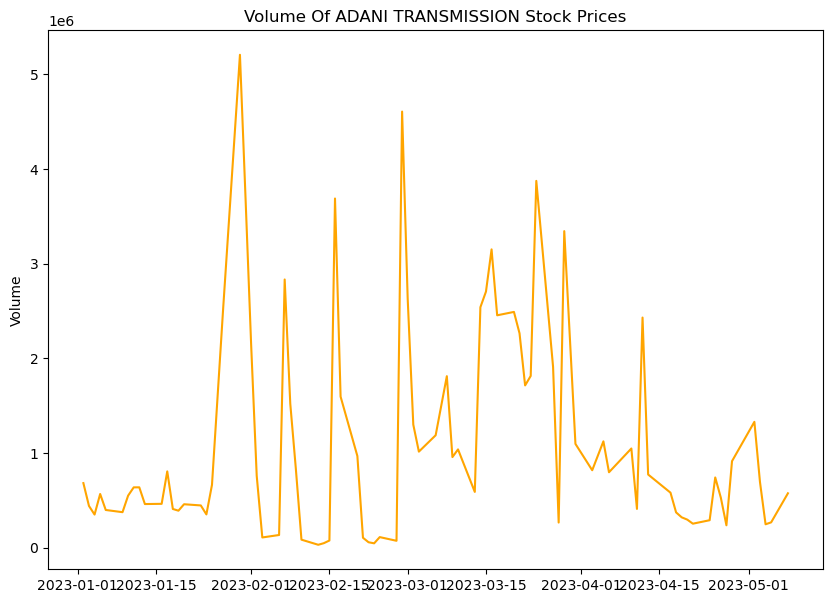

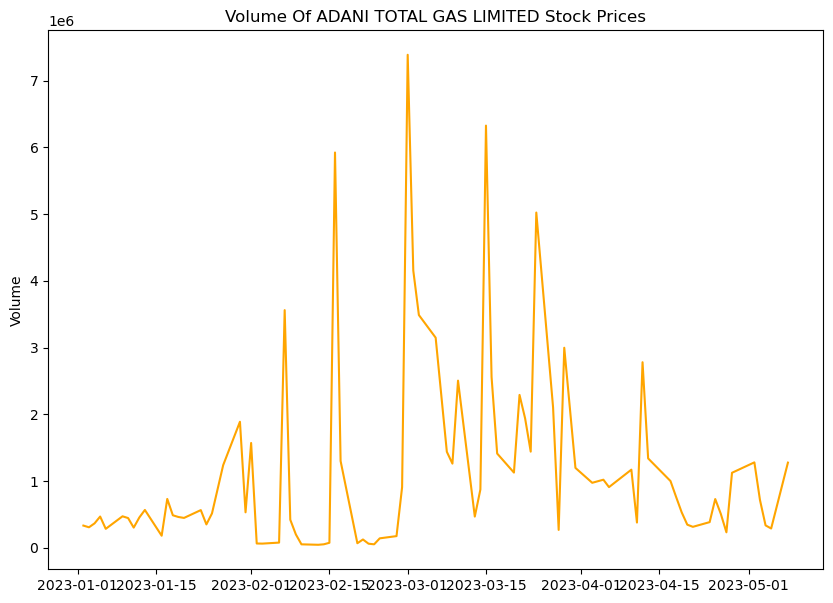

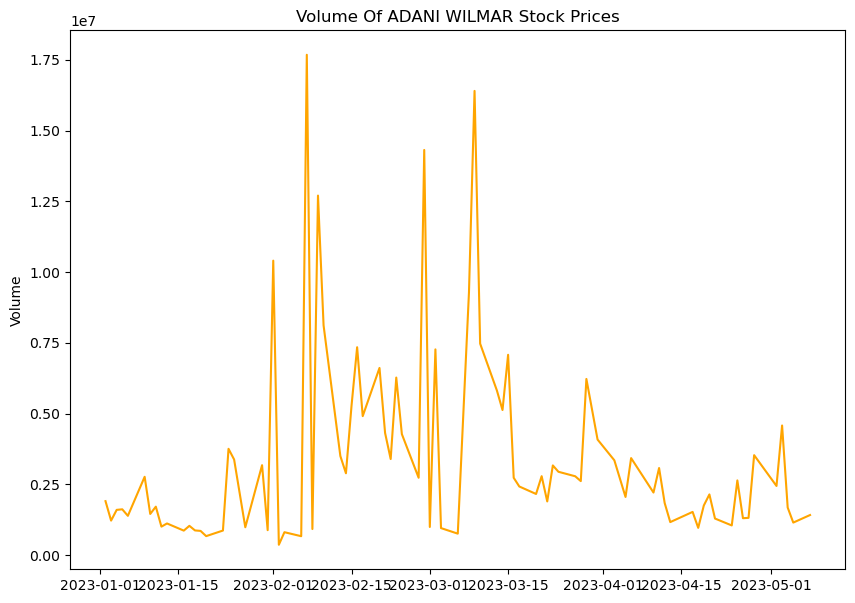

In [27]:
volume_analysis(df1,'ADANI ENTERPRISES')
volume_analysis(df2,'ADANI GREEN')
volume_analysis(df3,'ADANI PORTS')
volume_analysis(df4,'ADANI POWER')
volume_analysis(df5,'ADANI TRANSMISSION')
volume_analysis(df6,'ADANI TOTAL GAS LIMITED')
volume_analysis(df7,'ADANI WILMAR')

Analysing the Prices of stocks of ADANI Group Companies

In [28]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [29]:
def price(df,cmp_name,price_type):
    
    style_name='fivethirtyeight'
    plt.figure(figsize=(16,8))
   
    dict={'OPEN':'orange','HIGH':'blue','LOW':'purple','close':'green','PREV. CLOSE':'red','ltp':'orange','vwap':'green','52W H':'blue','52W L':'pink'}   
    
    plt.plot(df['Date'],df[price_type],c=dict[price_type])
    plt.ylabel(price_type.upper())
    plt.xlabel('Date')
    plt.title(price_type.upper()+" Price of "+cmp_name)
    plt.show()





Showing stock trends for OPEN price






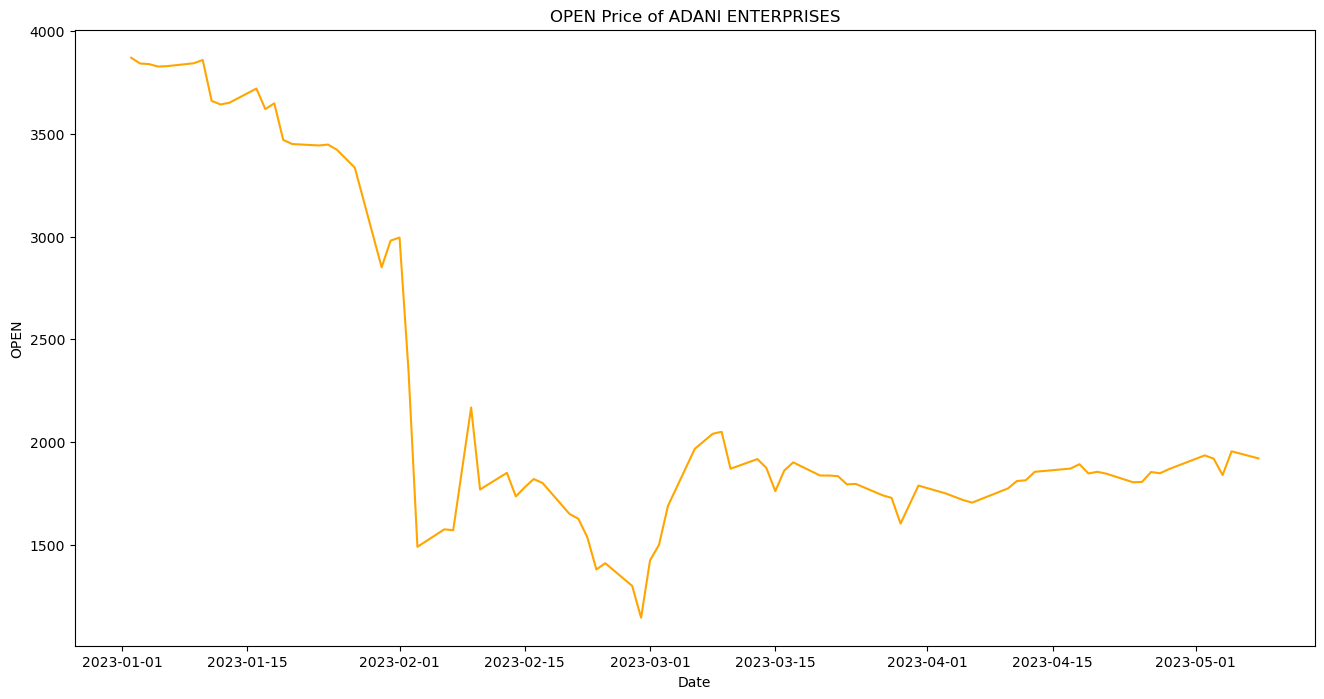

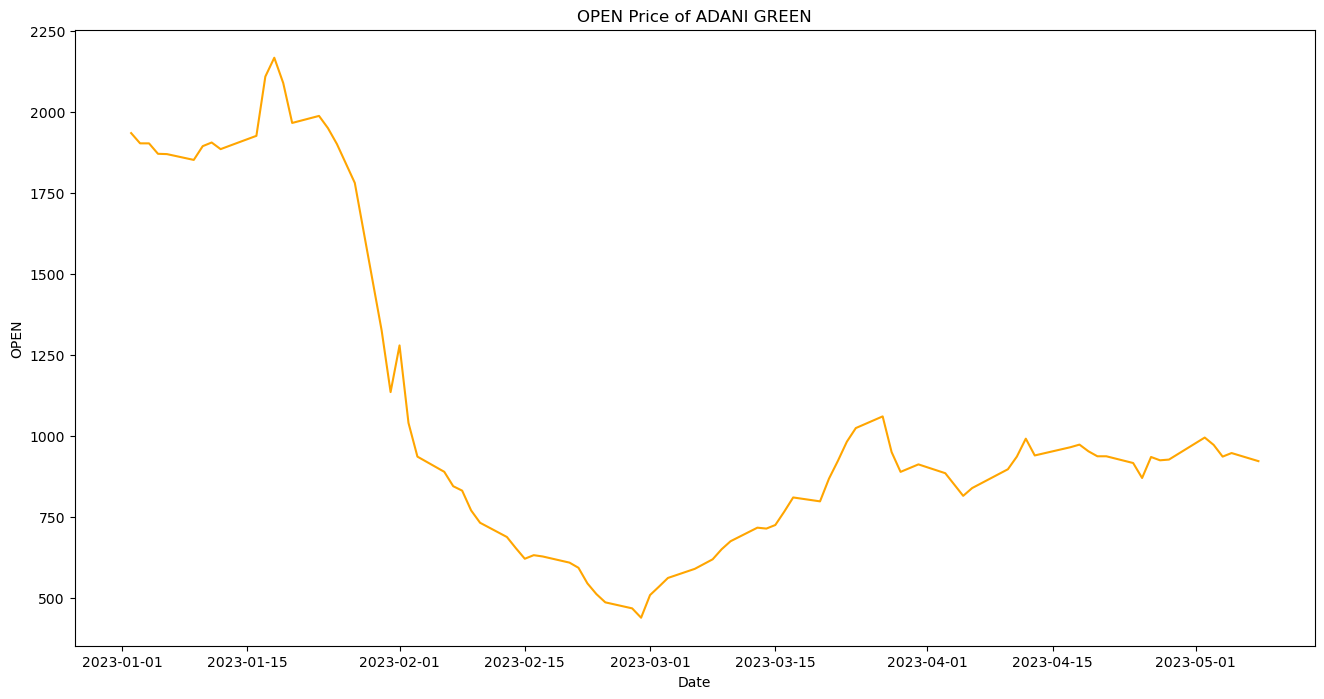

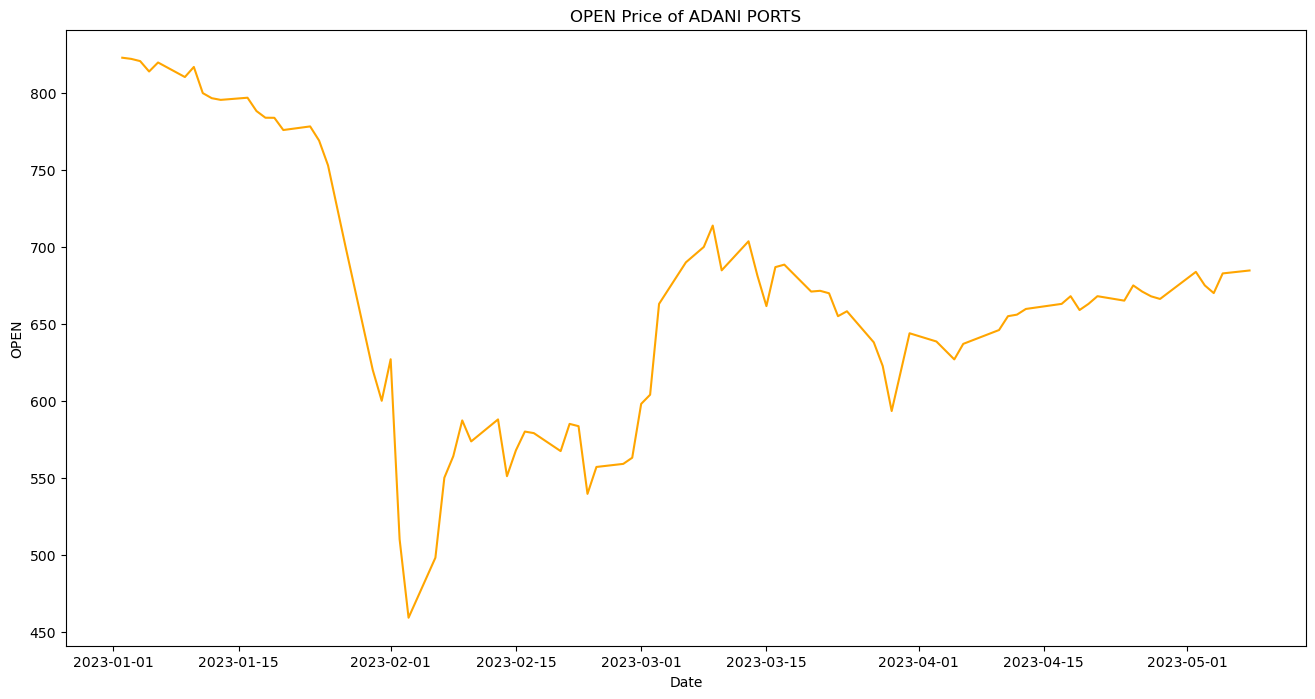

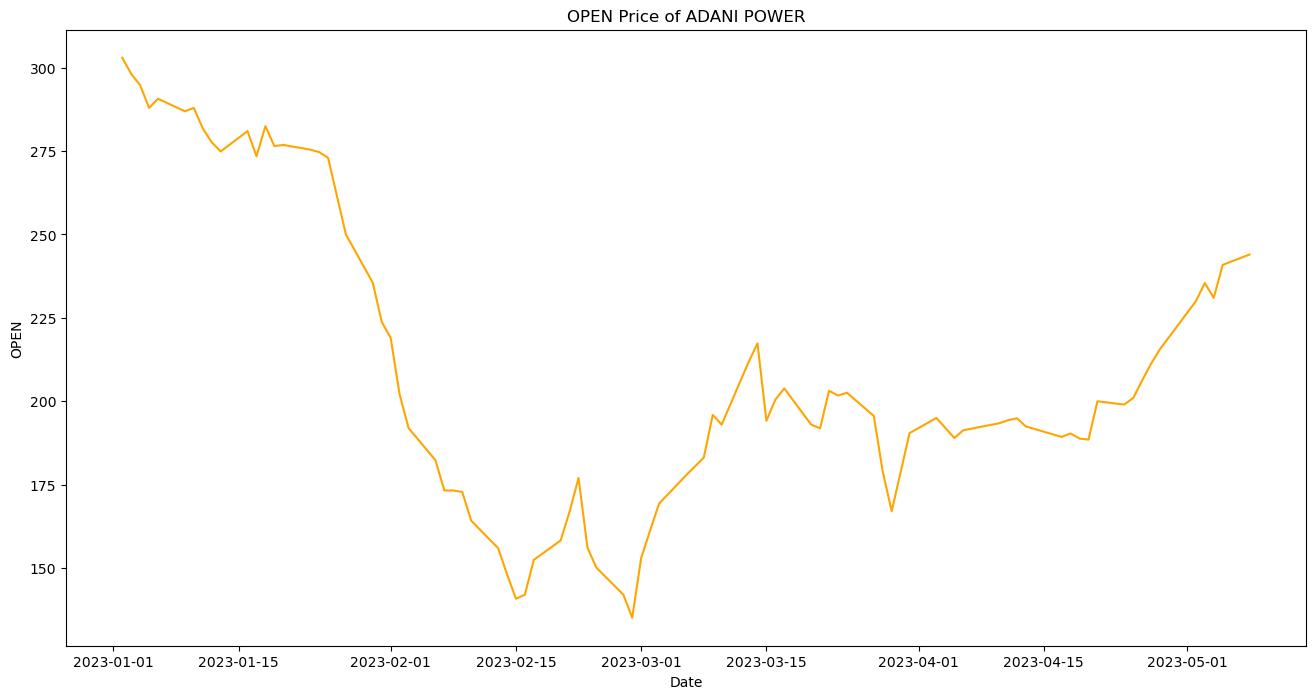

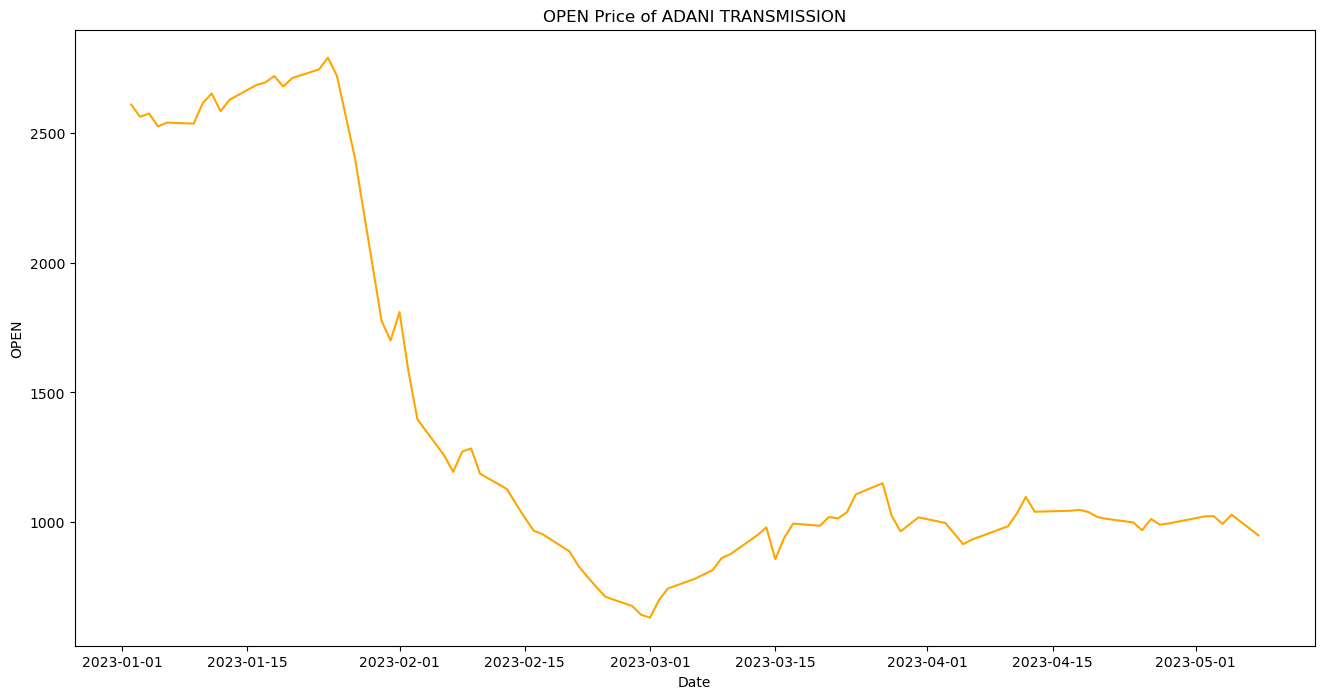

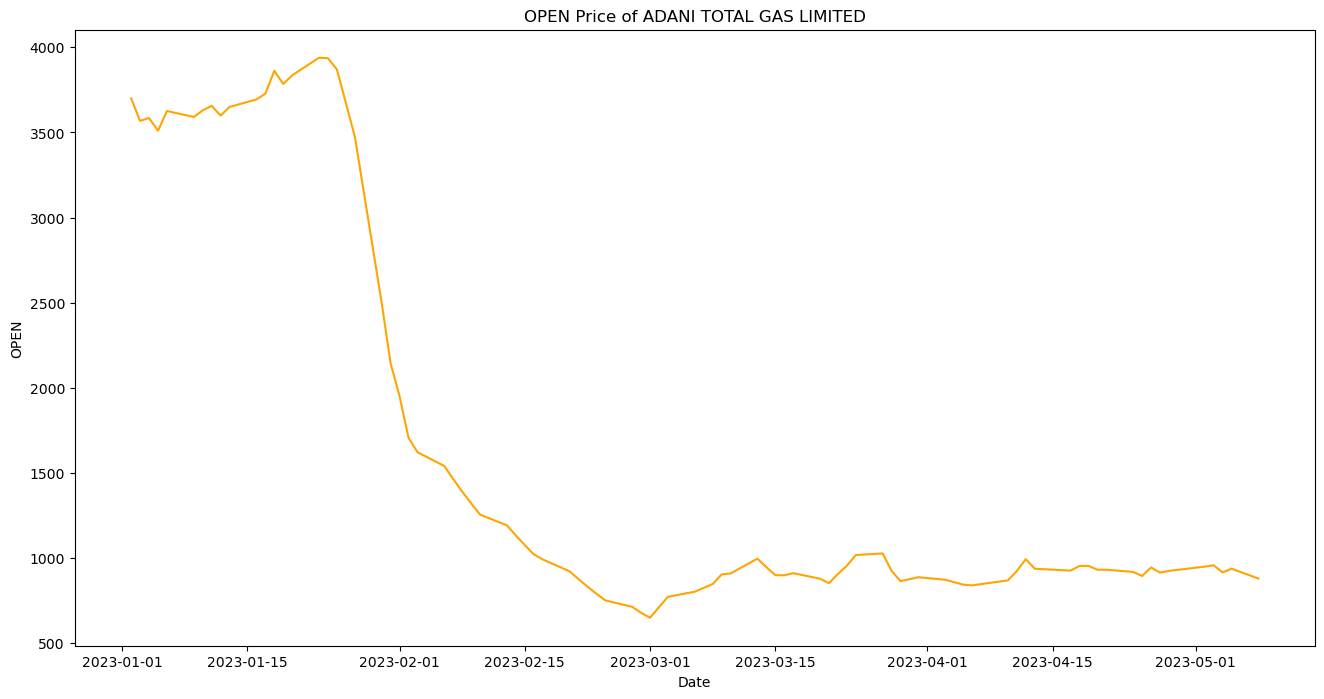

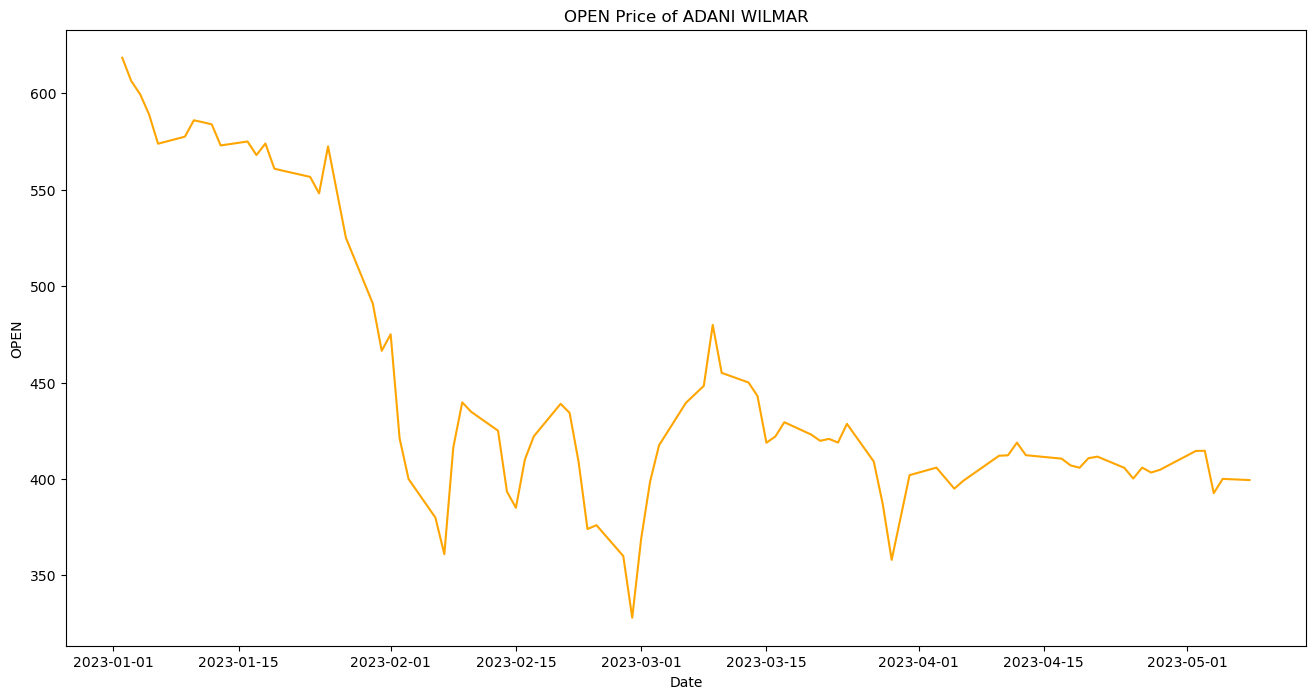





Showing stock trends for HIGH price






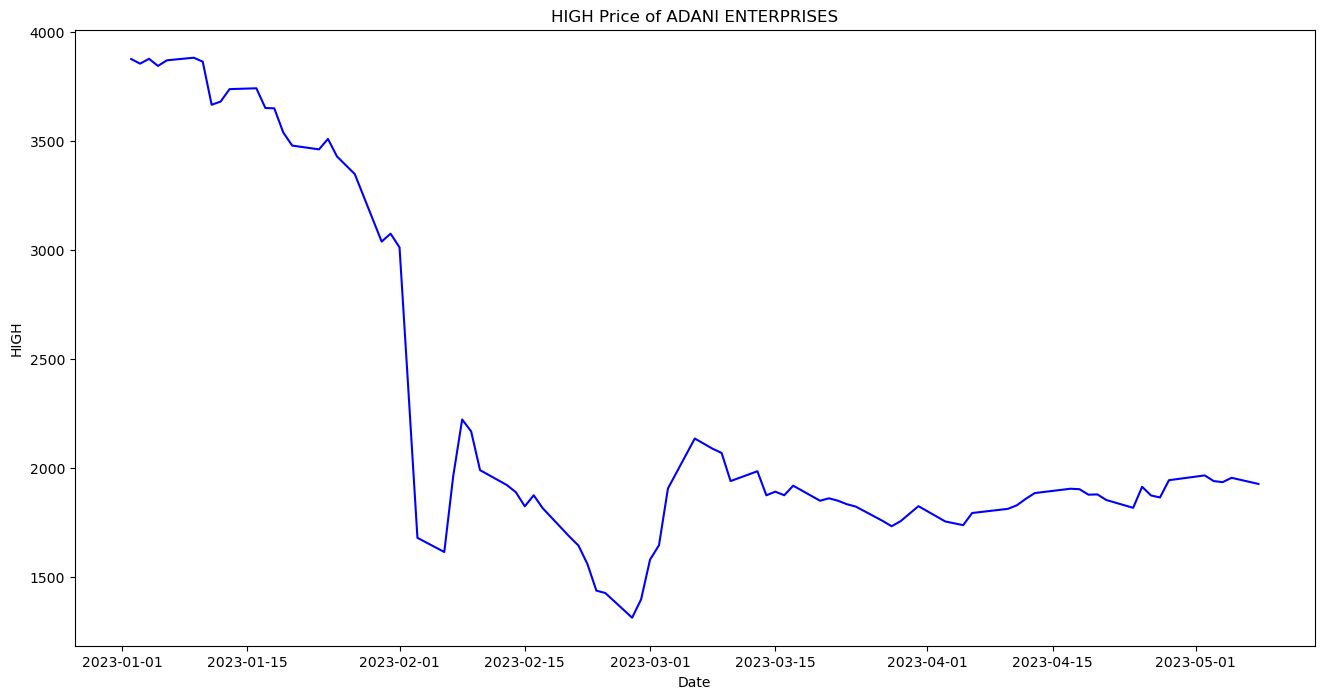

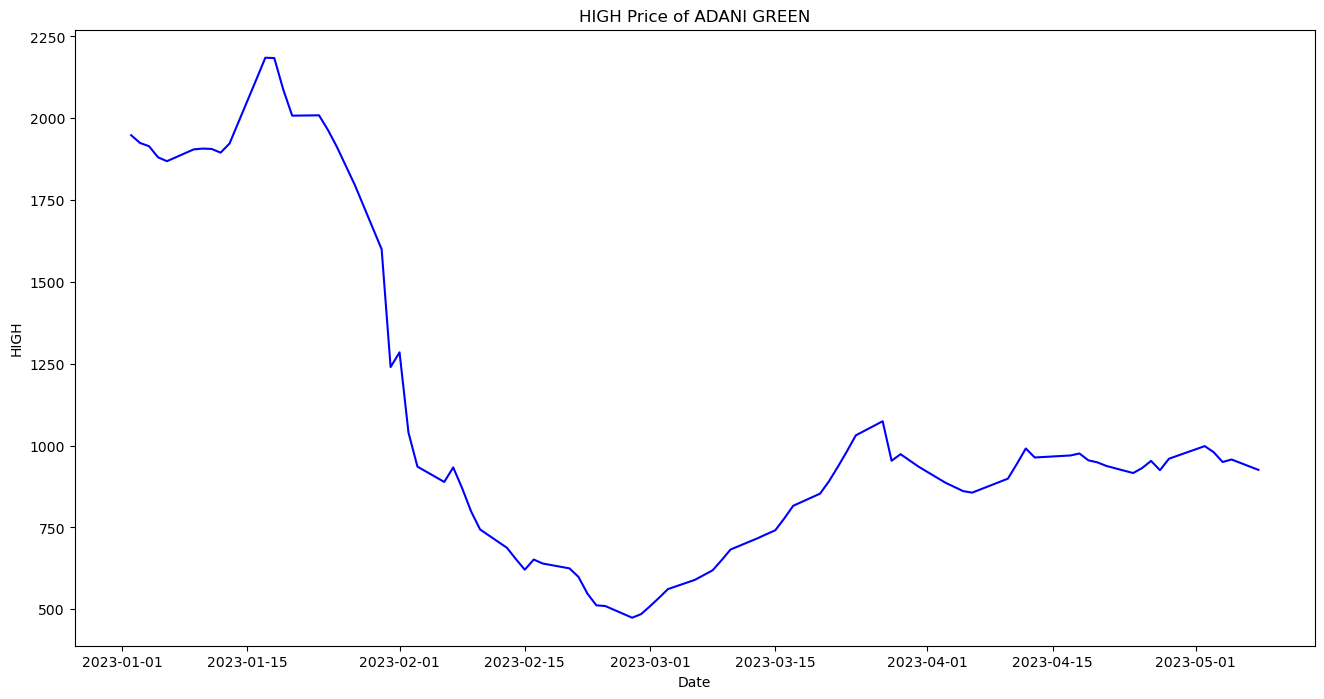

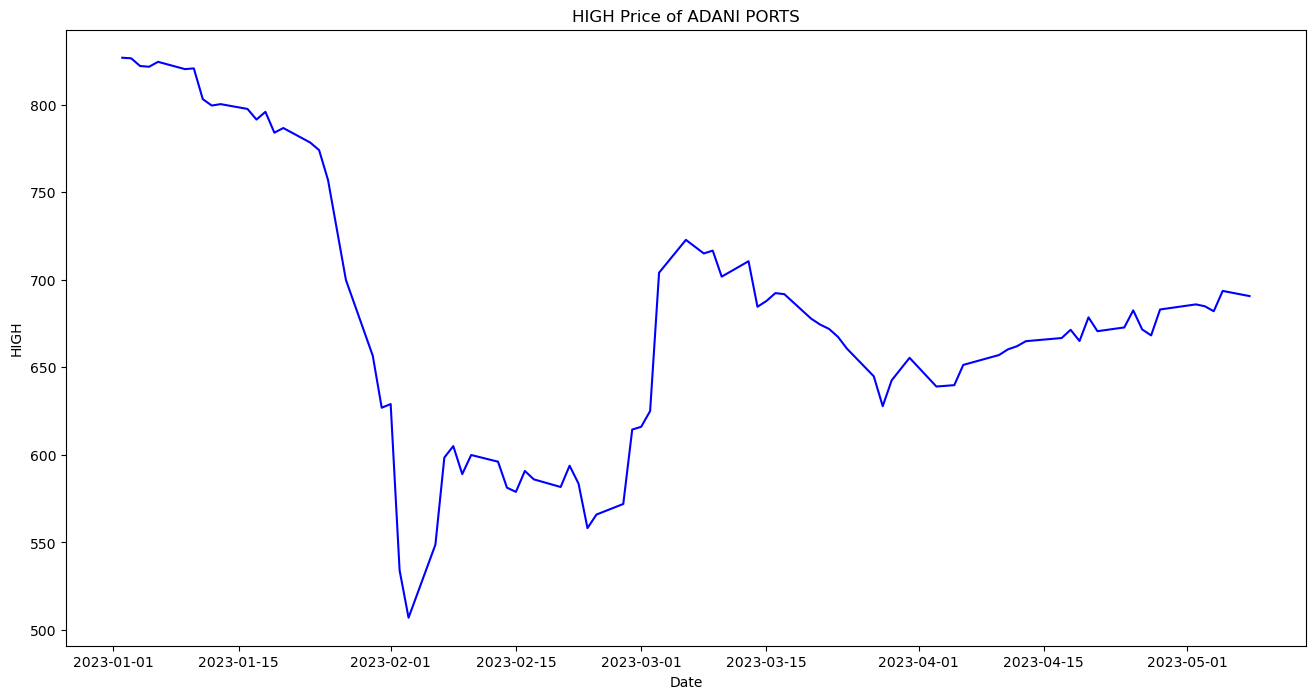

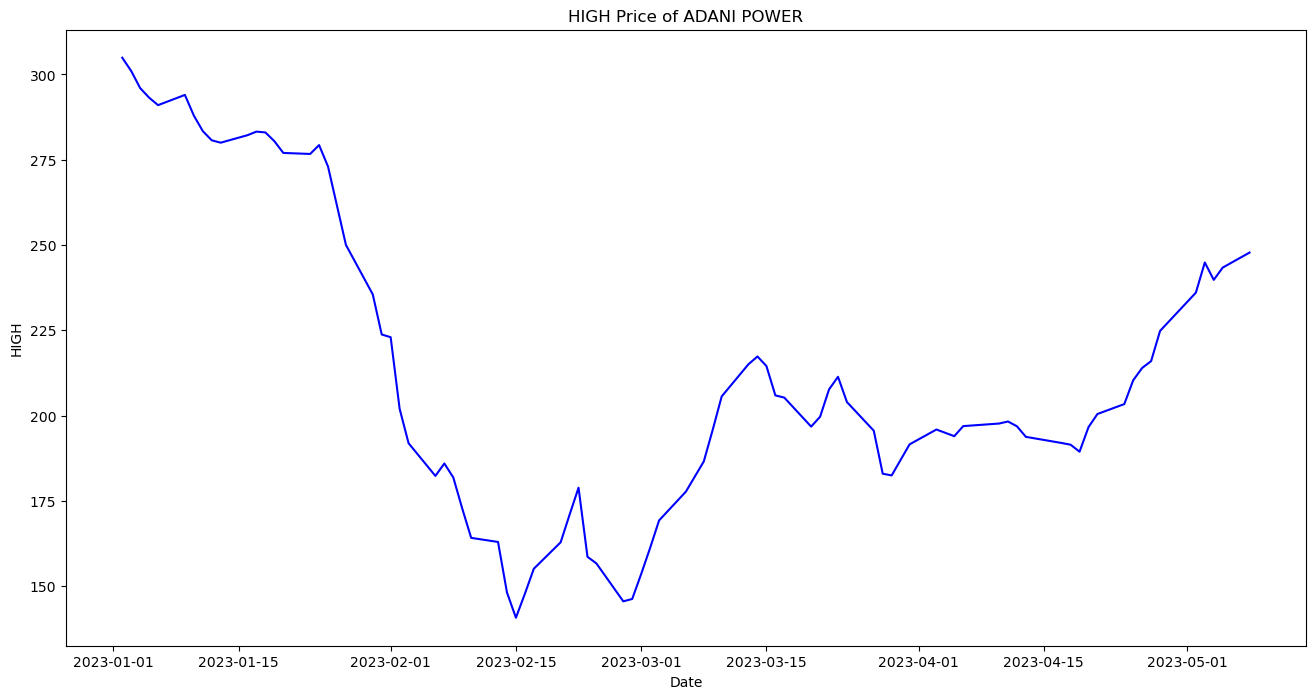

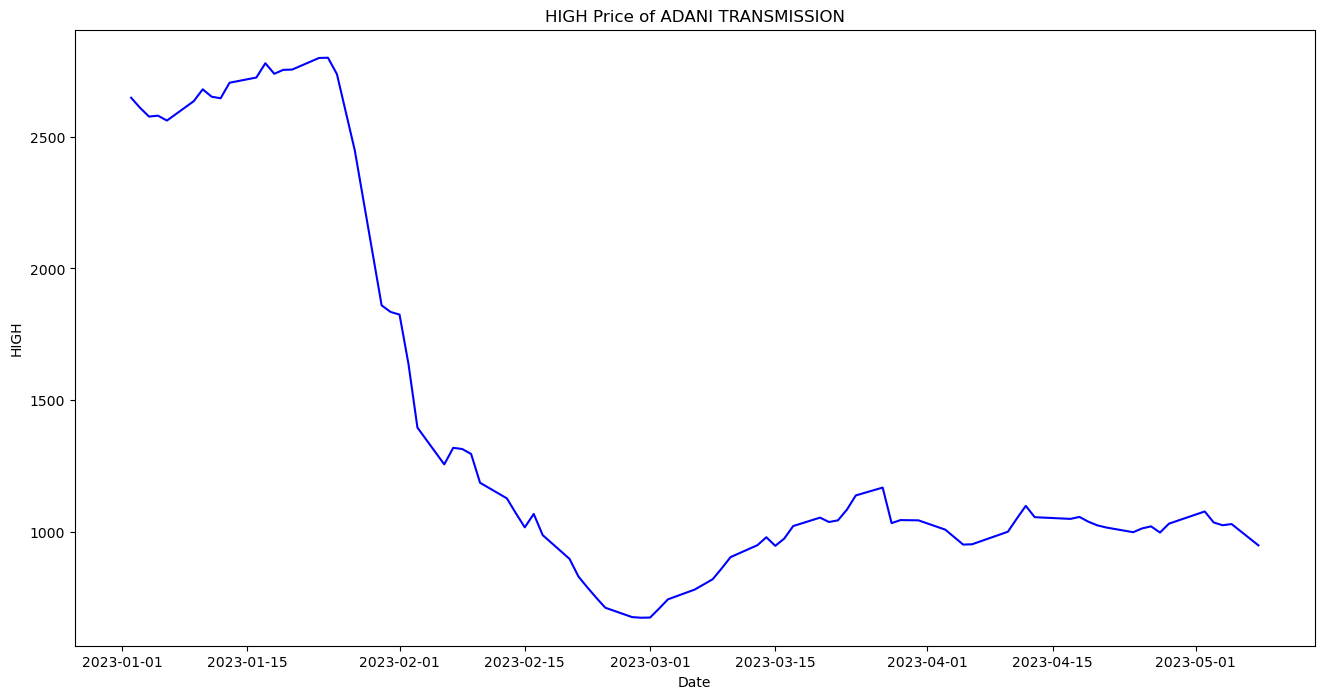

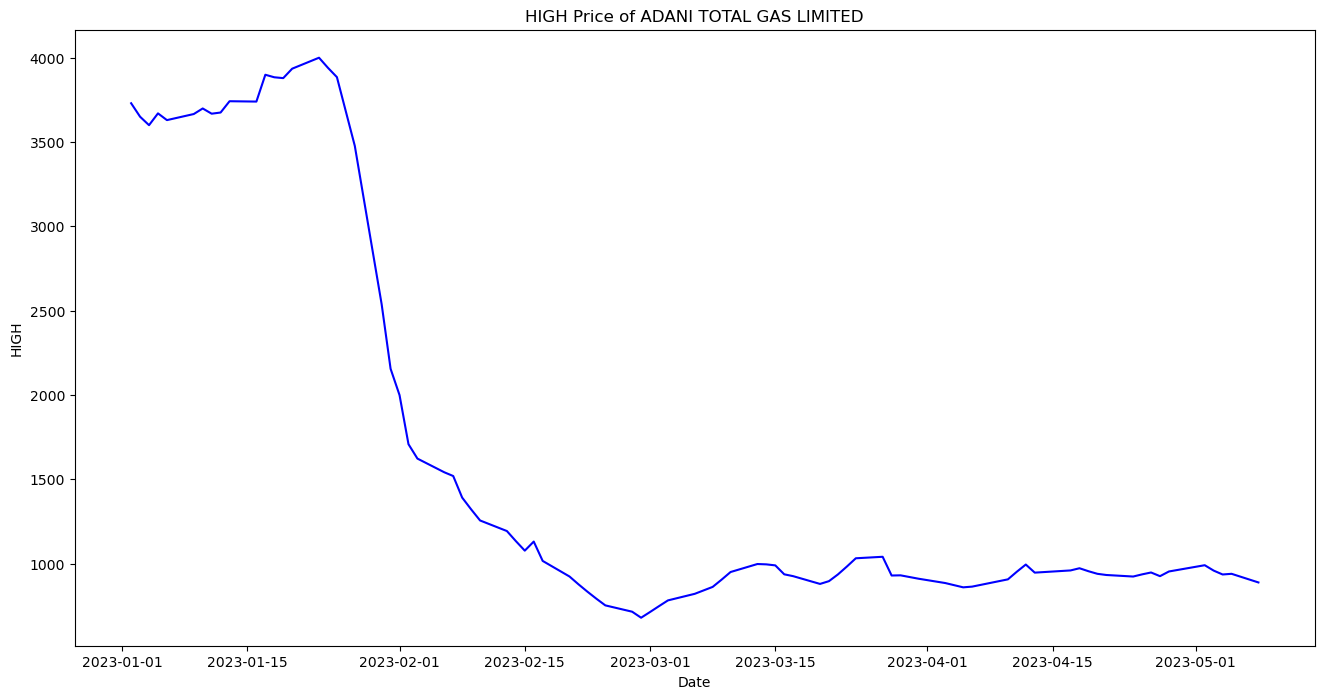

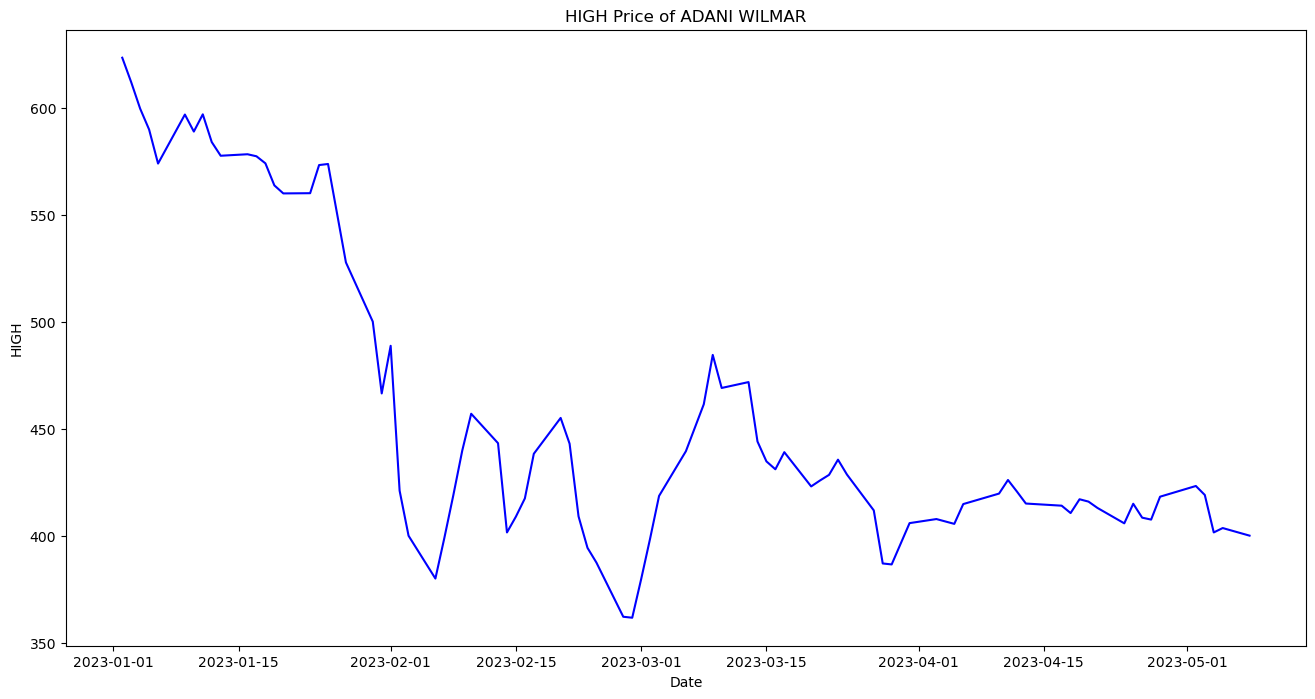





Showing stock trends for LOW price






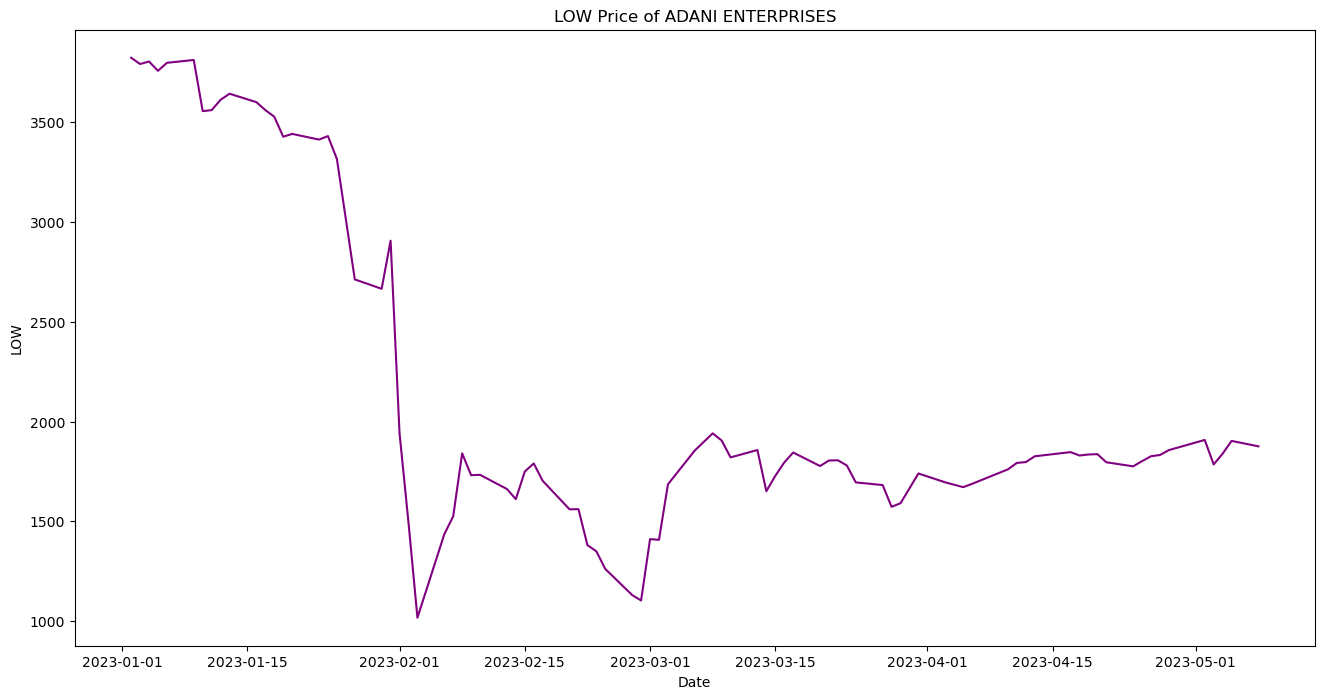

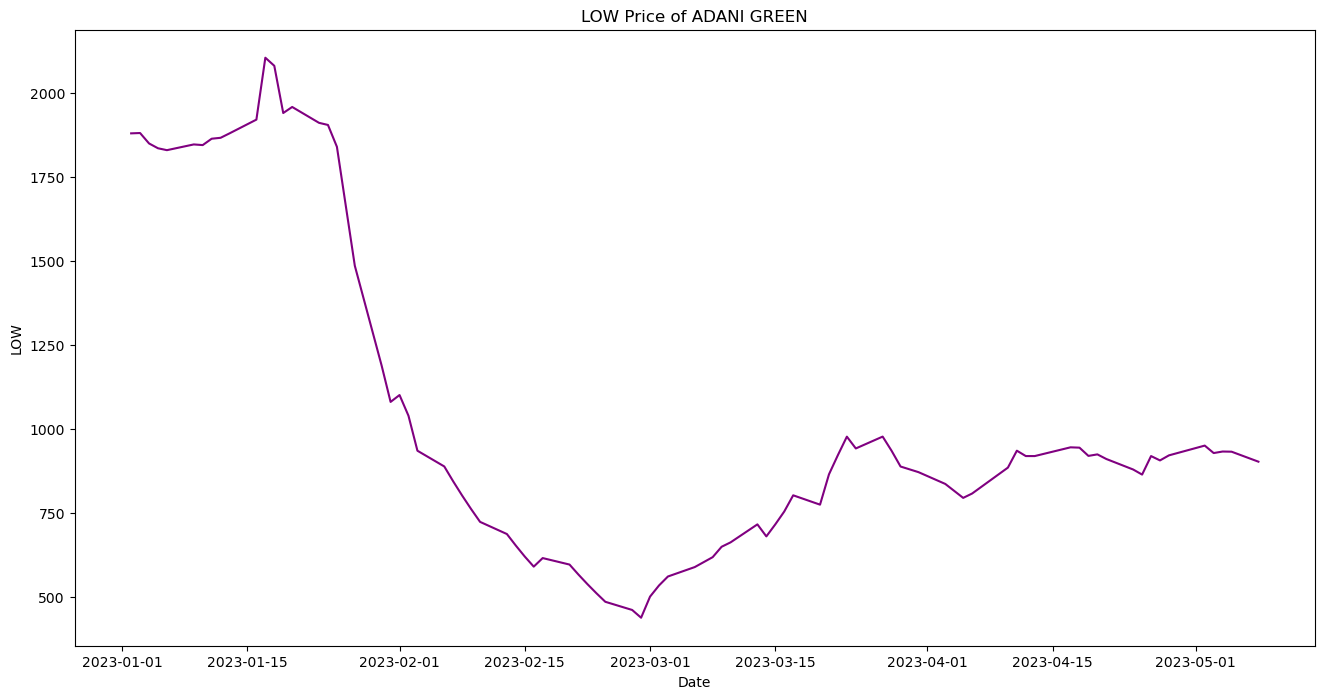

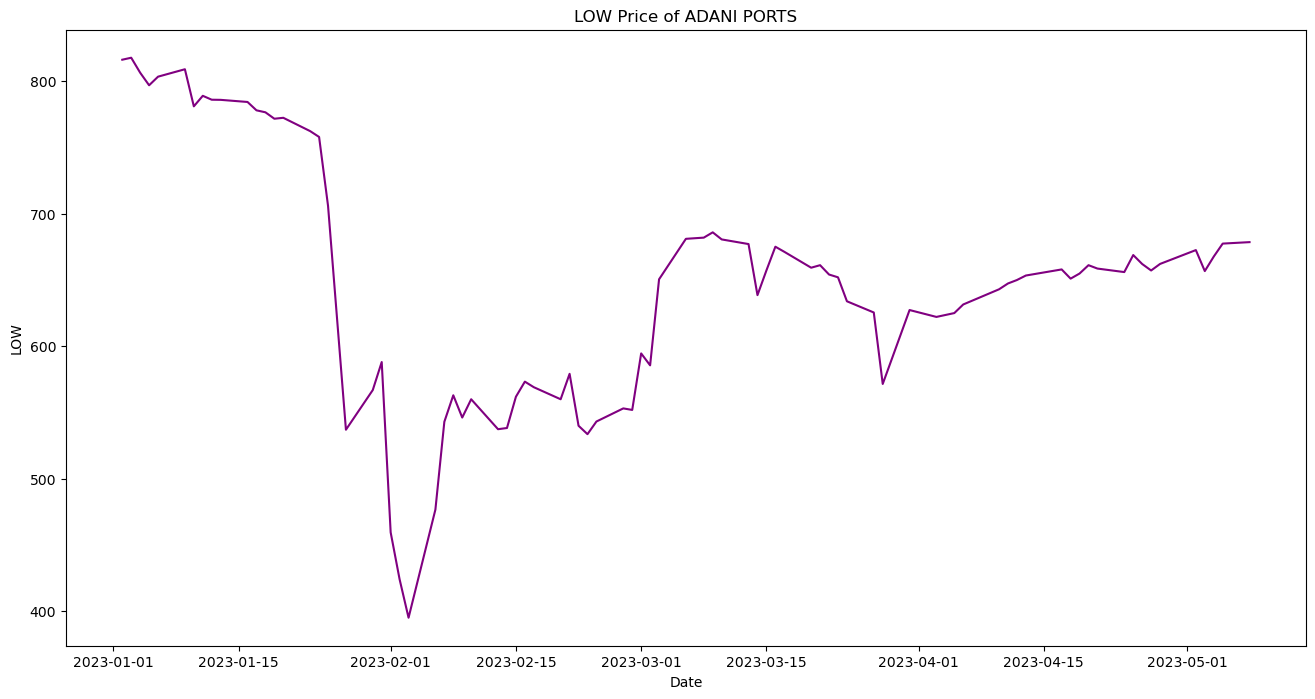

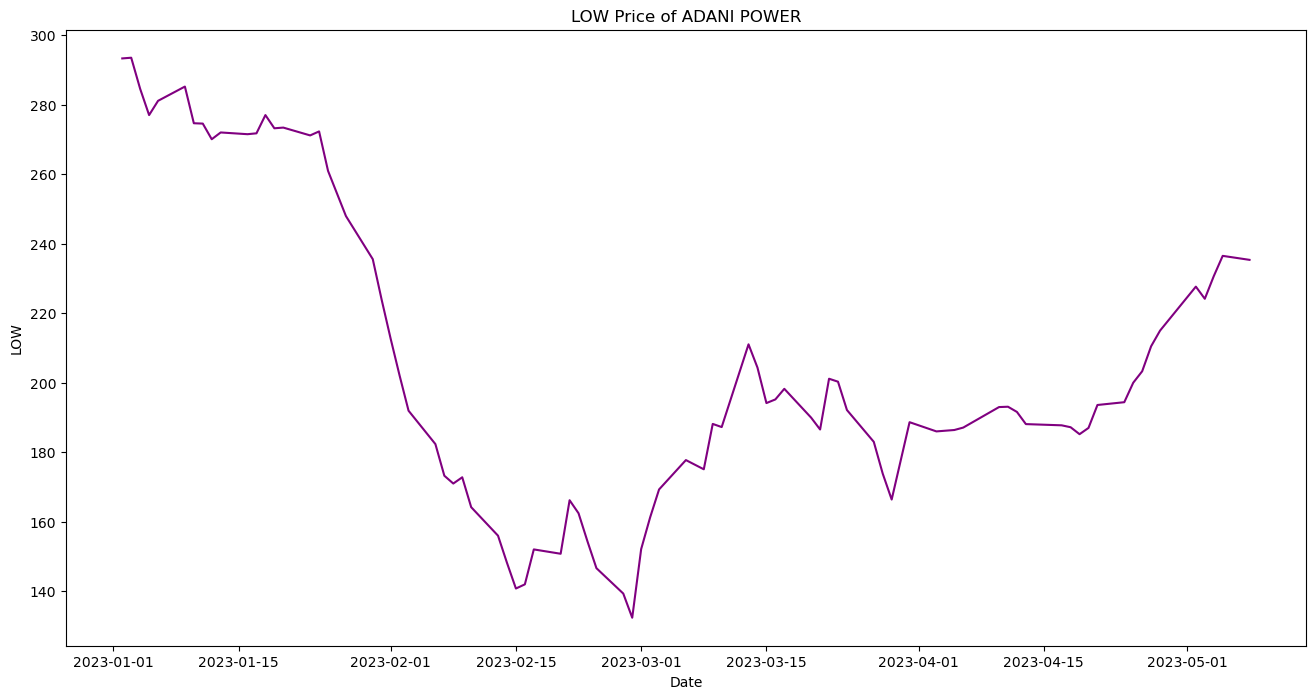

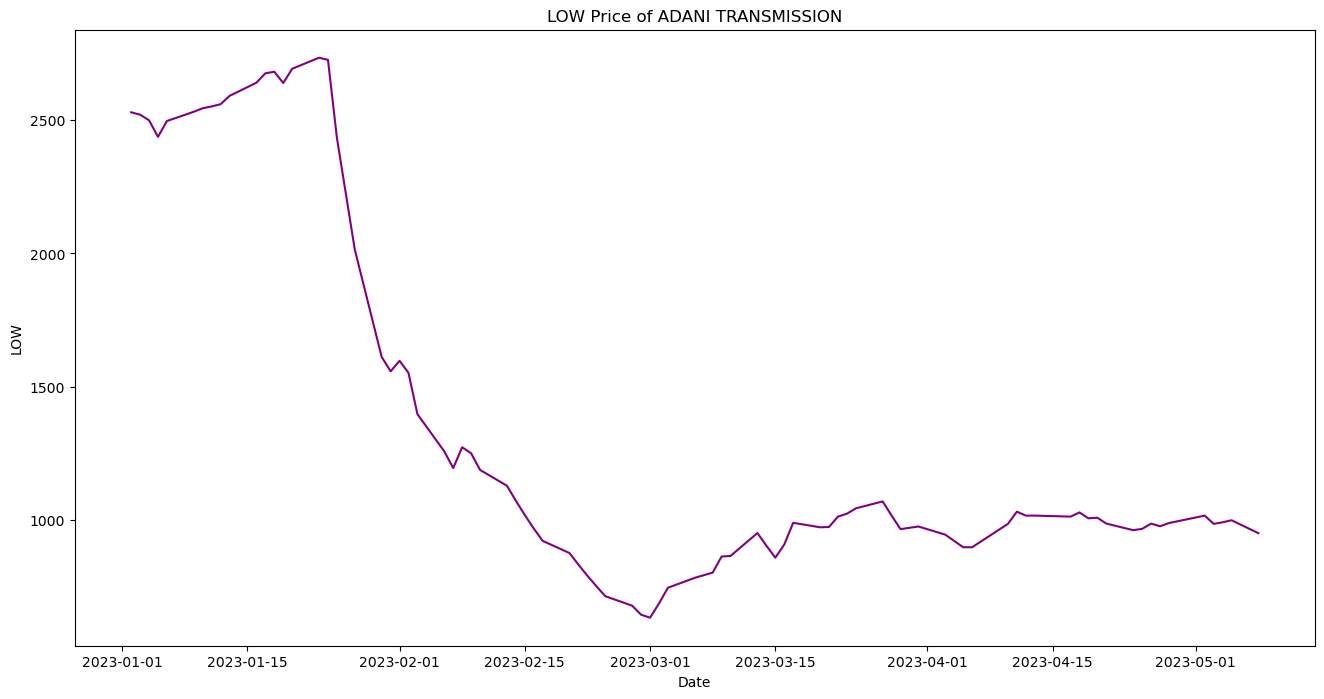

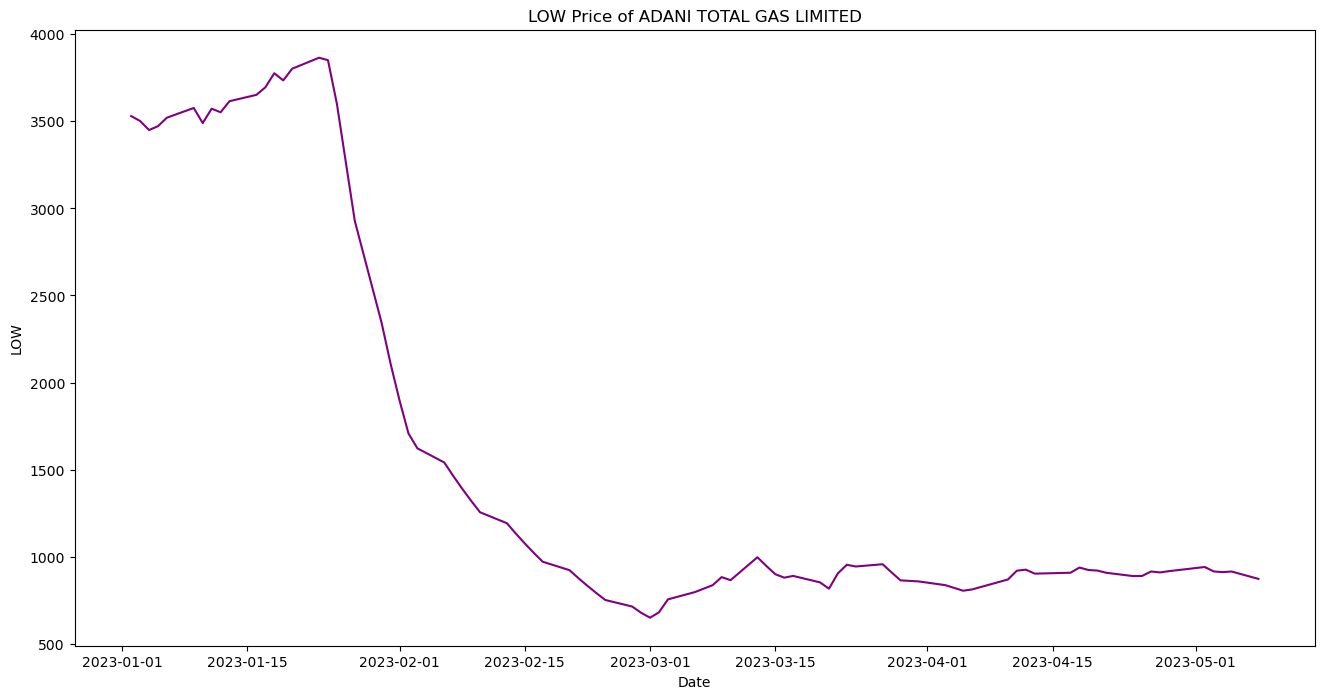

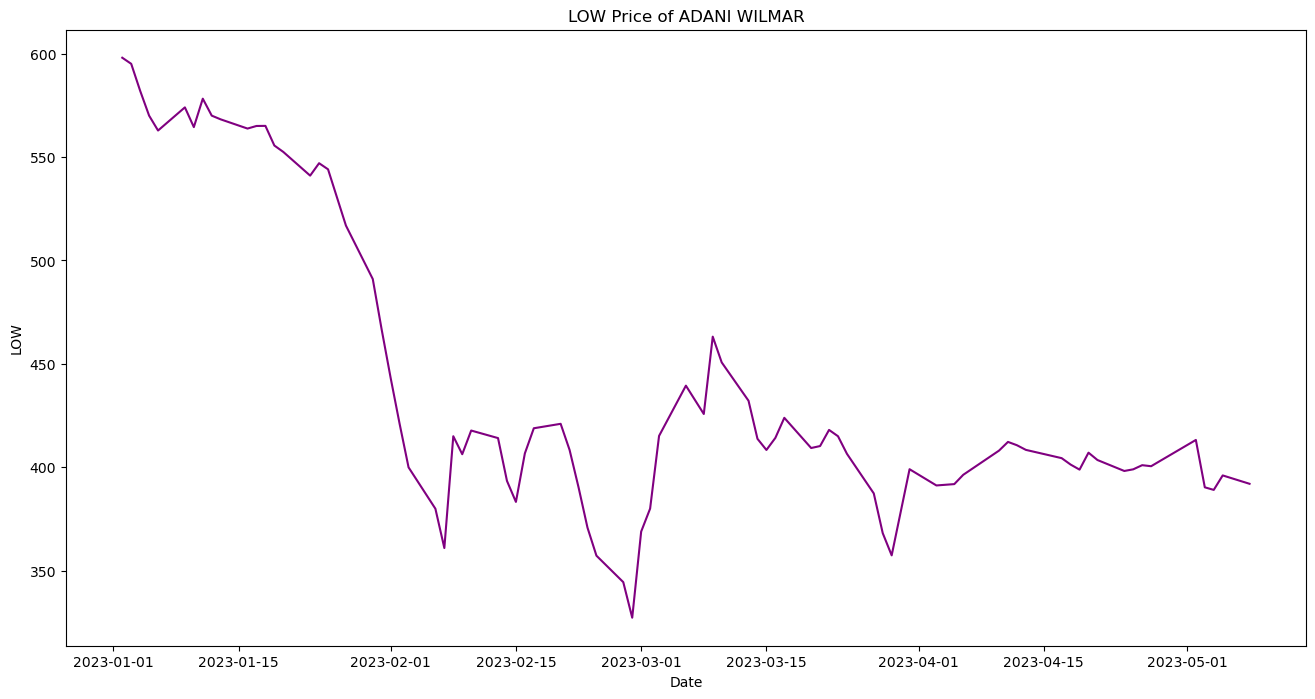





Showing stock trends for CLOSE price






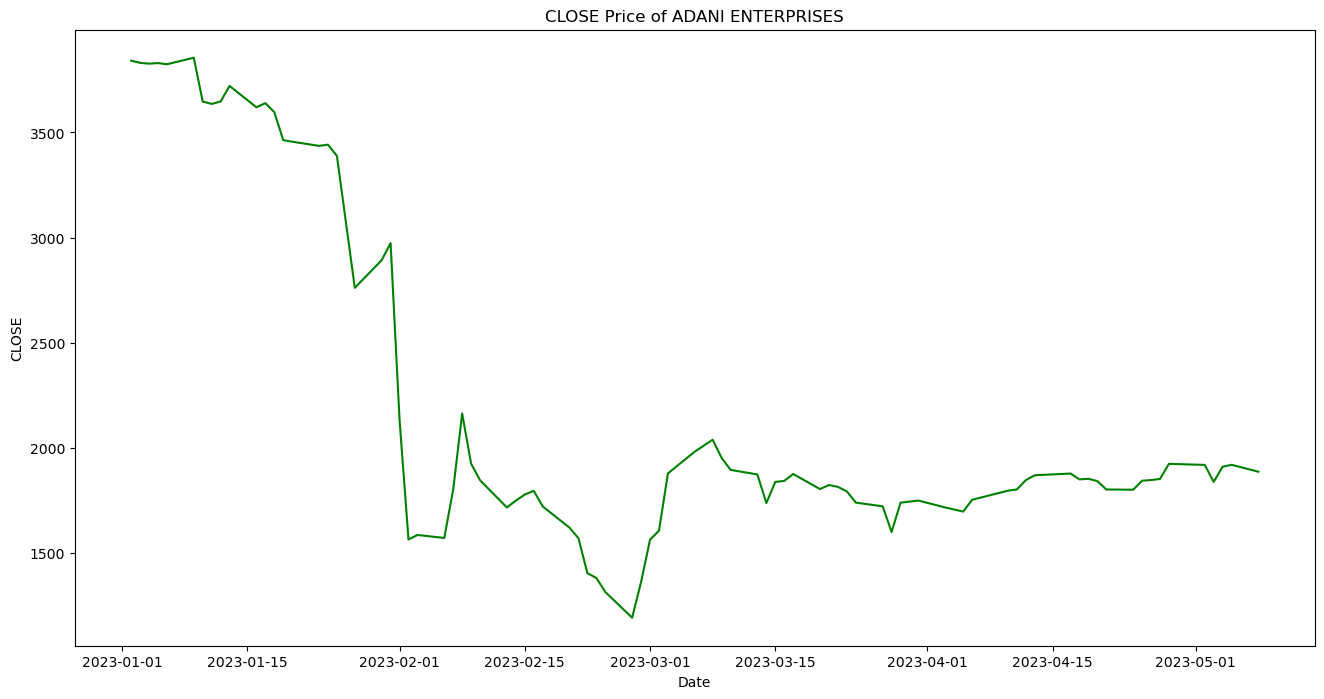

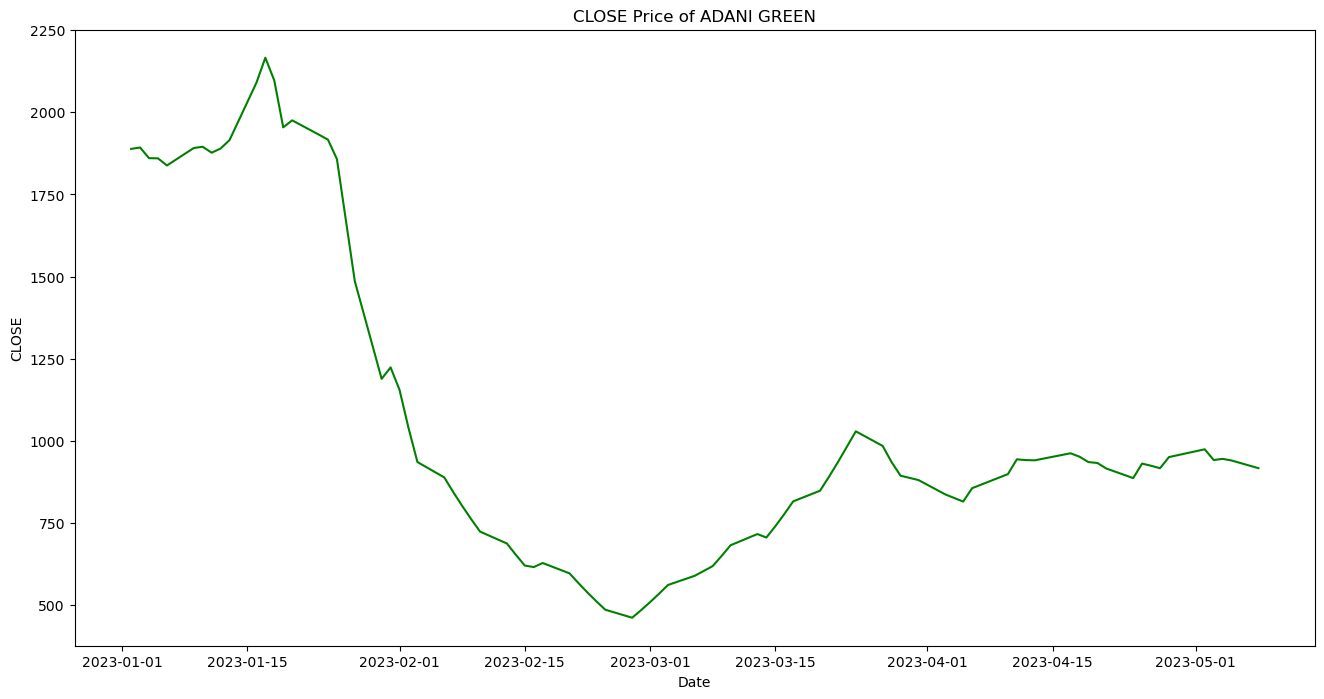

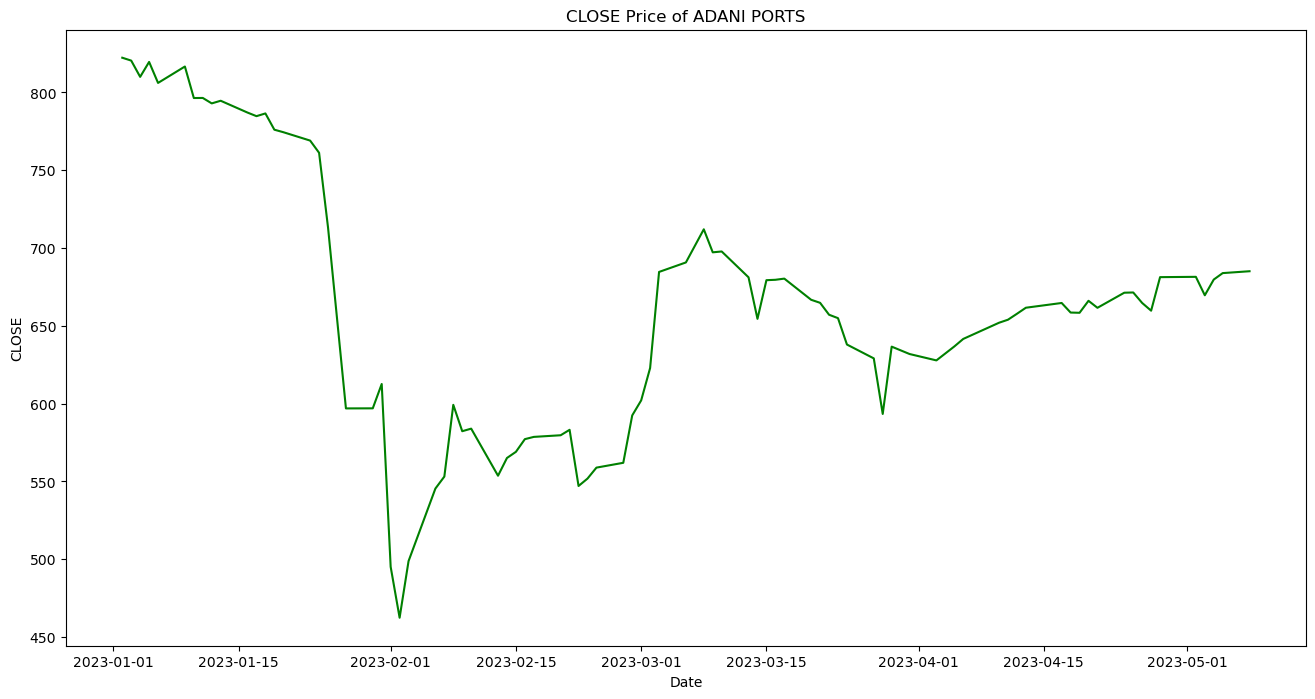

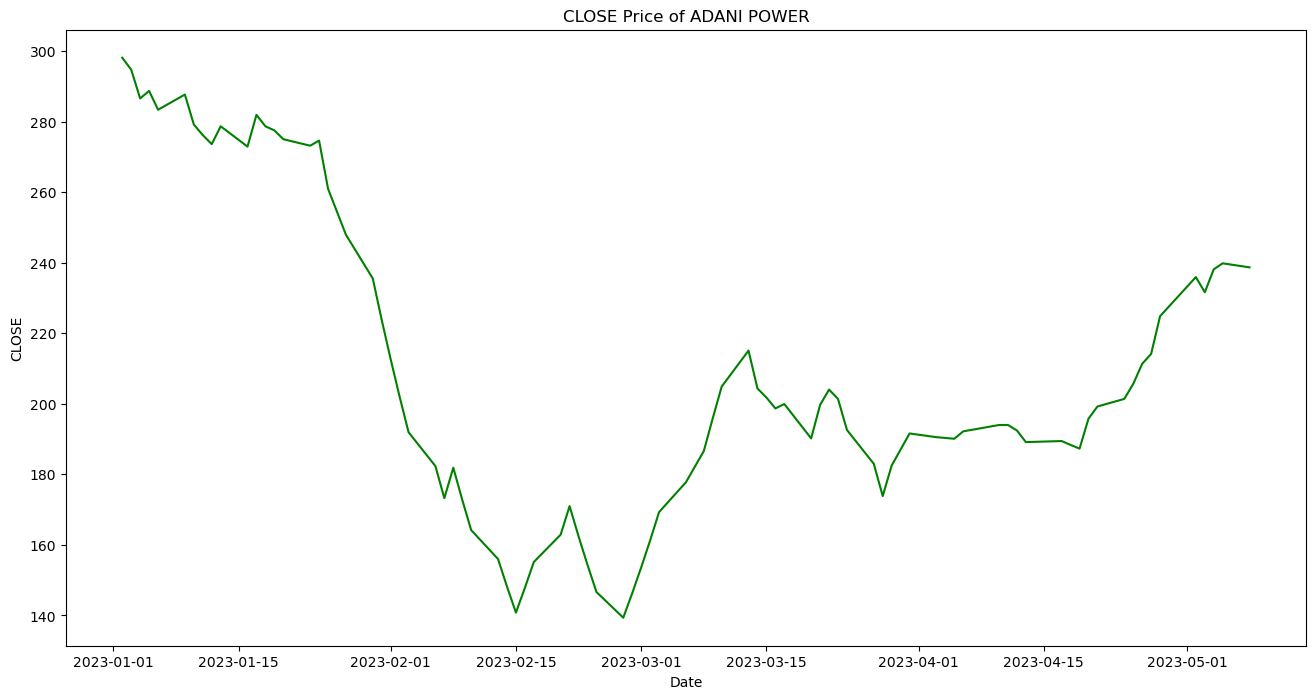

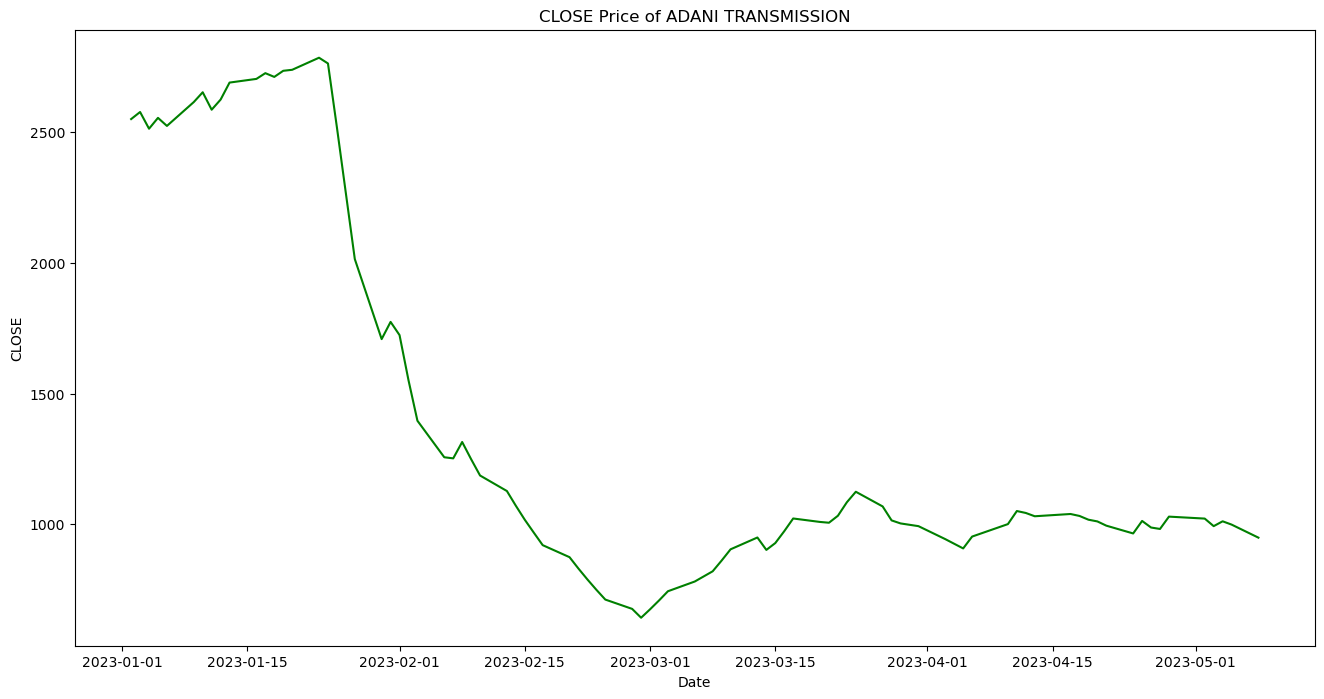

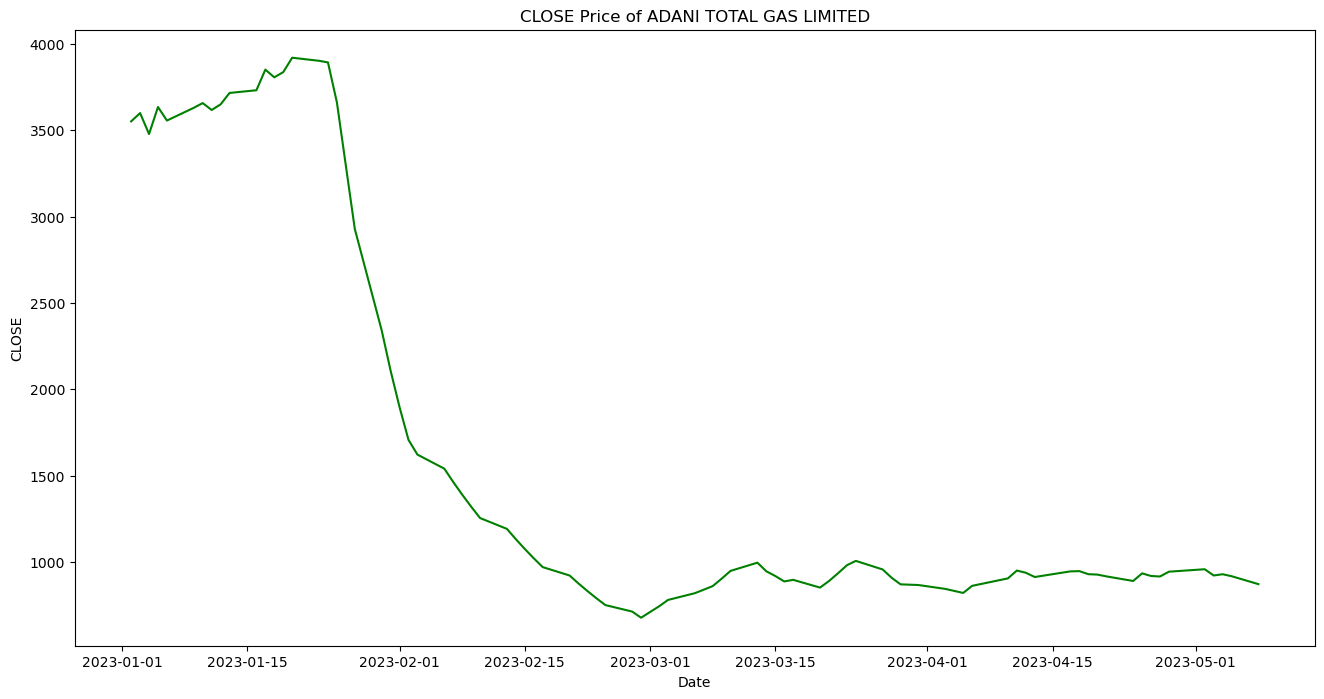

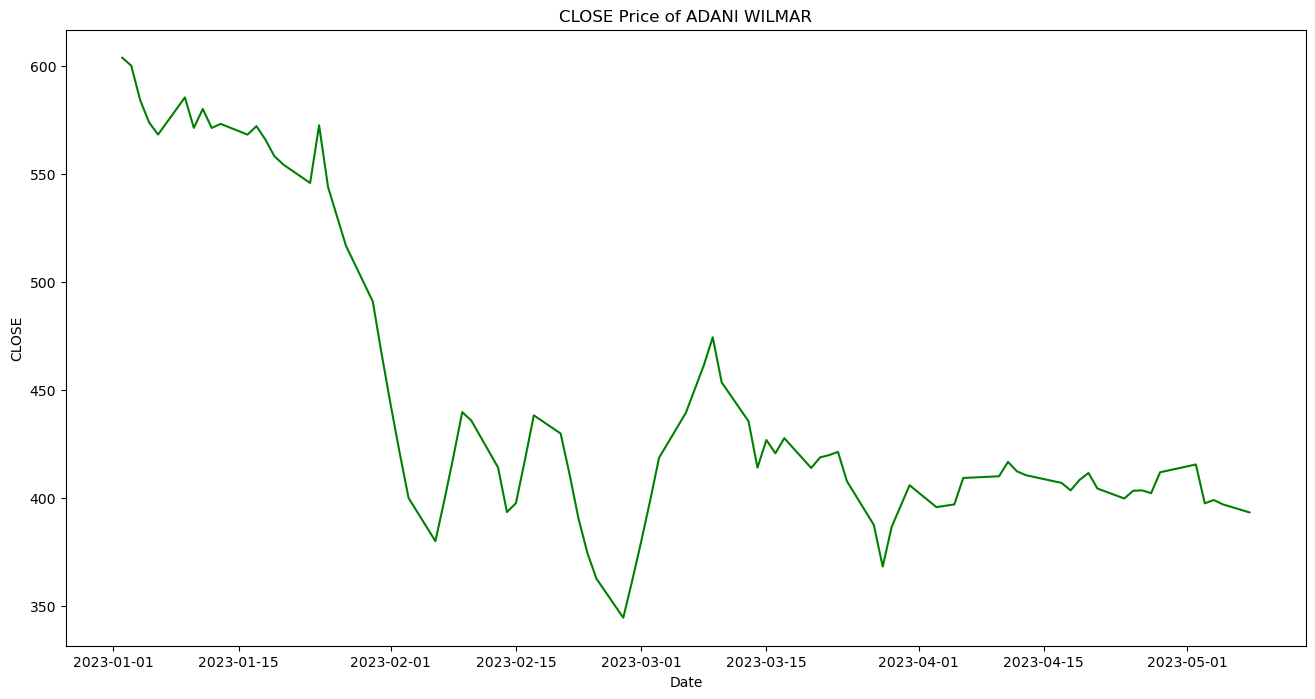





Showing stock trends for PREV. CLOSE price






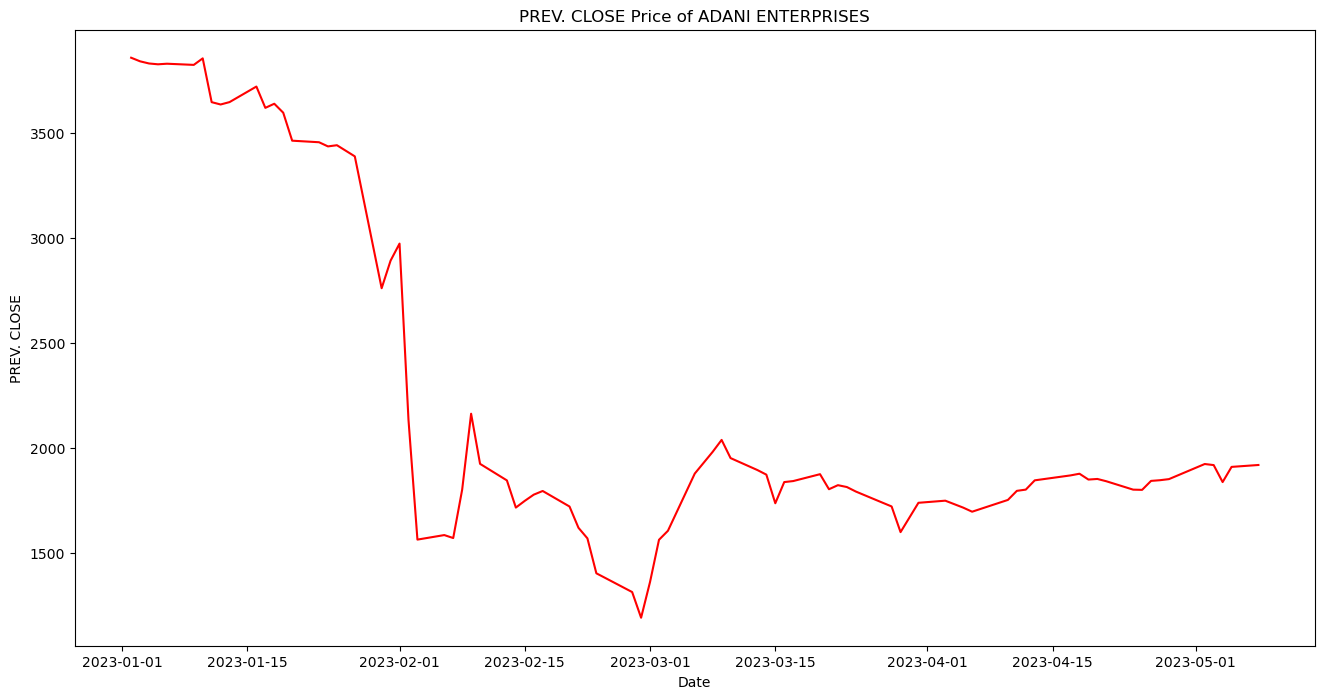

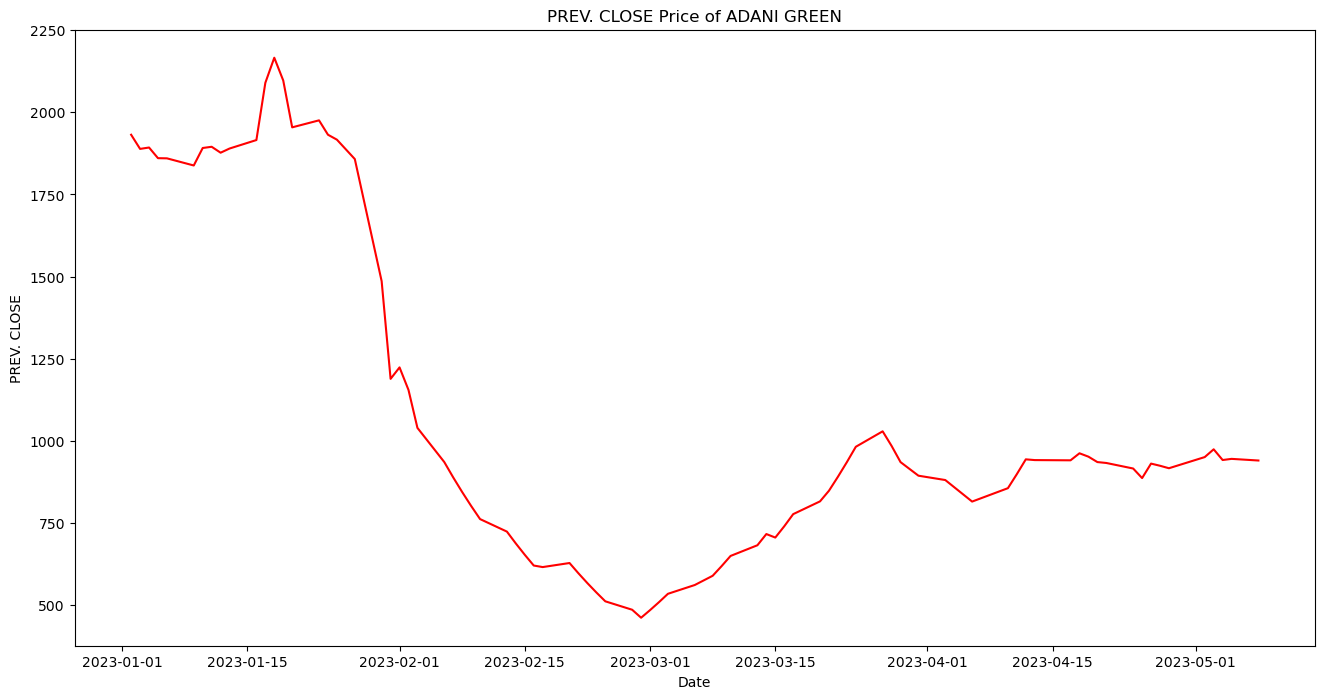

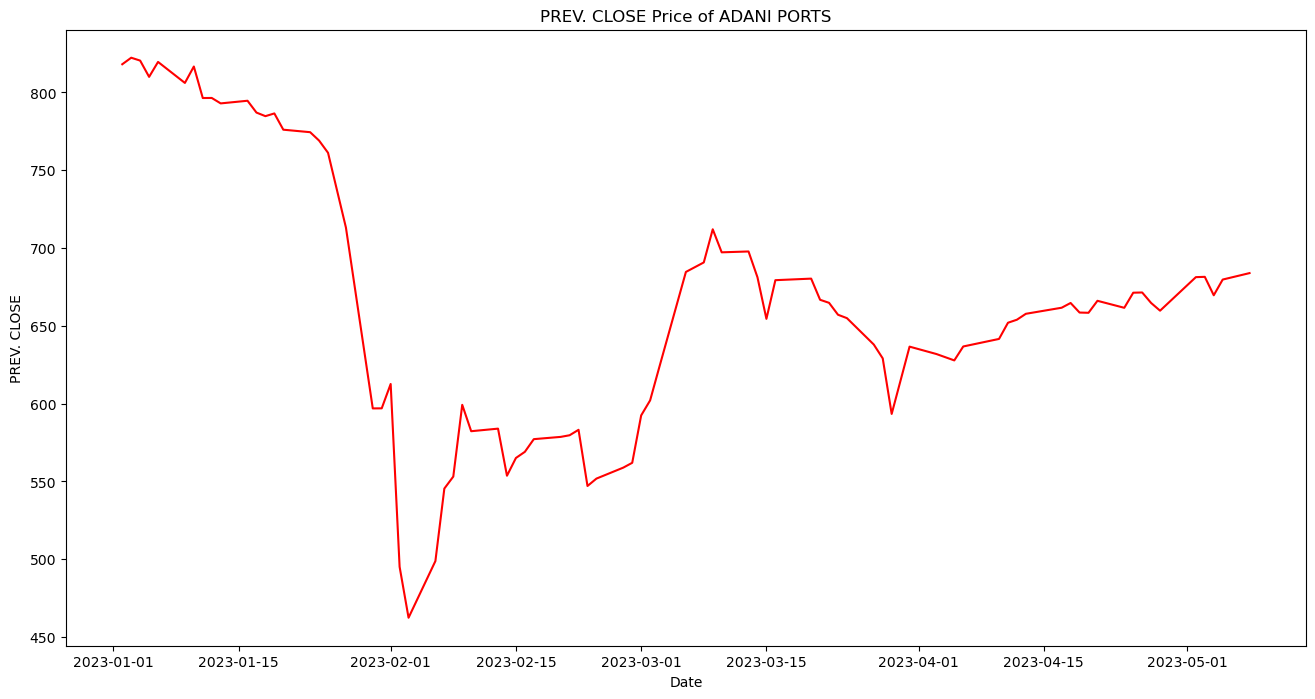

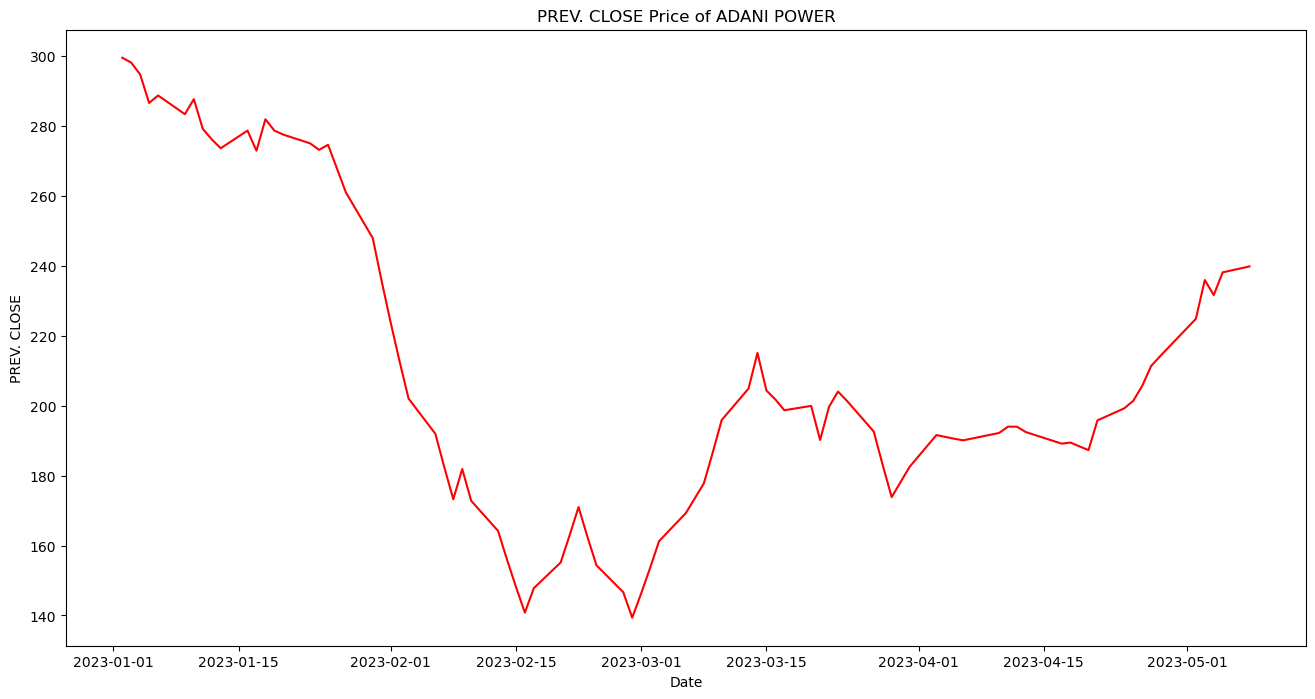

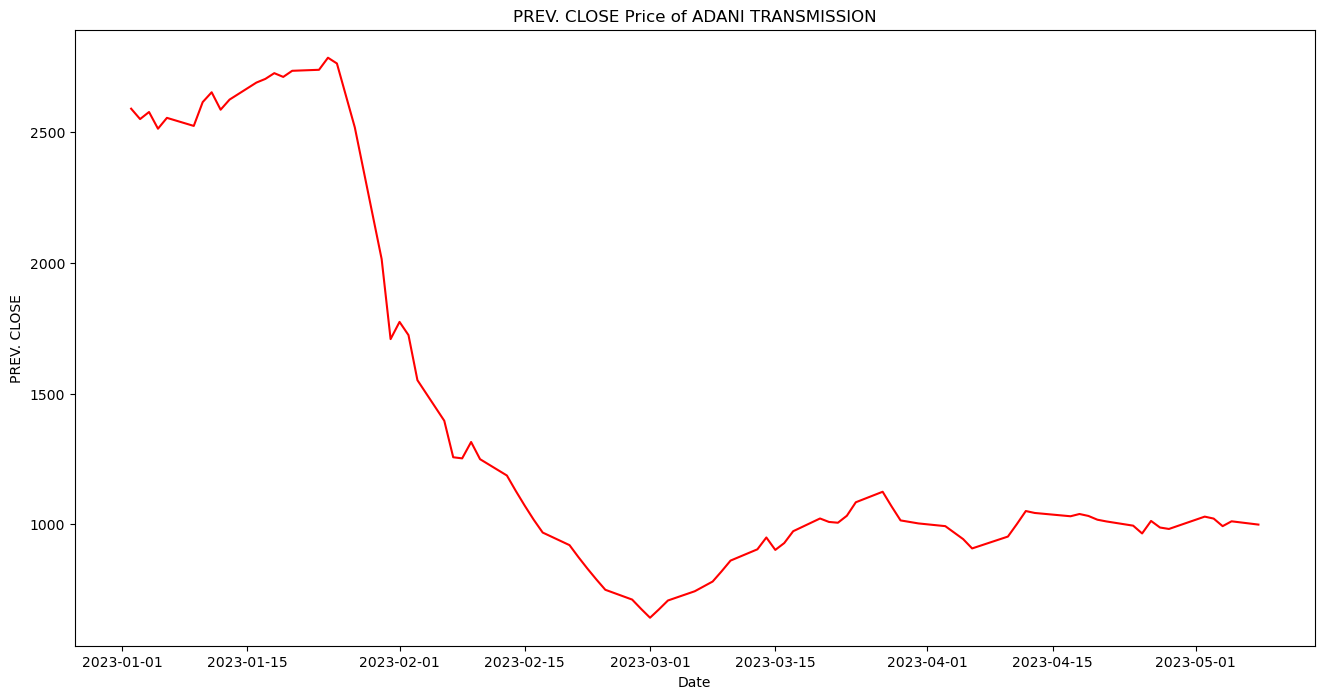

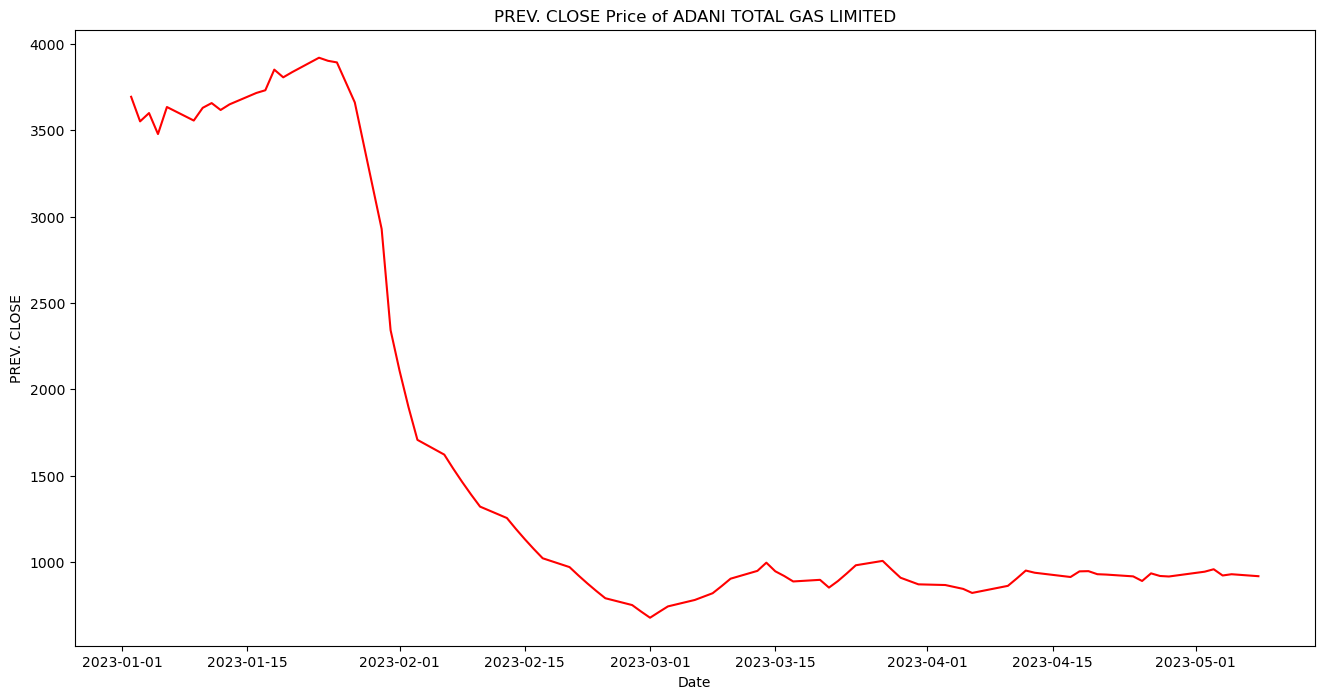

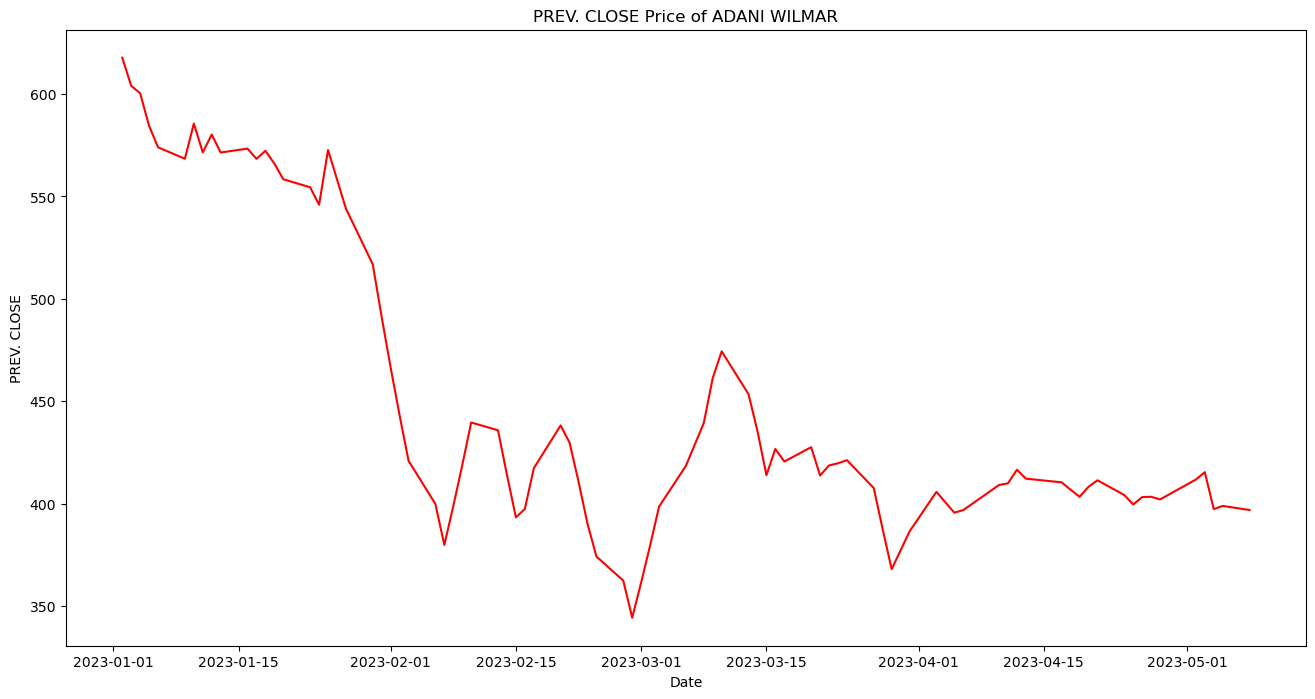





Showing stock trends for LTP price






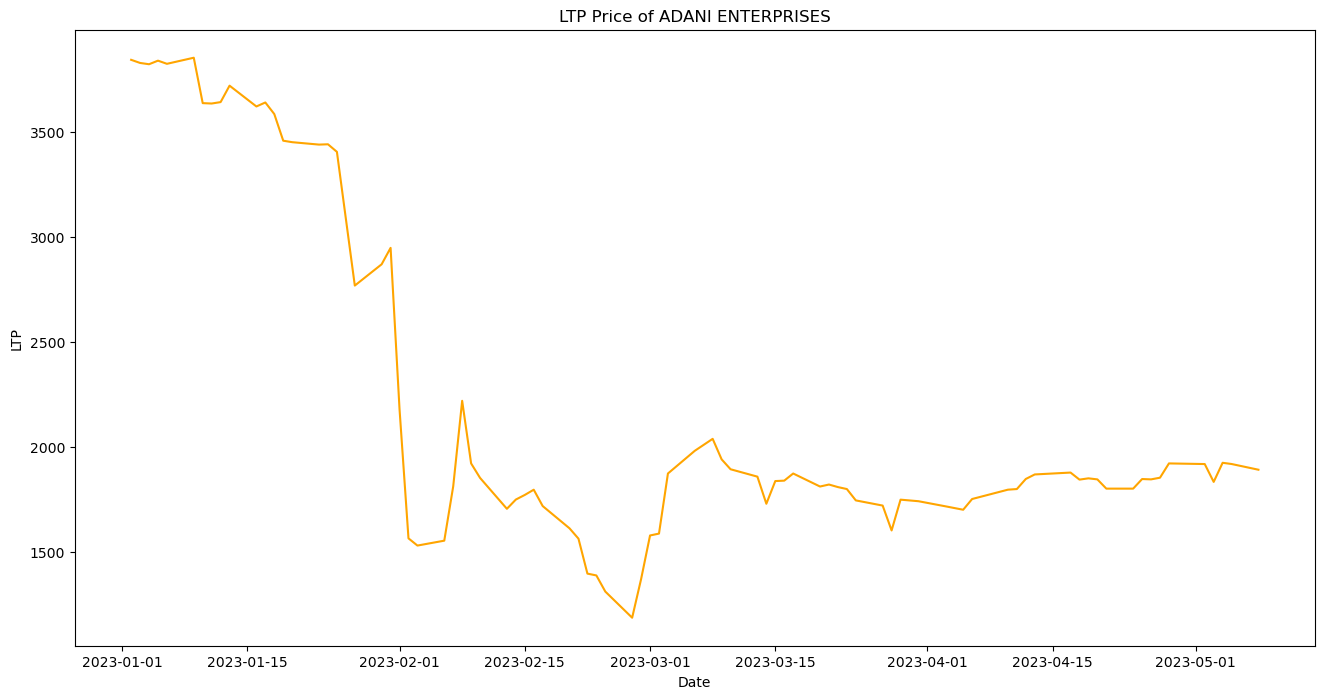

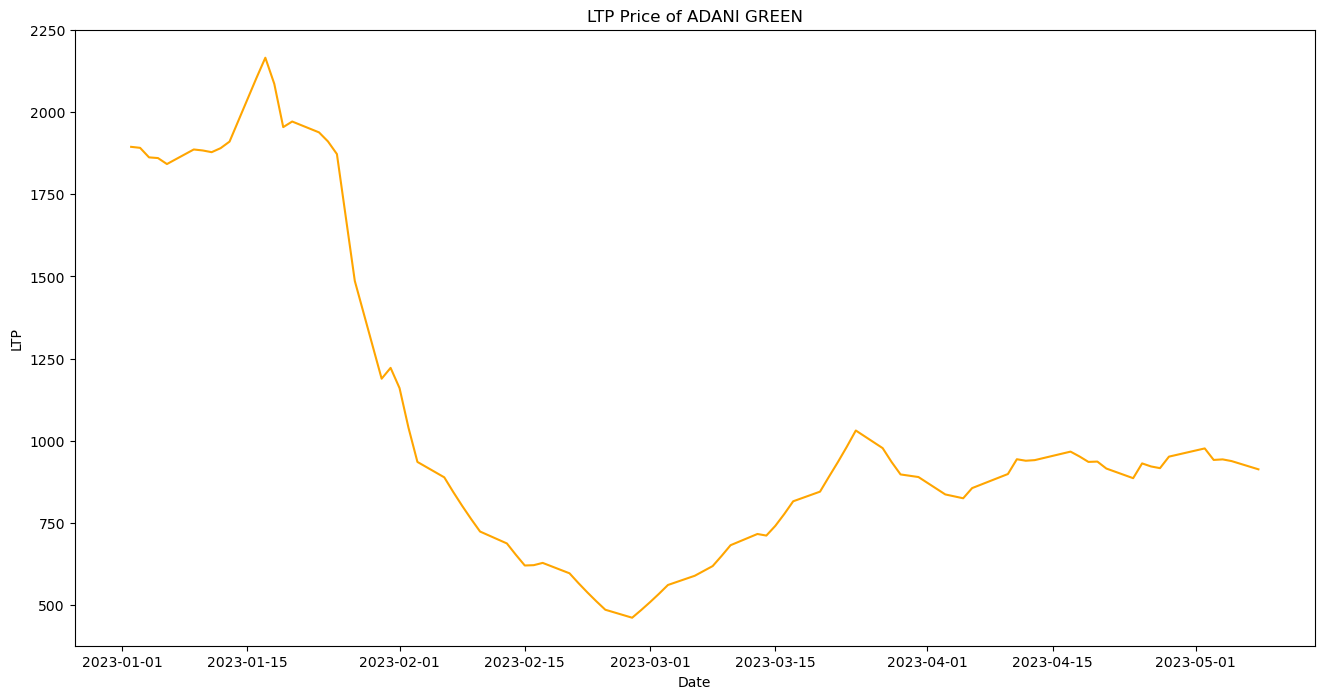

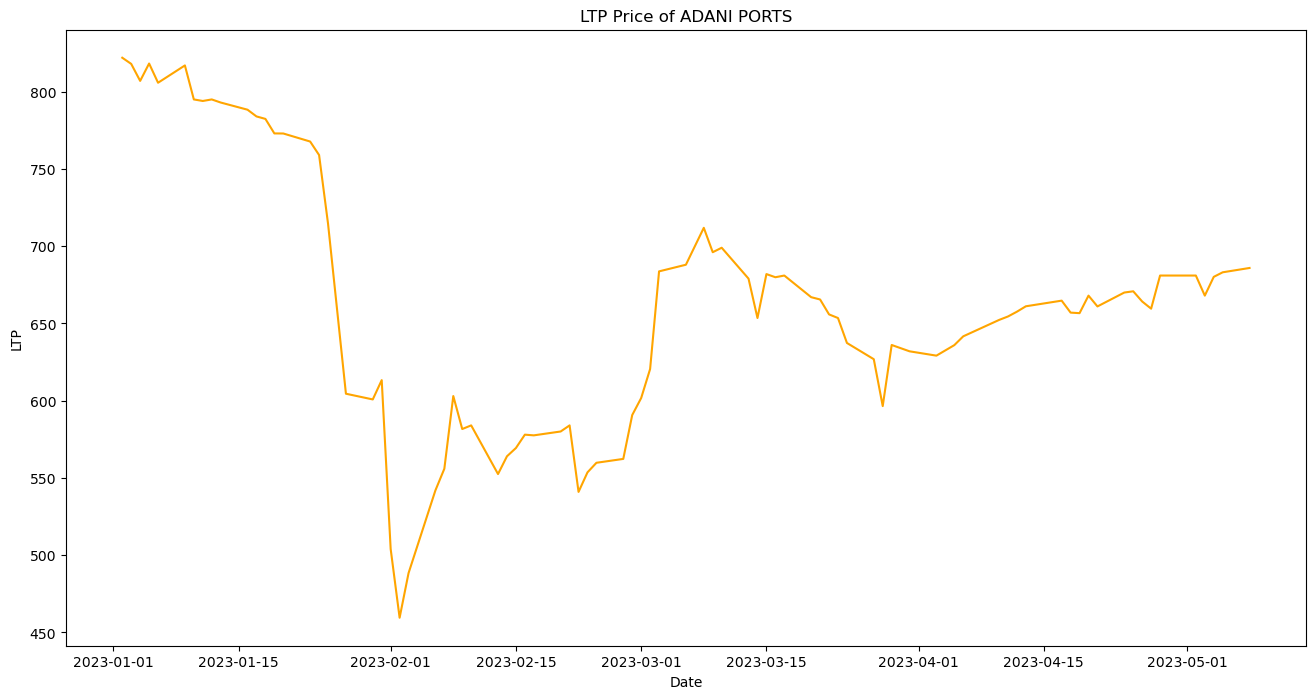

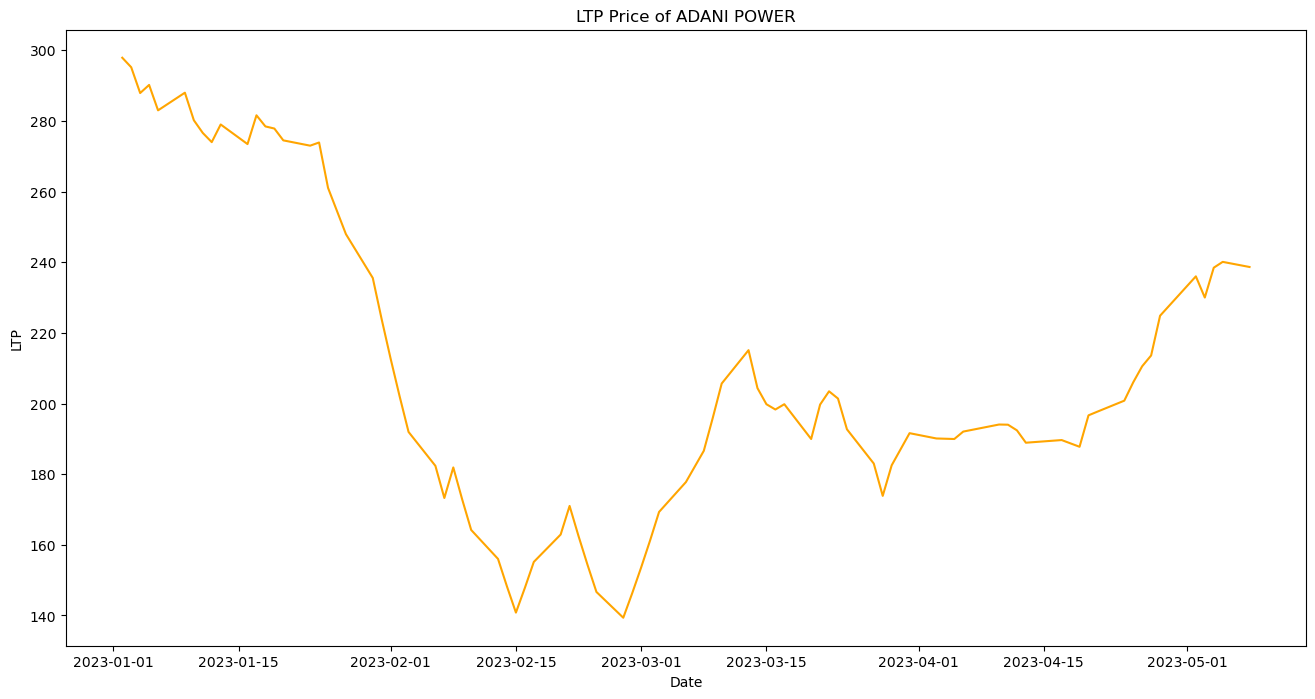

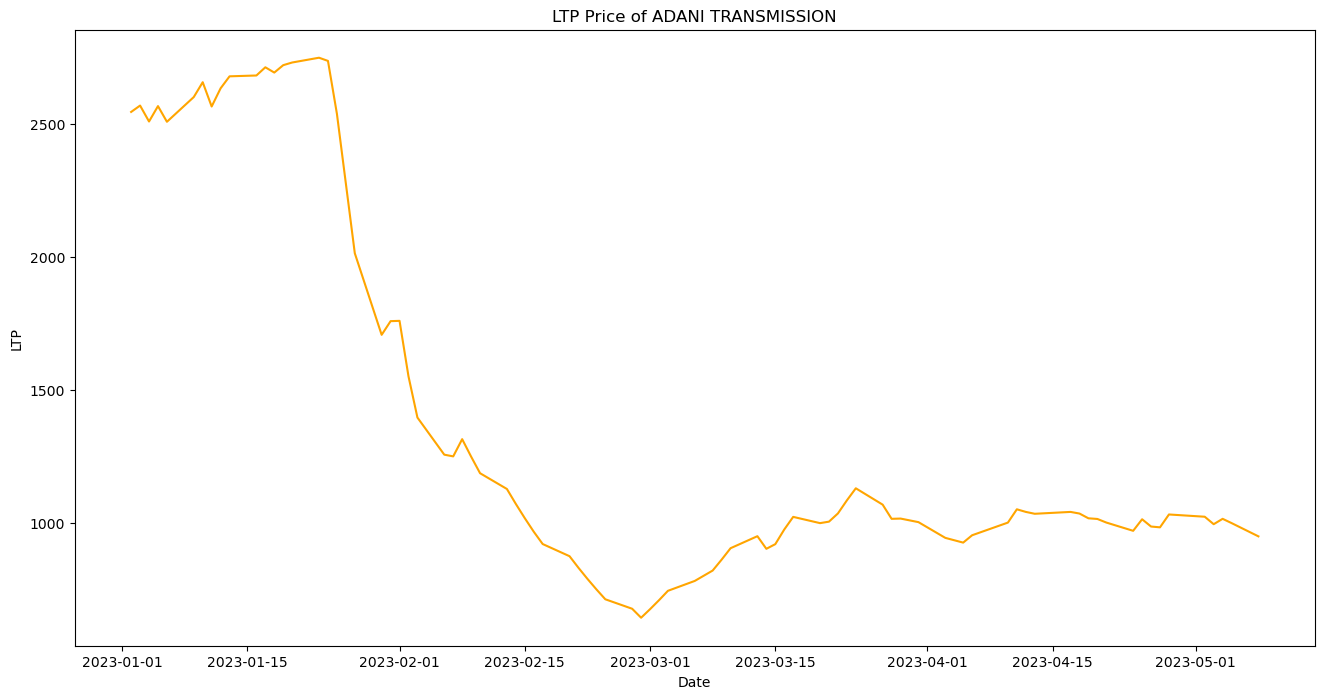

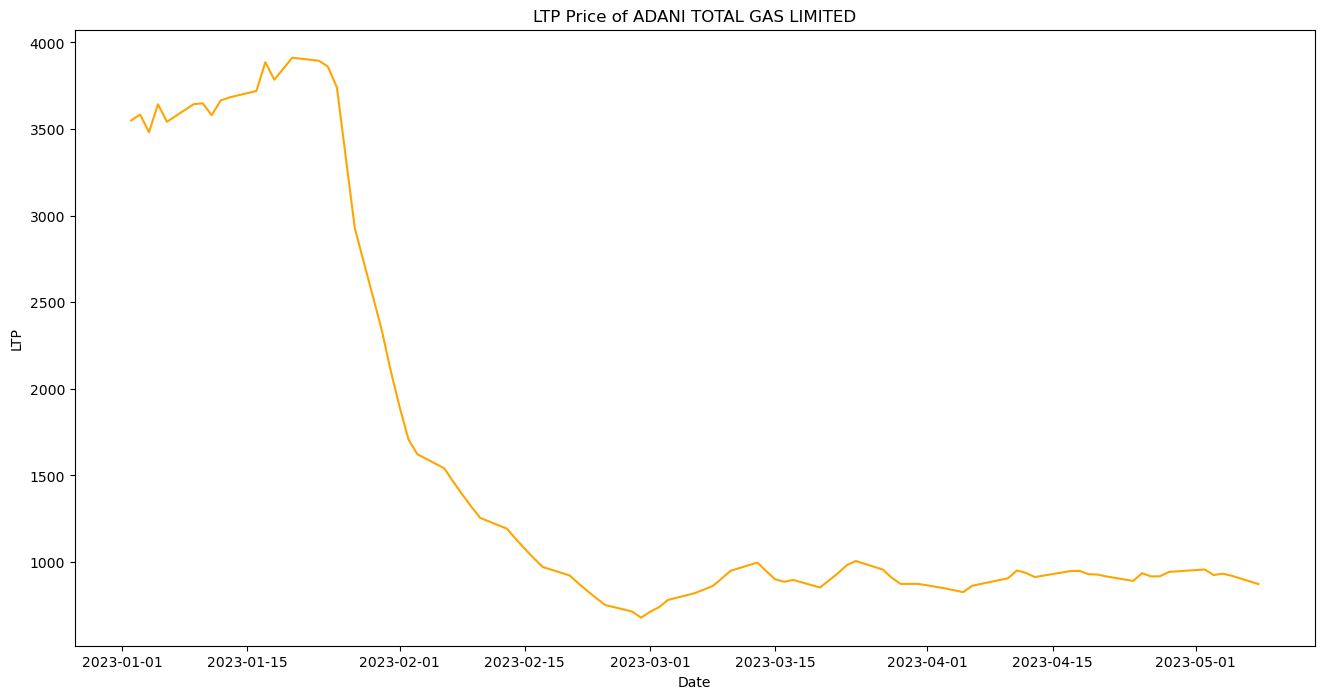

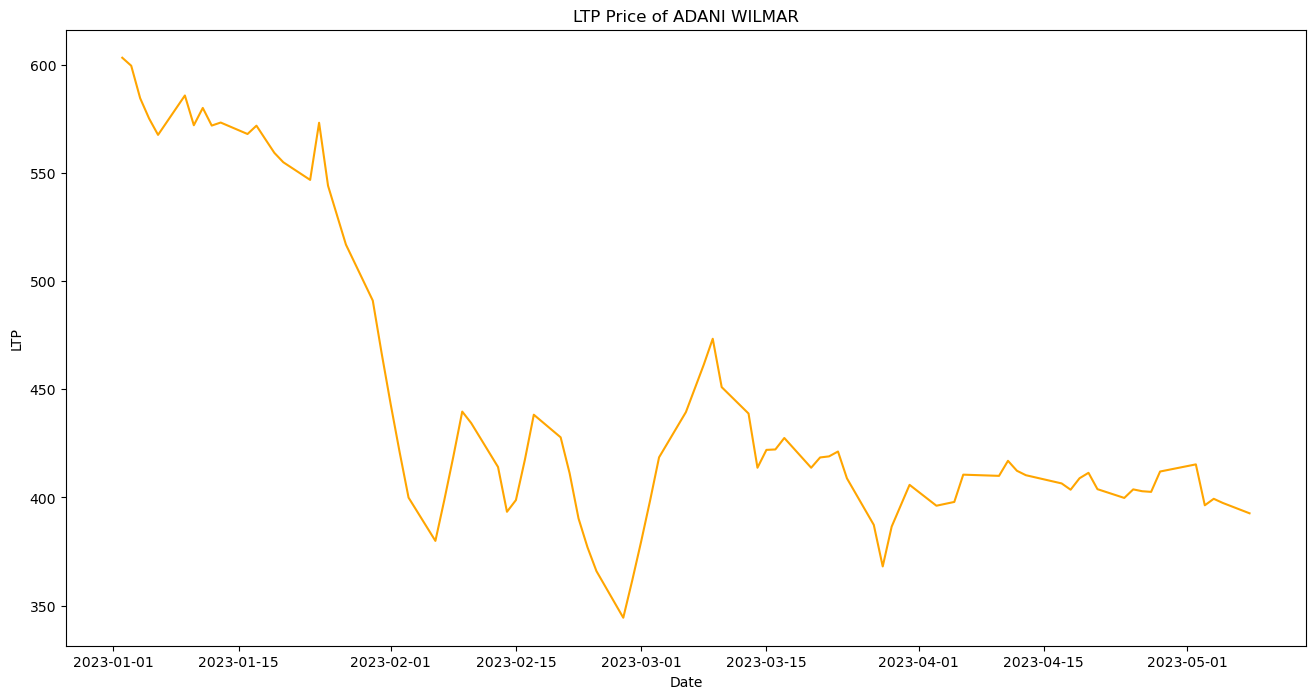





Showing stock trends for VWAP price






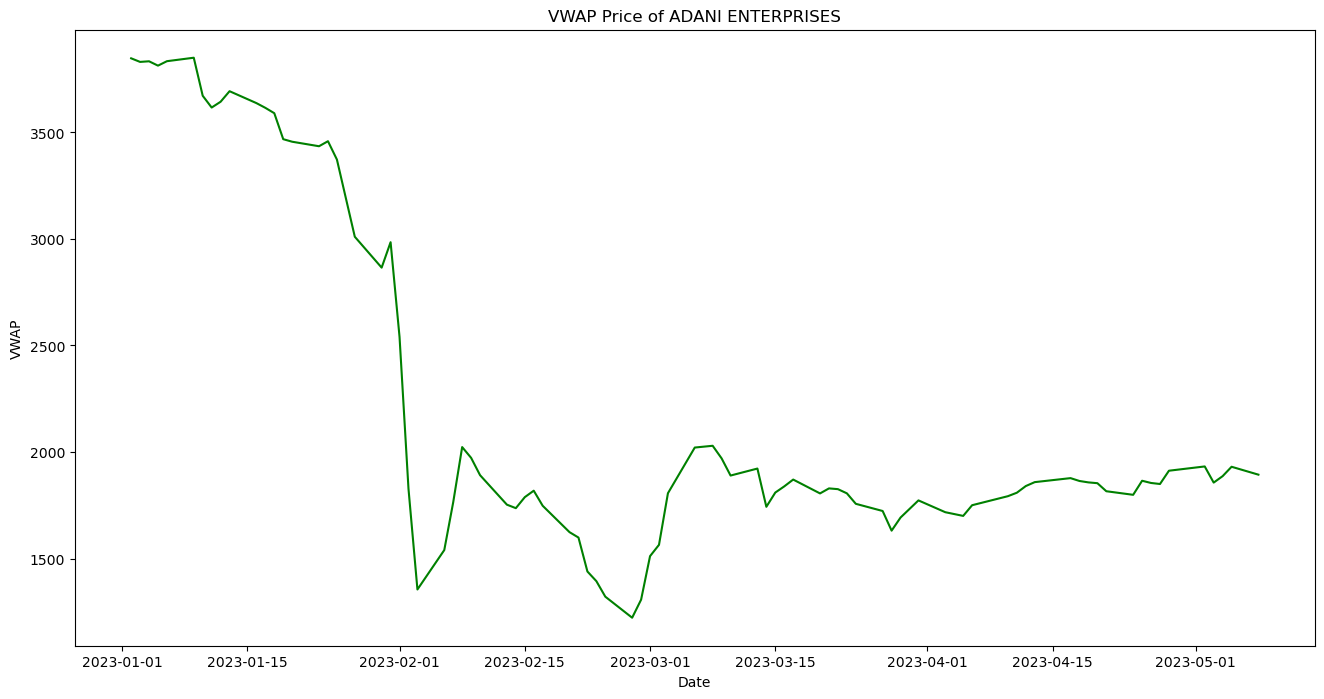

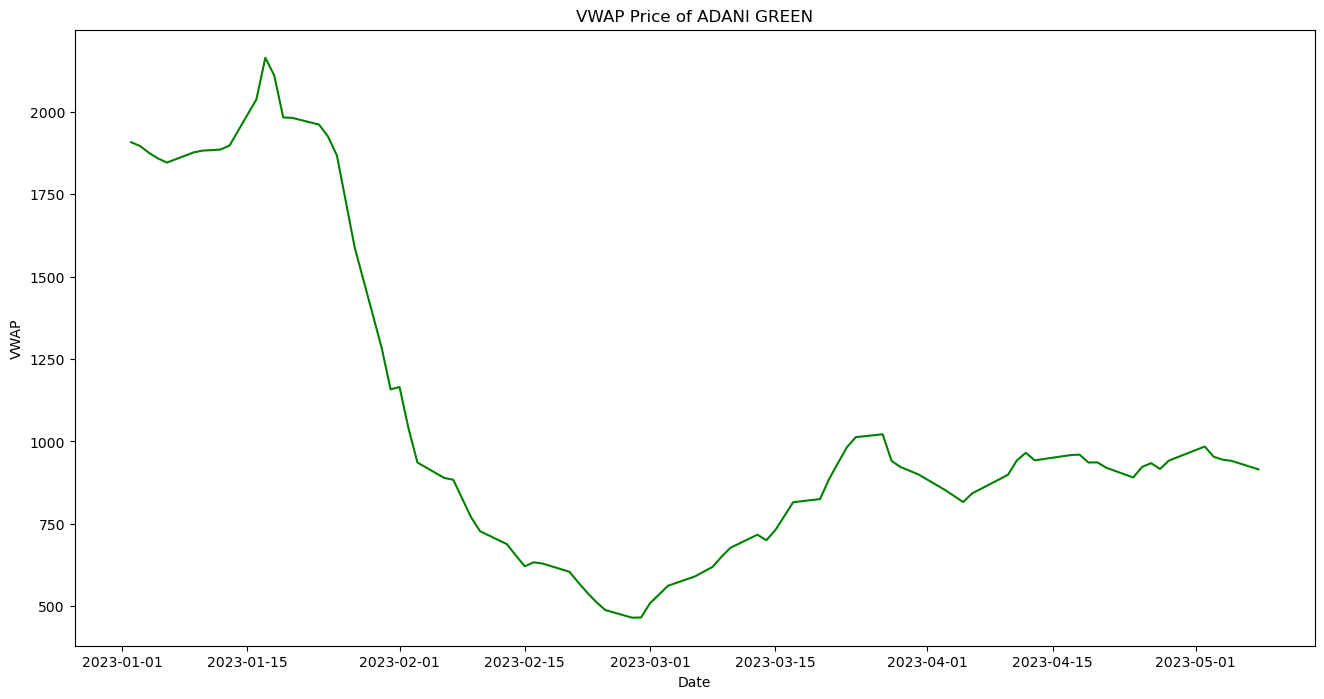

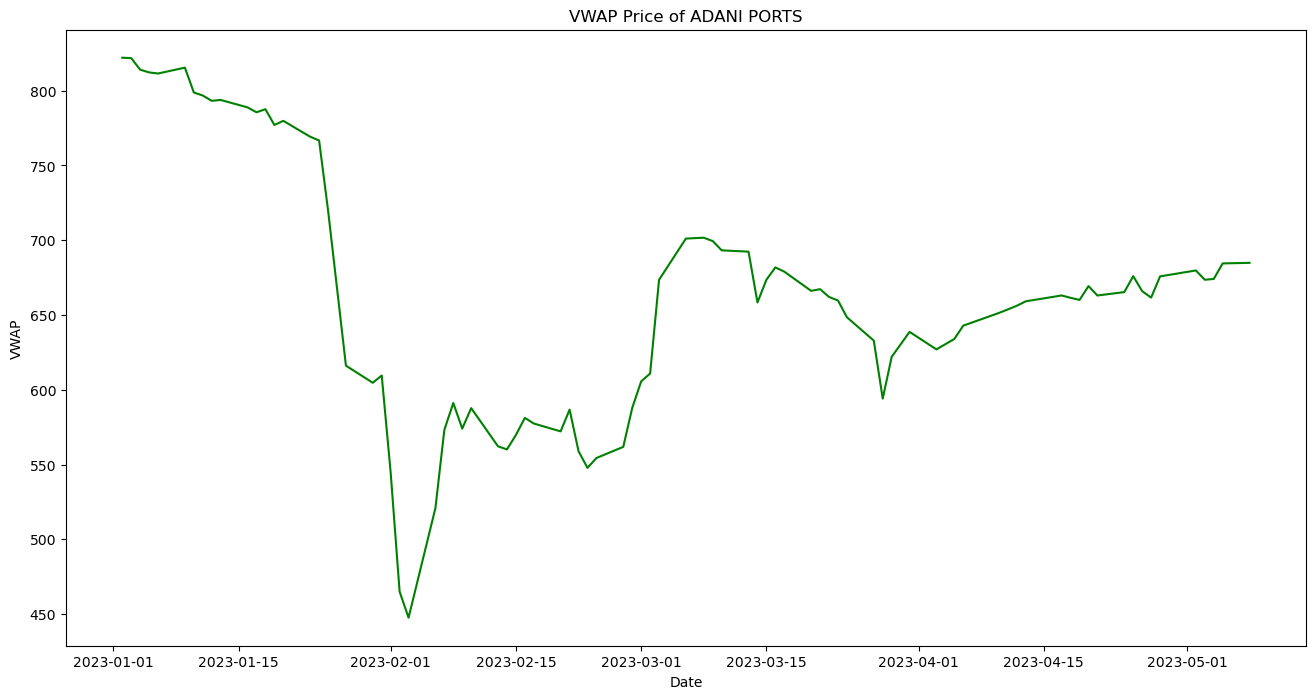

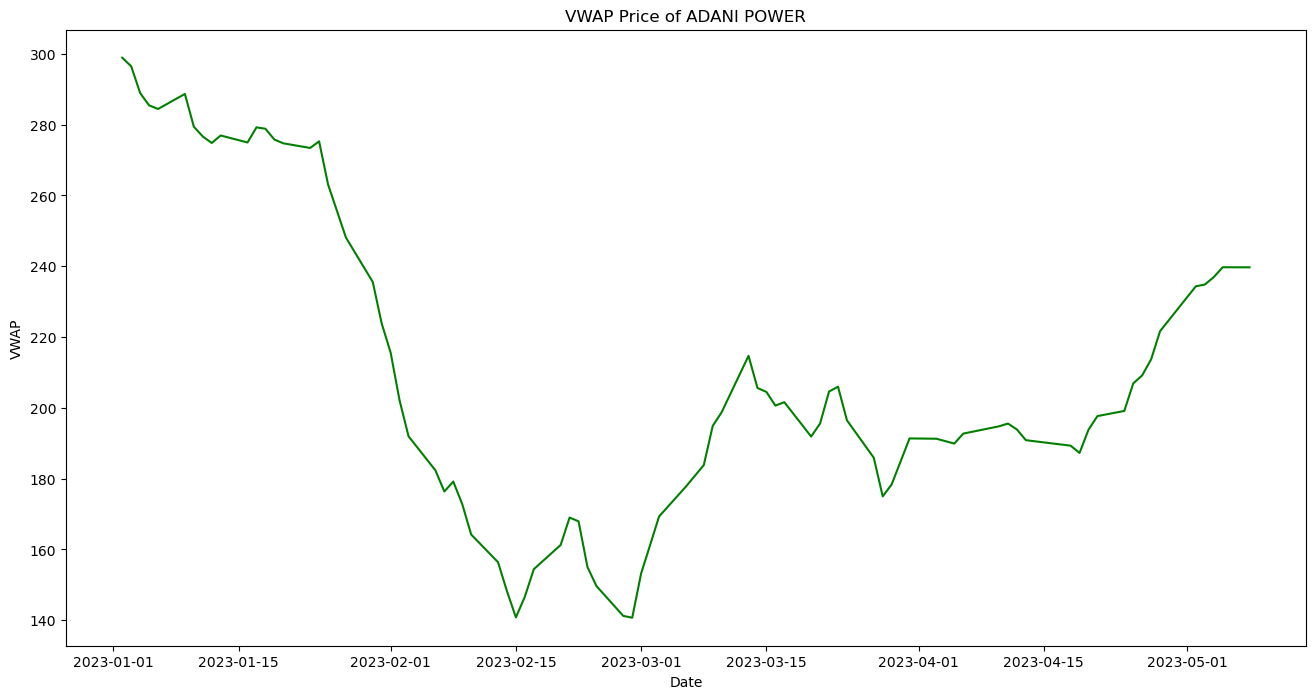

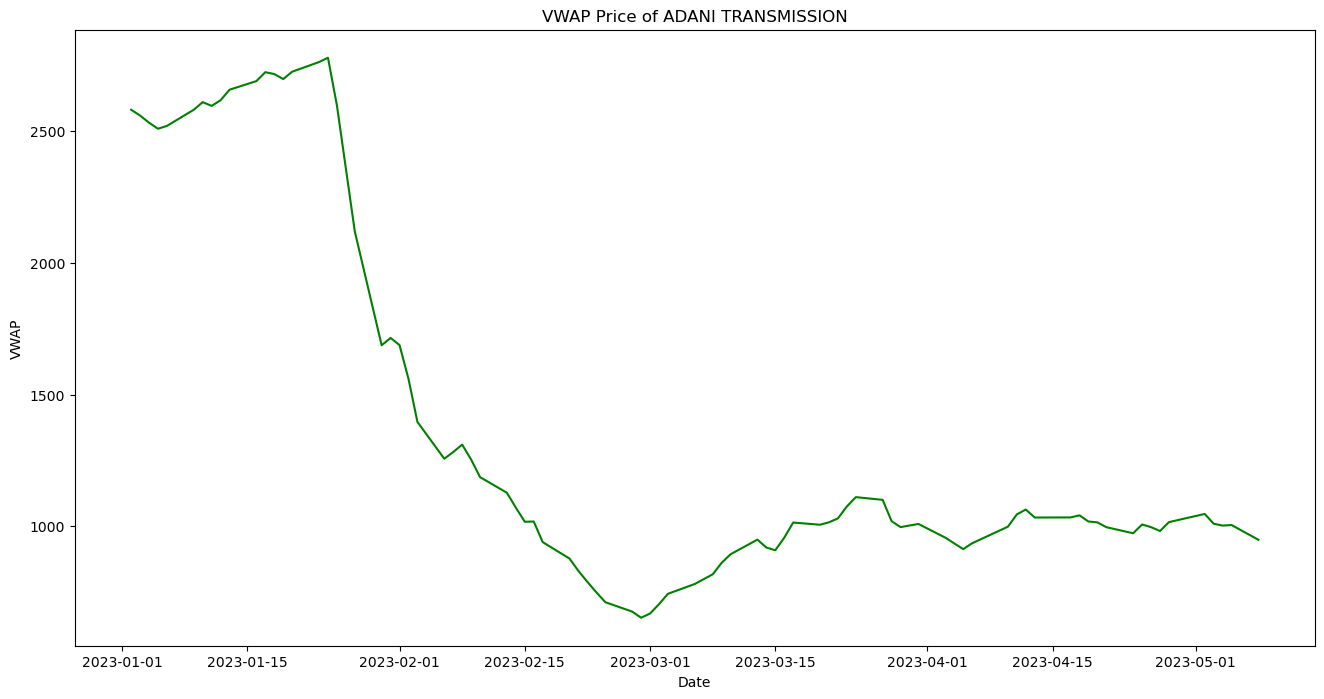

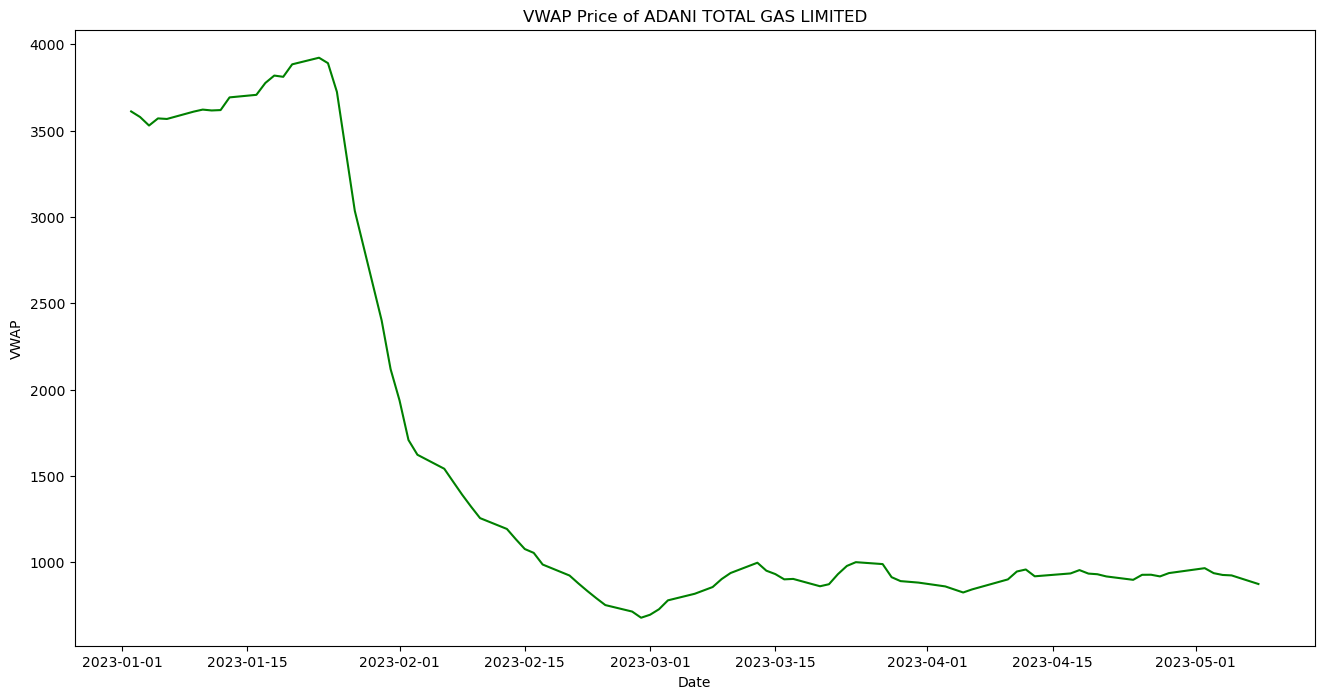

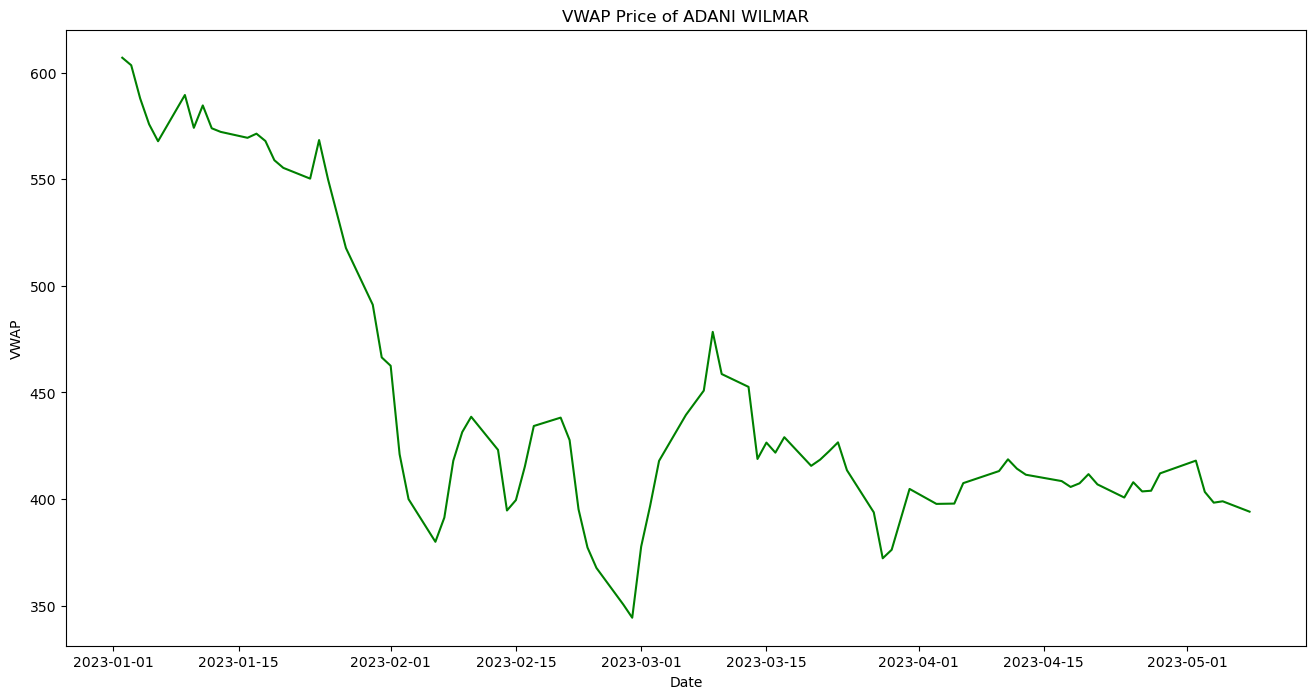





Showing stock trends for 52W H price






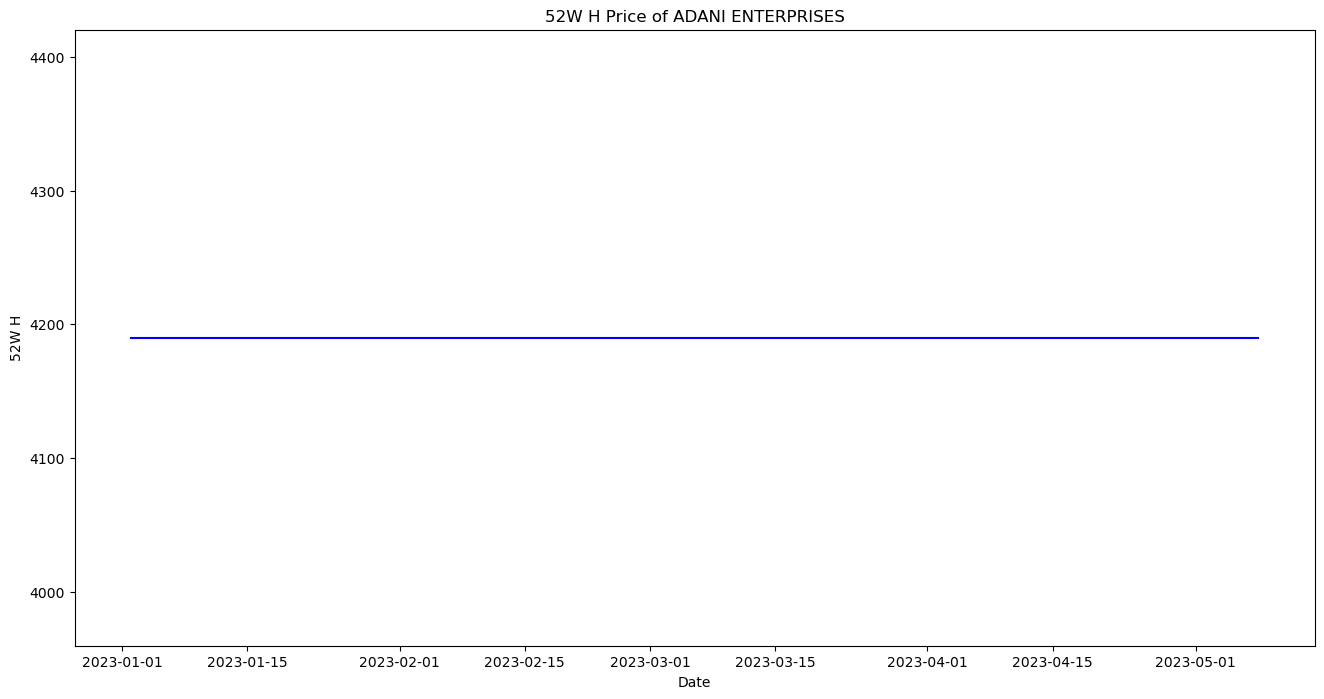

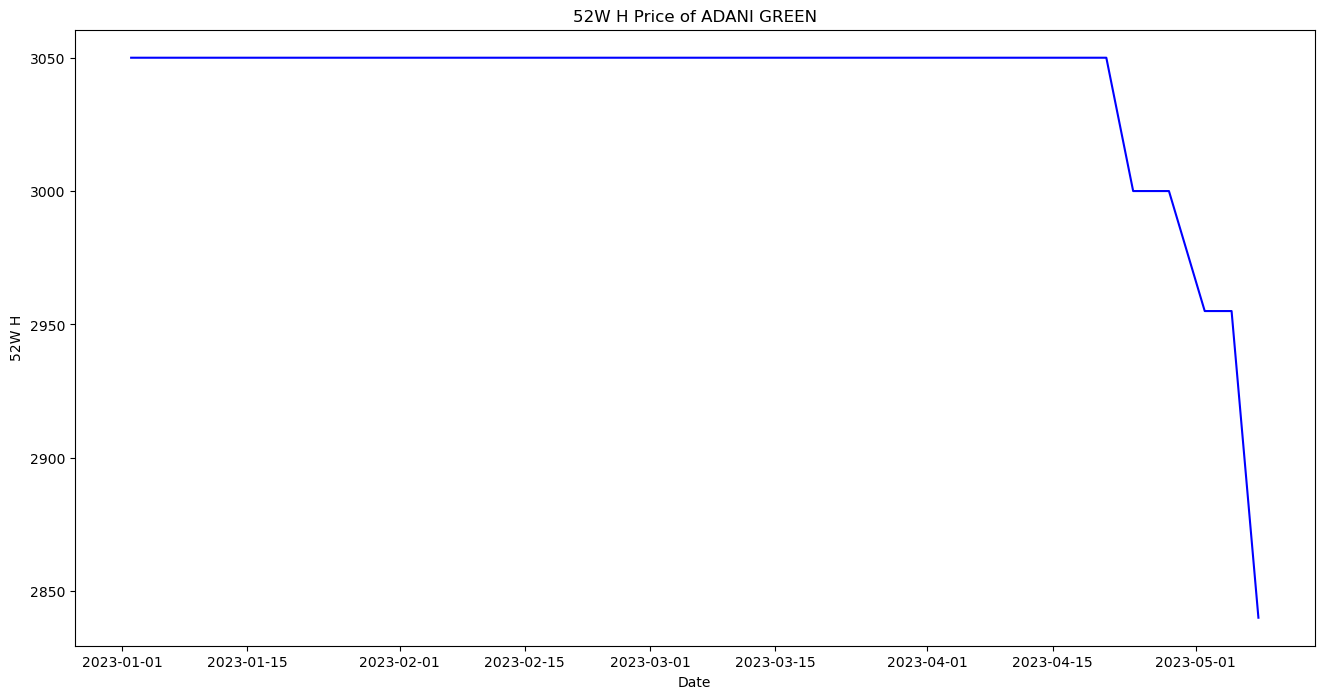

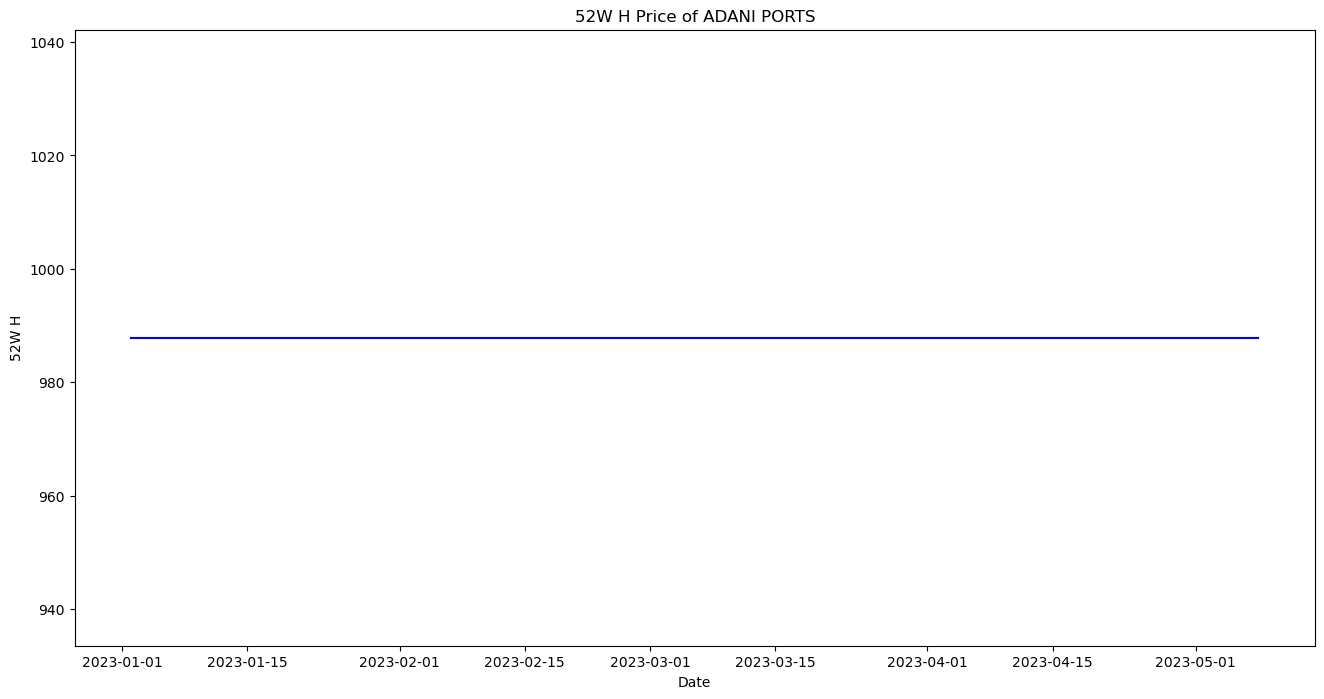

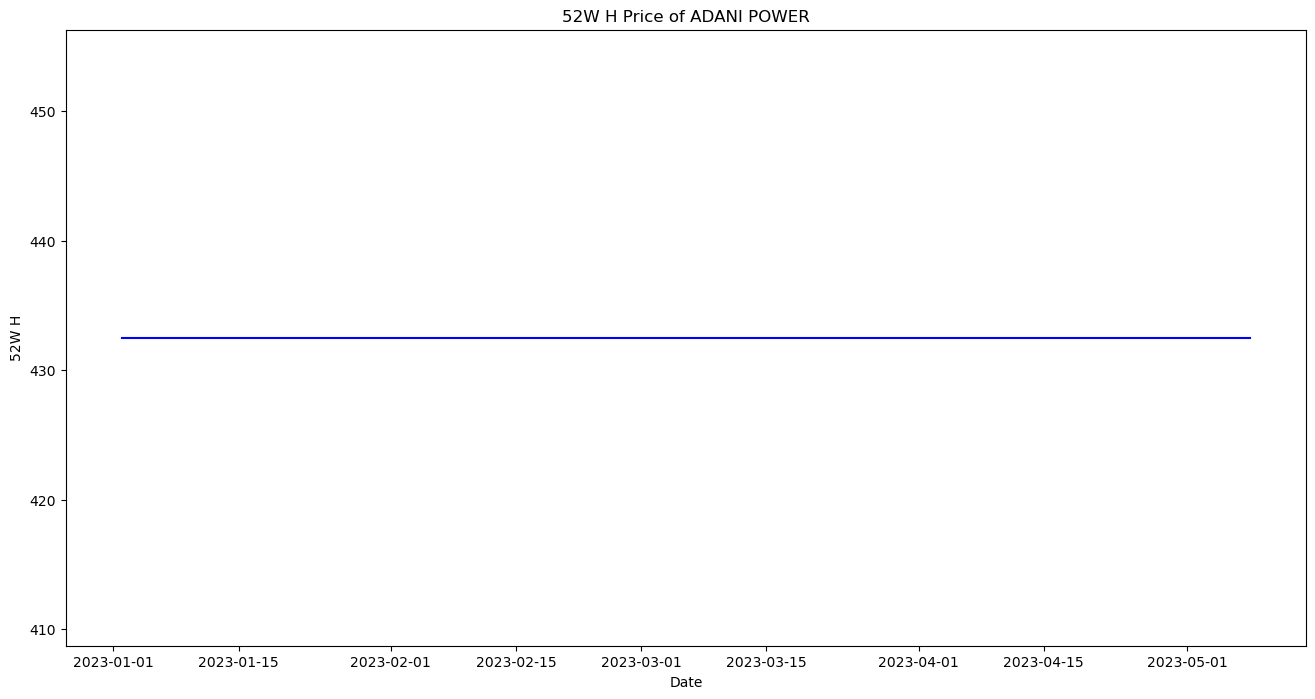

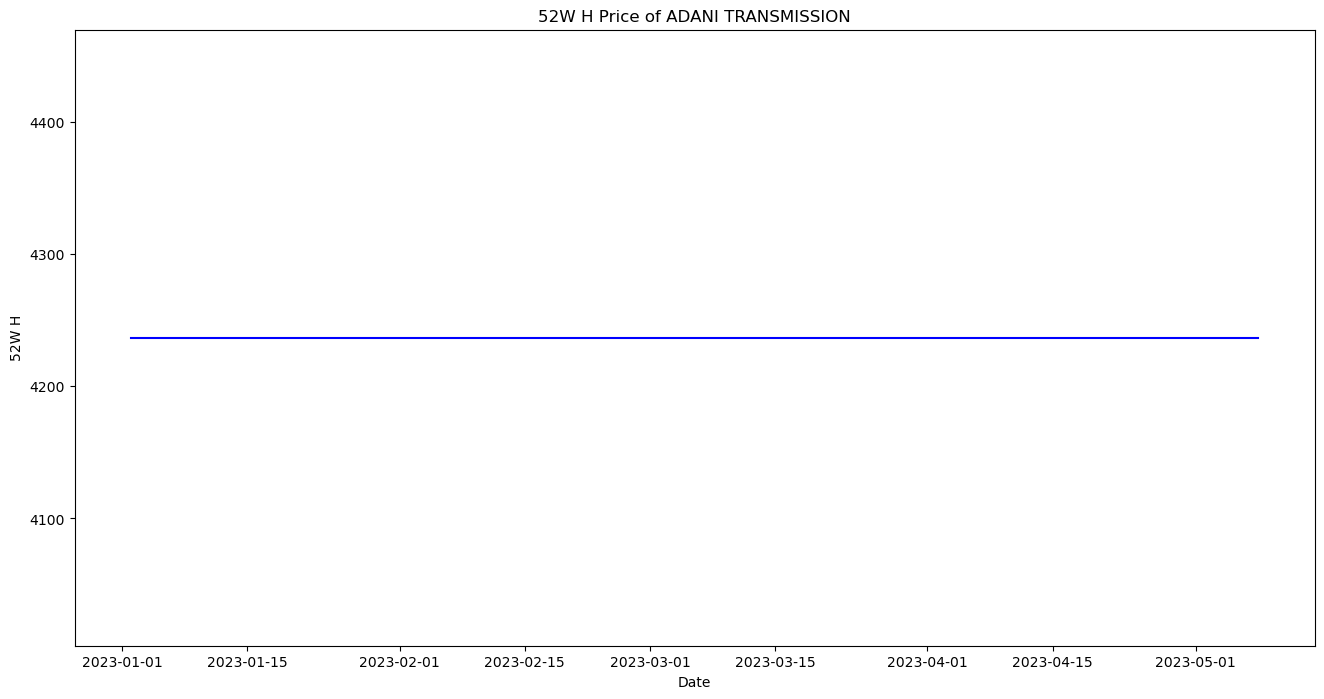

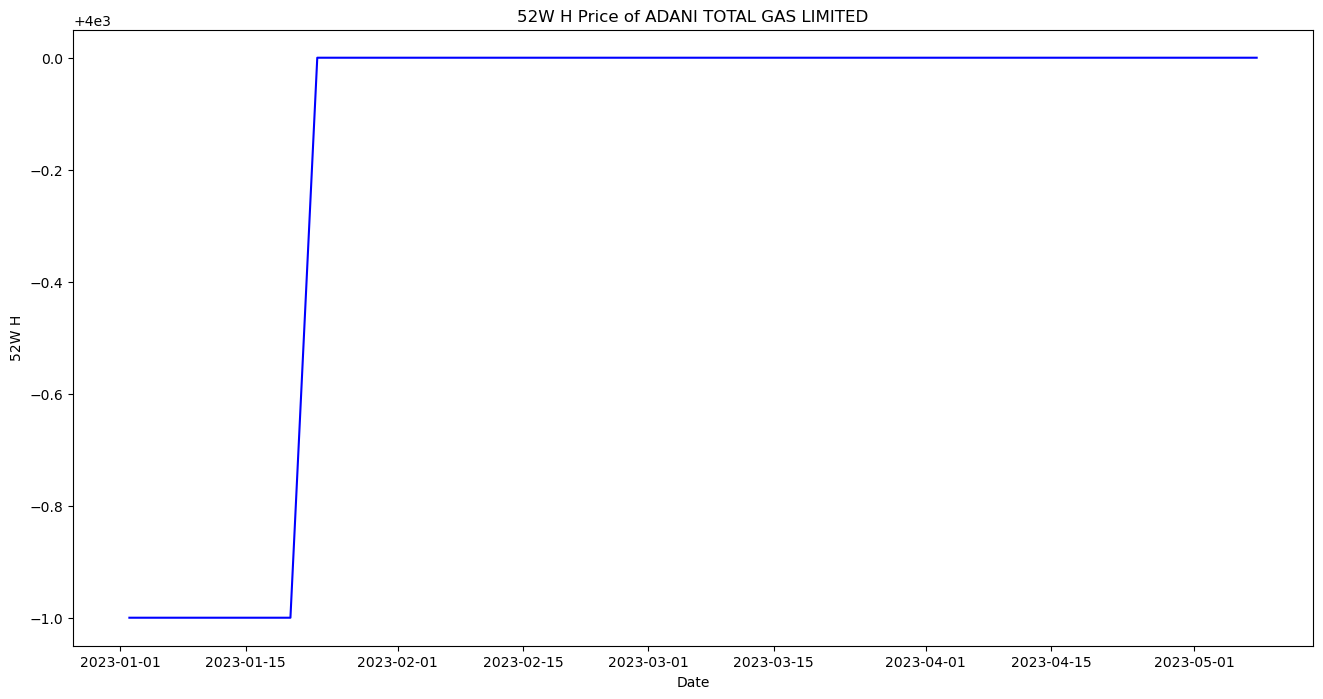

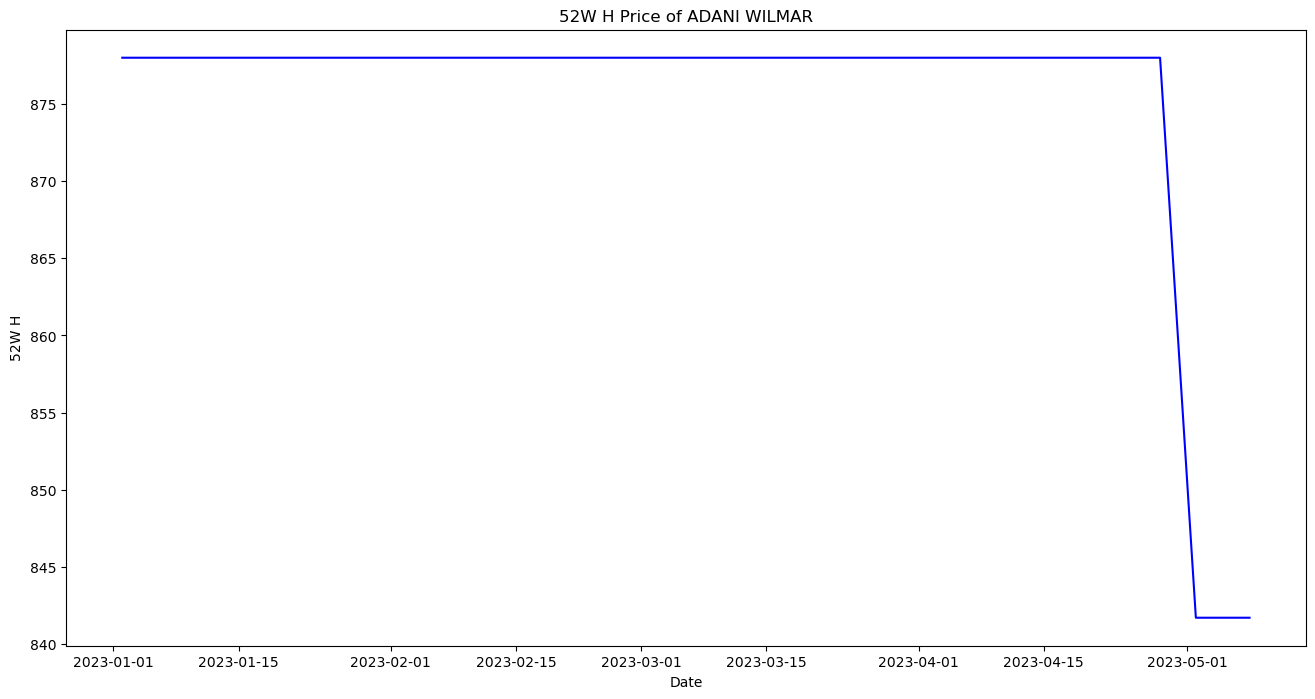





Showing stock trends for 52W L price






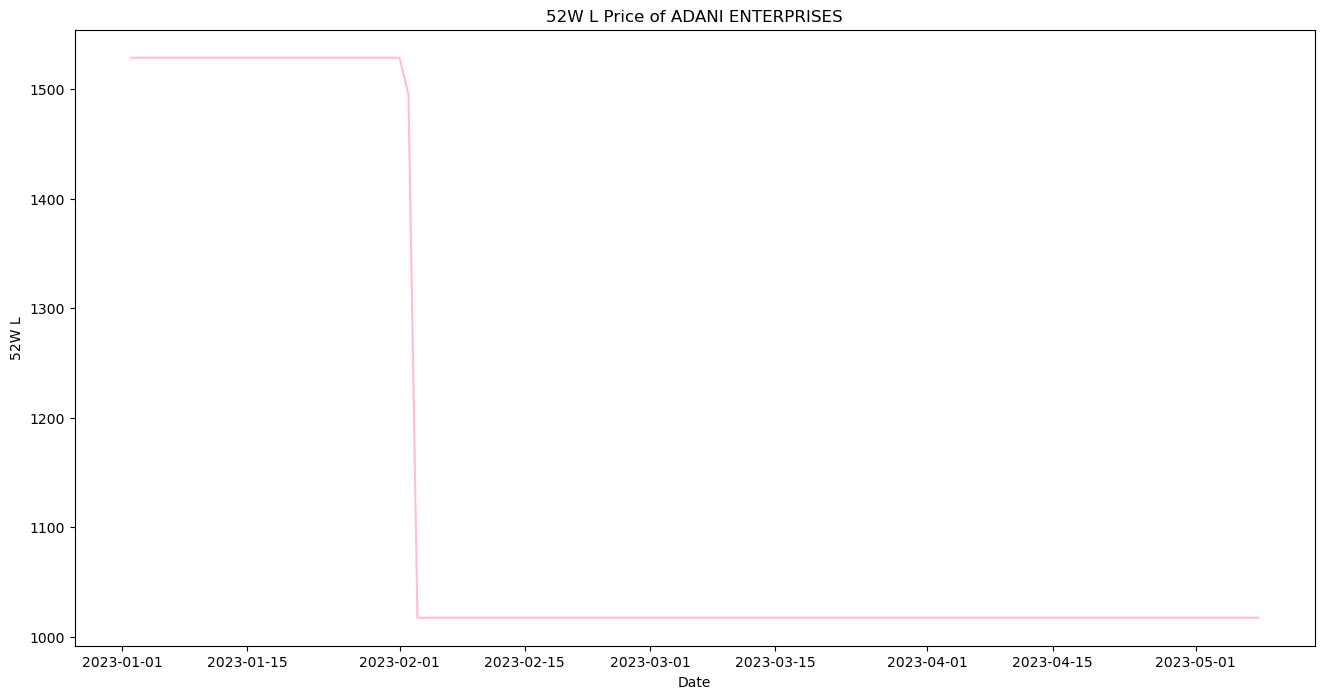

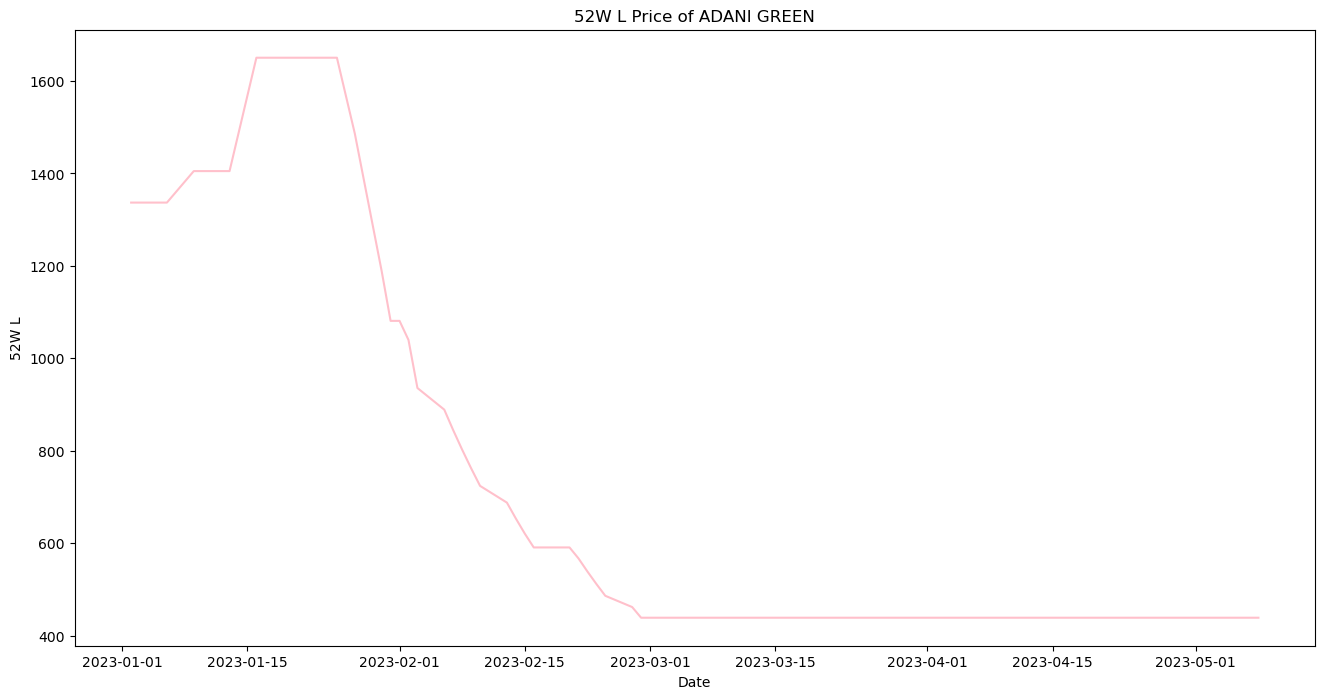

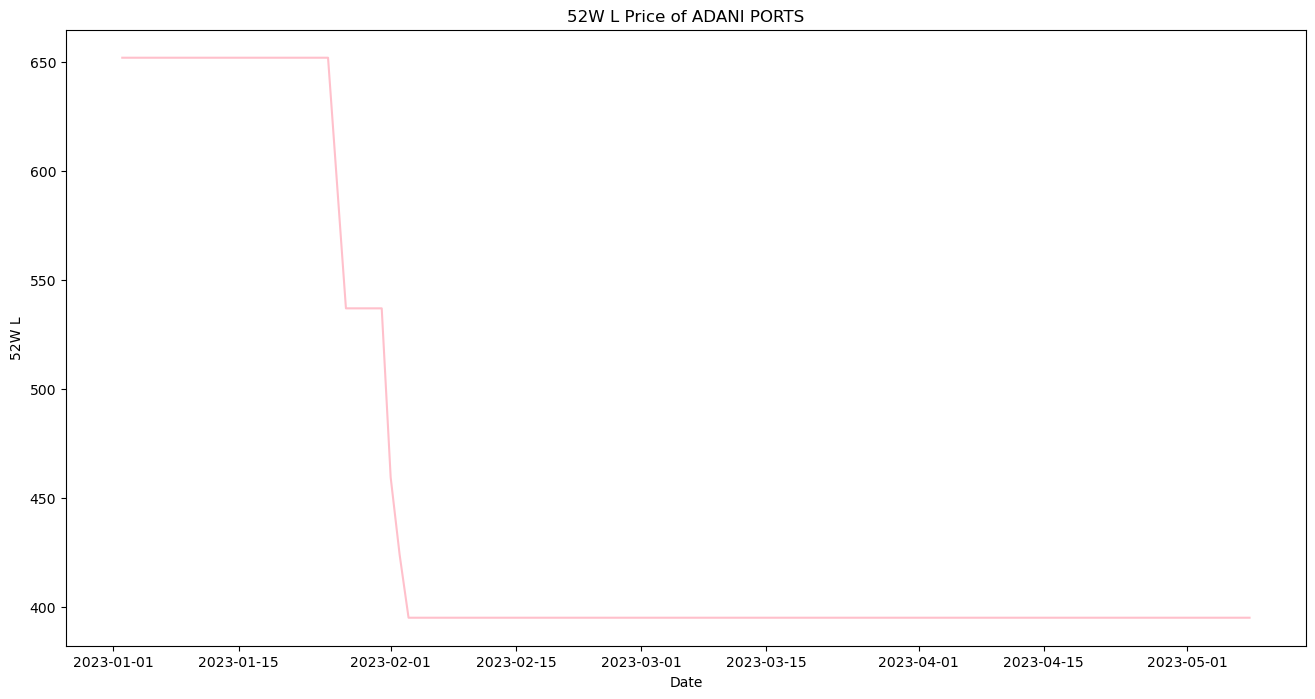

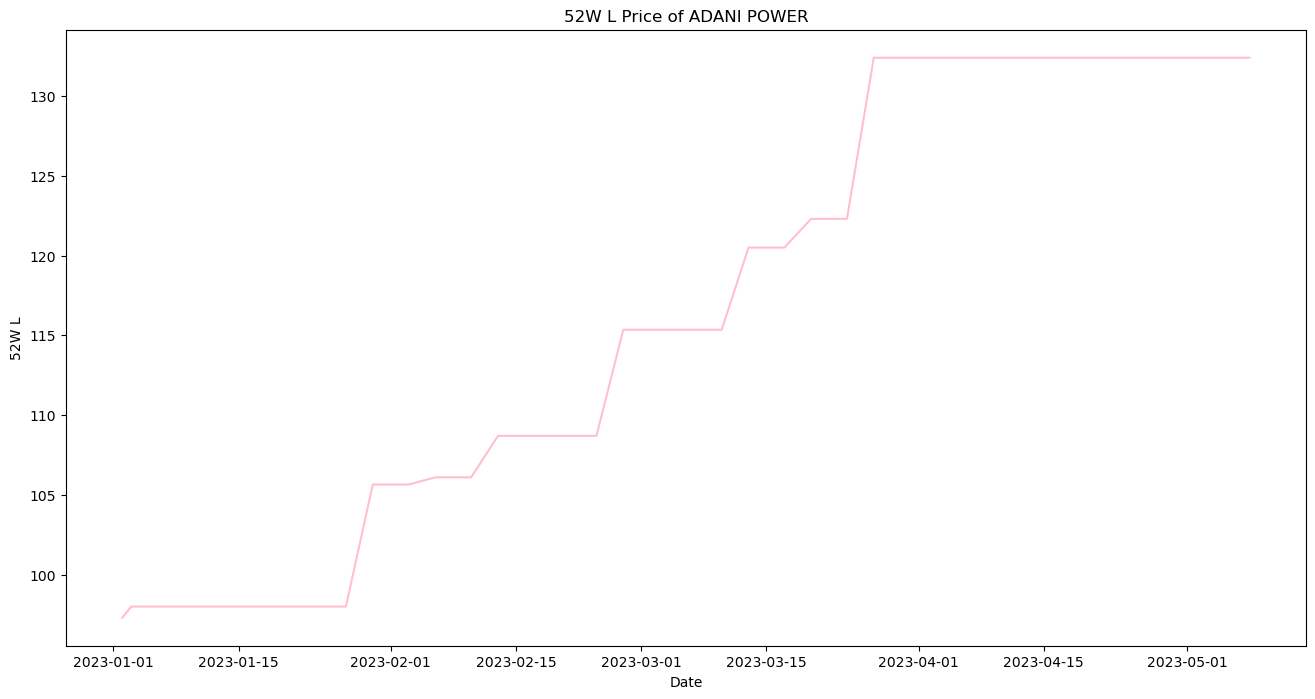

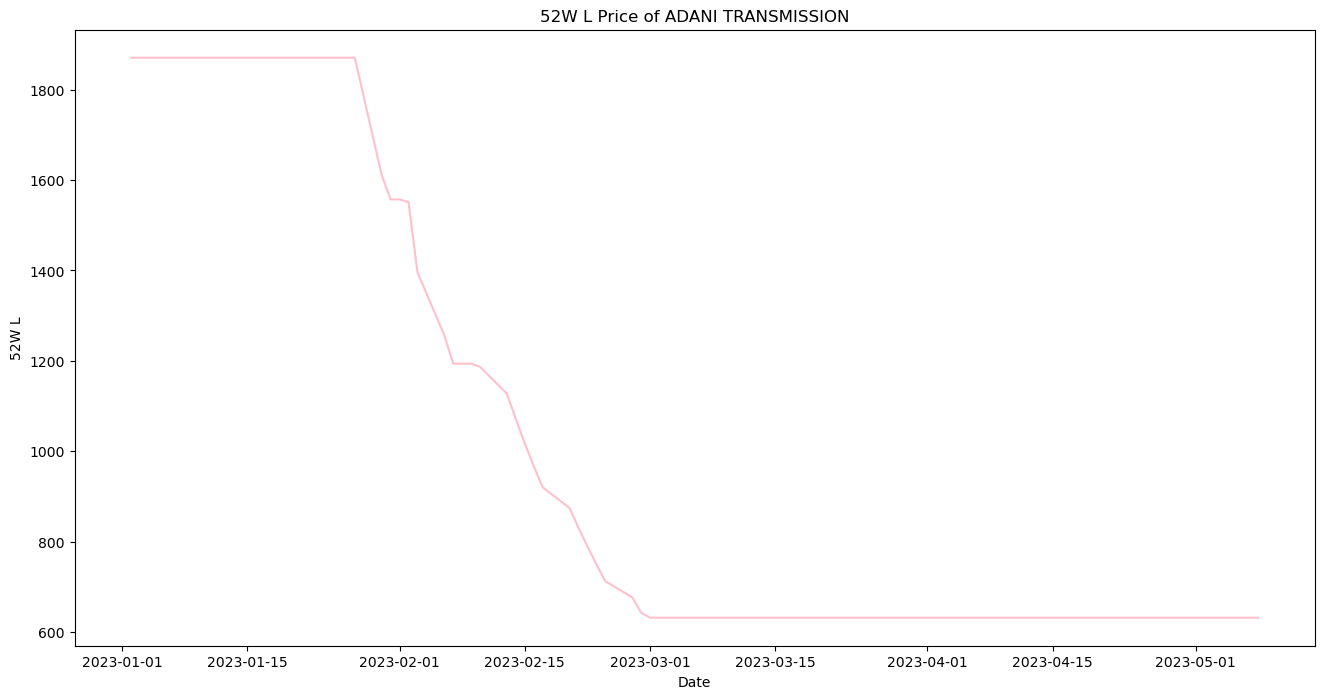

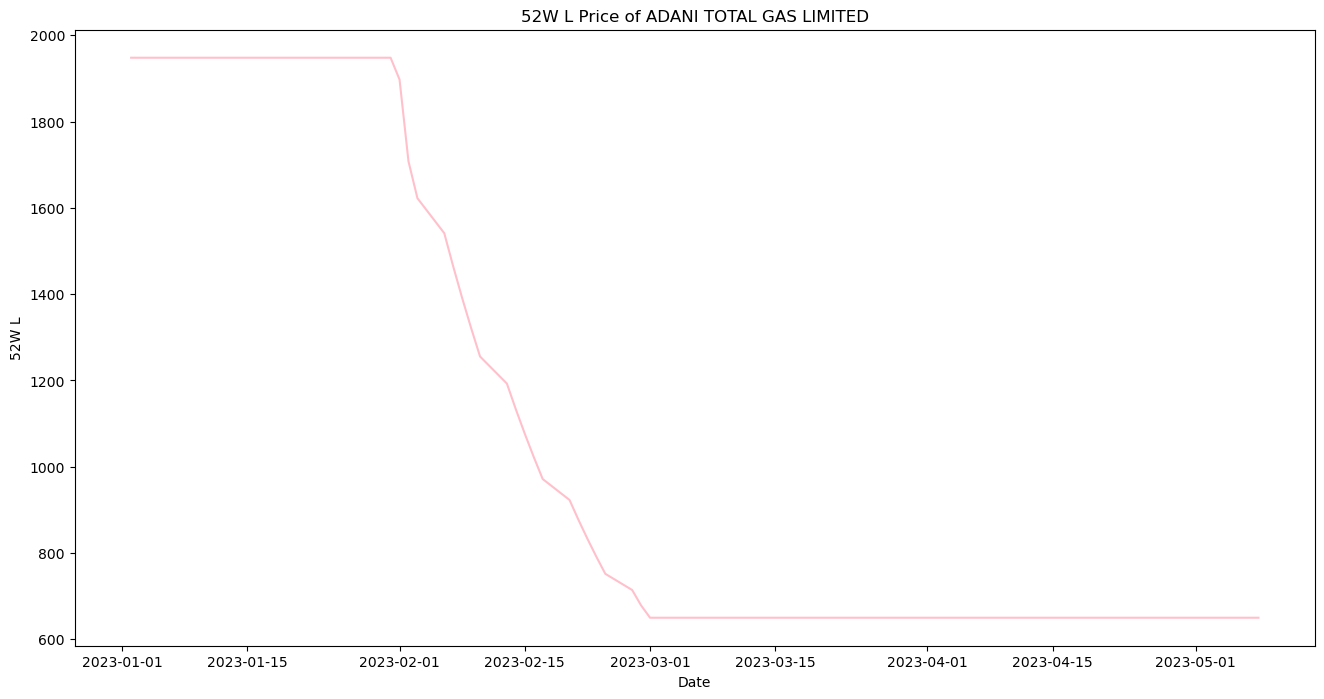

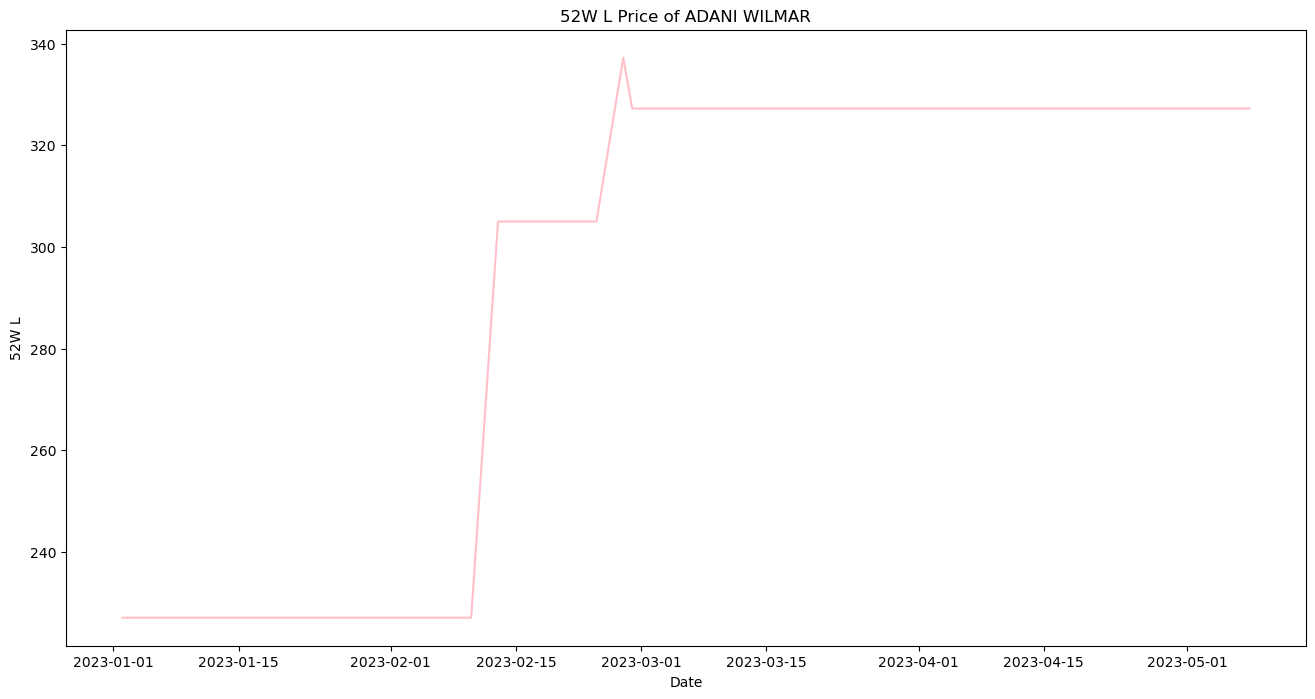

In [30]:
plist=['OPEN','HIGH','LOW','close','PREV. CLOSE','ltp','vwap','52W H','52W L']
for i in plist:
    print('\n\n\n')
    print("Showing stock trends for "+i.upper()+" price")
    print('\n\n\n')
    price(df1,'ADANI ENTERPRISES',i)
    price(df2,'ADANI GREEN',i)
    price(df3,'ADANI PORTS',i)  
    price(df4,'ADANI POWER',i)
    price(df5,'ADANI TRANSMISSION',i)
    price(df6,'ADANI TOTAL GAS LIMITED',i)
    price(df7,'ADANI WILMAR',i)
    

**A comparitive analysis of the high and low prices of stock over the years showing change in the daily range of trading.**

In [31]:
def high_low(df,cmp_name):
    plt.figure(figsize=(20,8))
    df['Daily Range']= df['HIGH']-df['LOW']
    plt.plot(df['Date'],df['Daily Range'],c='blue')
    plt.xlabel("Years")
    plt.ylabel("Stock Price Trading Range") 
    plt.title("Daily Stock Price Range for "+cmp_name)
    plt.show()

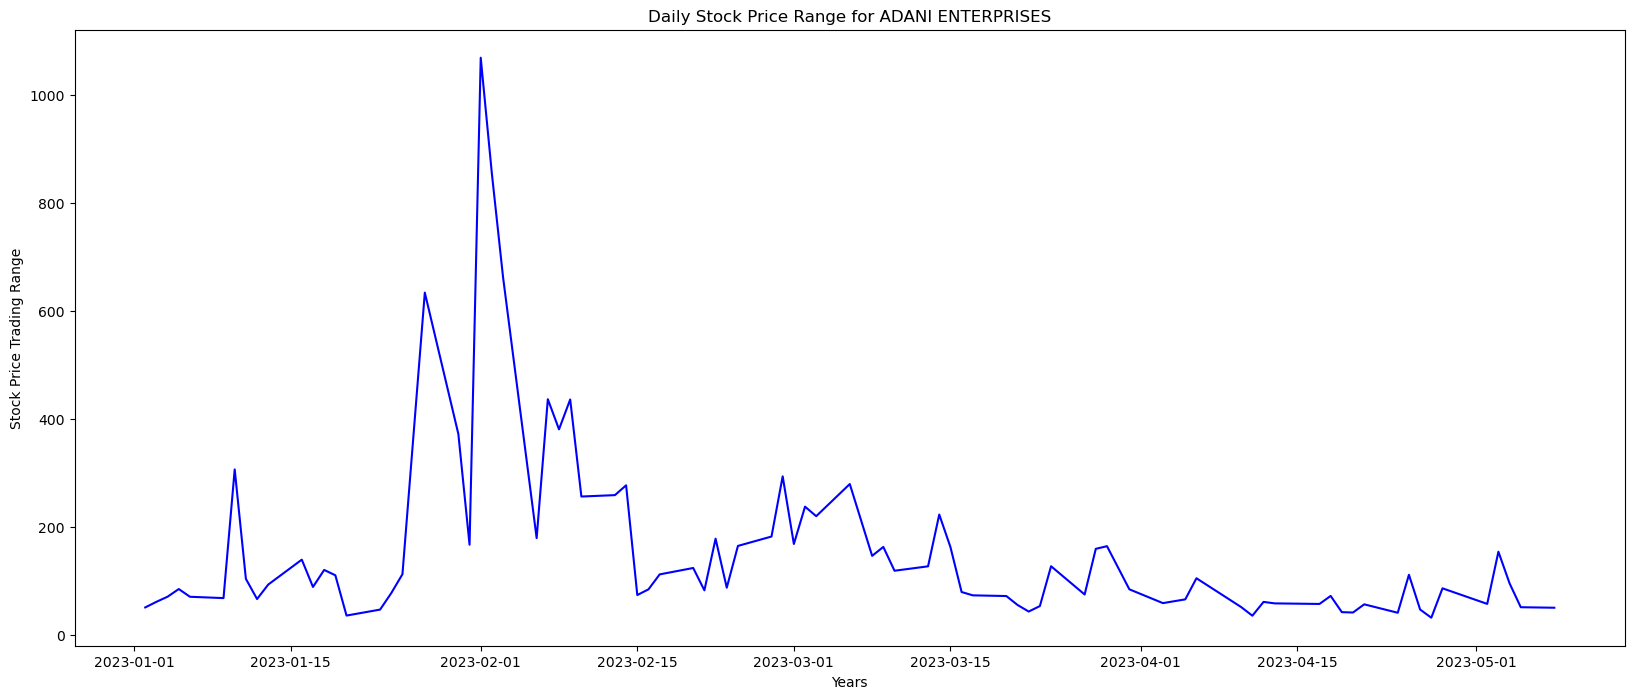

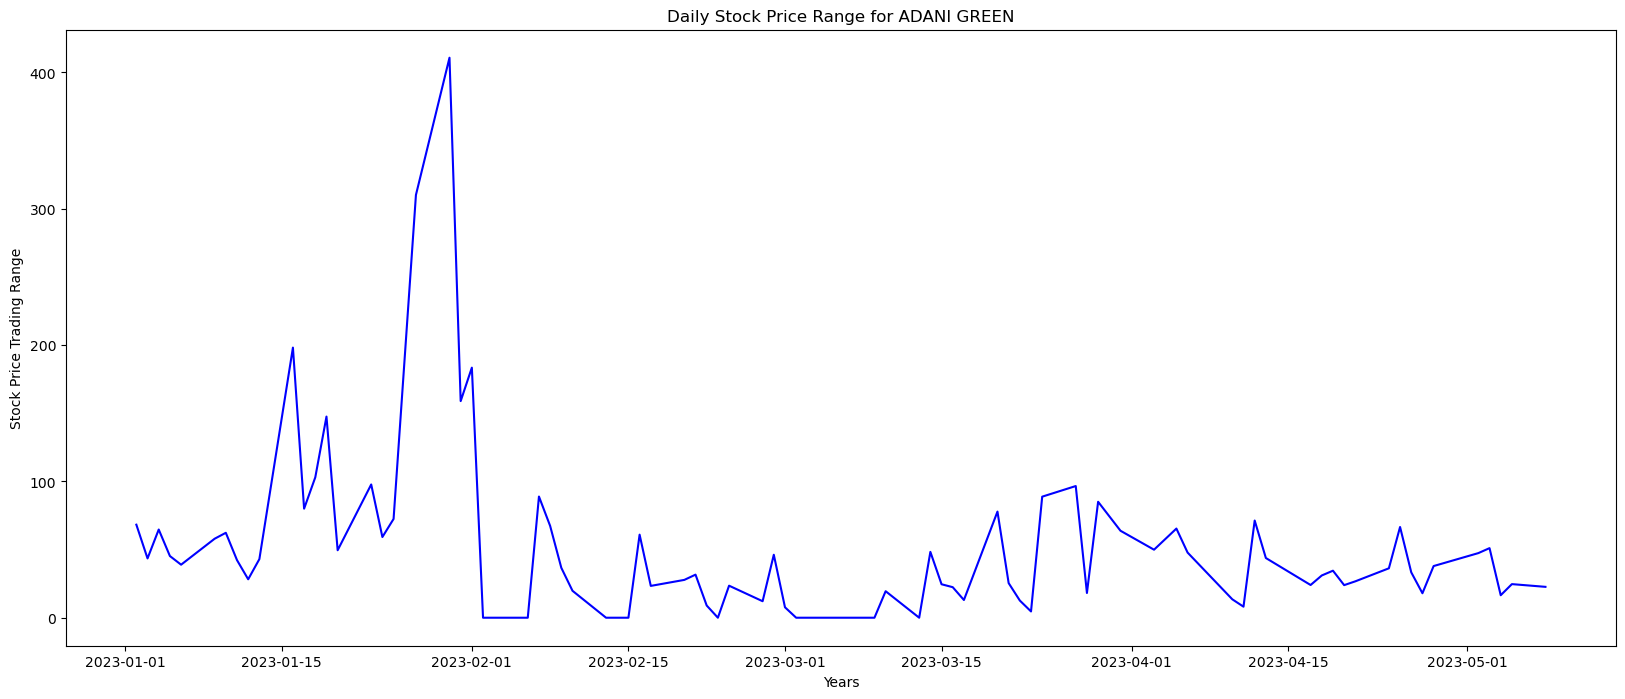

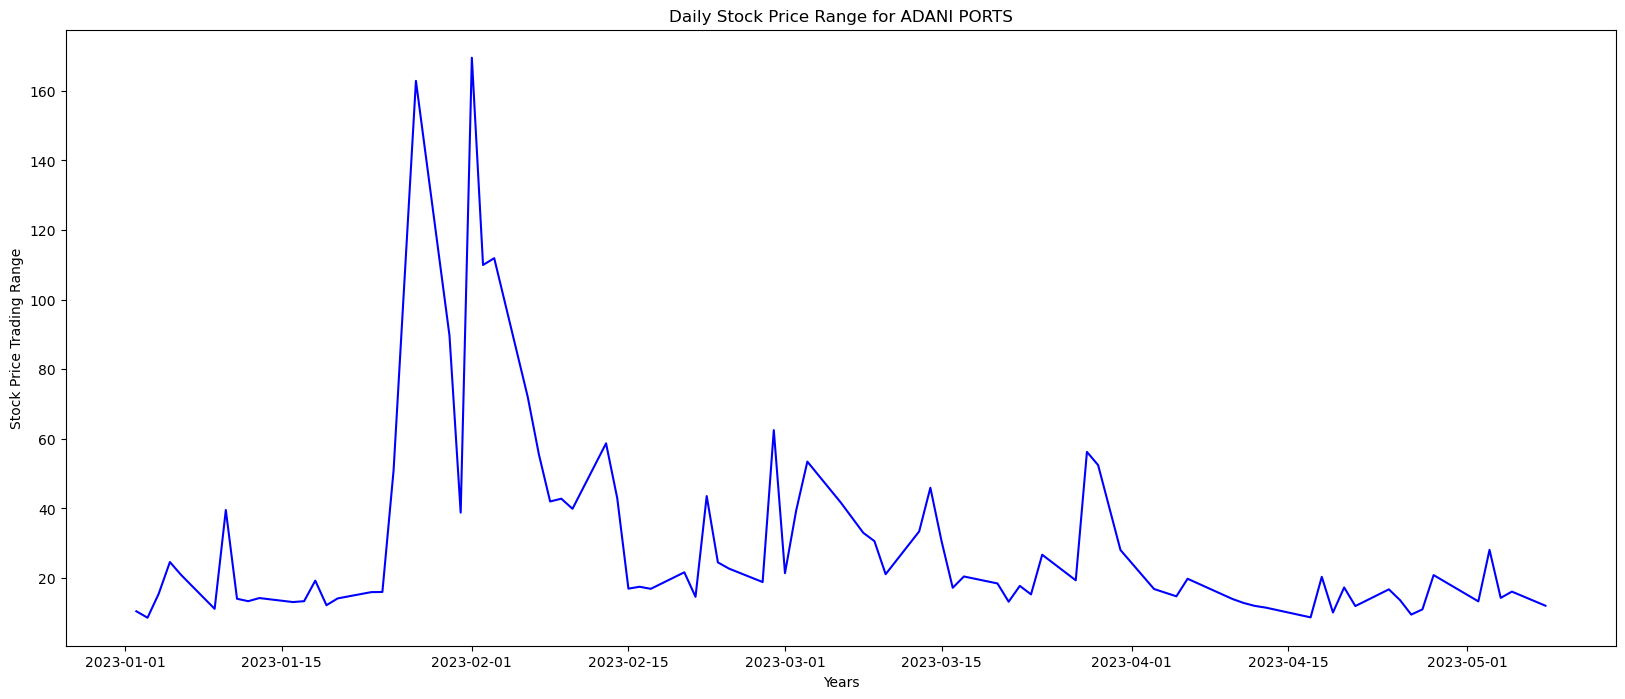

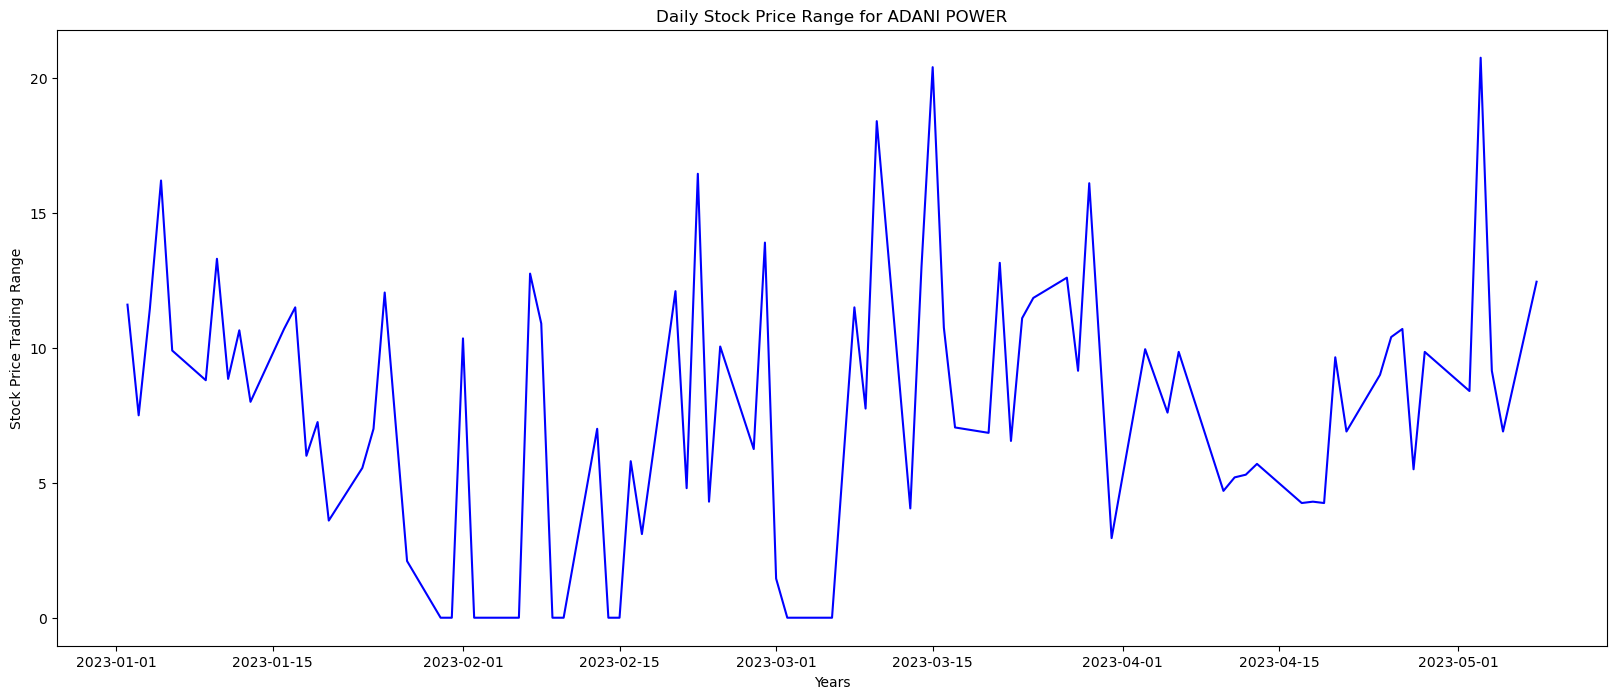

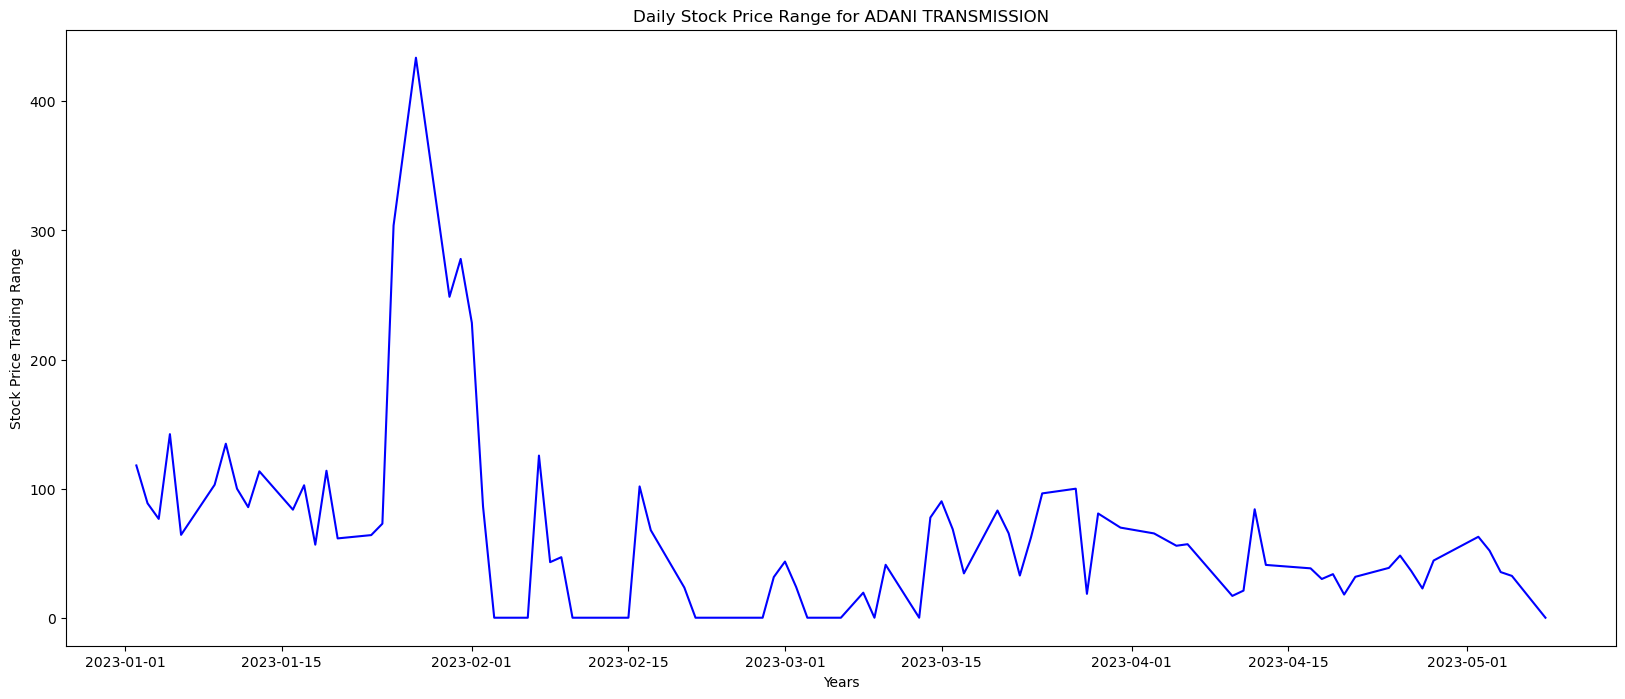

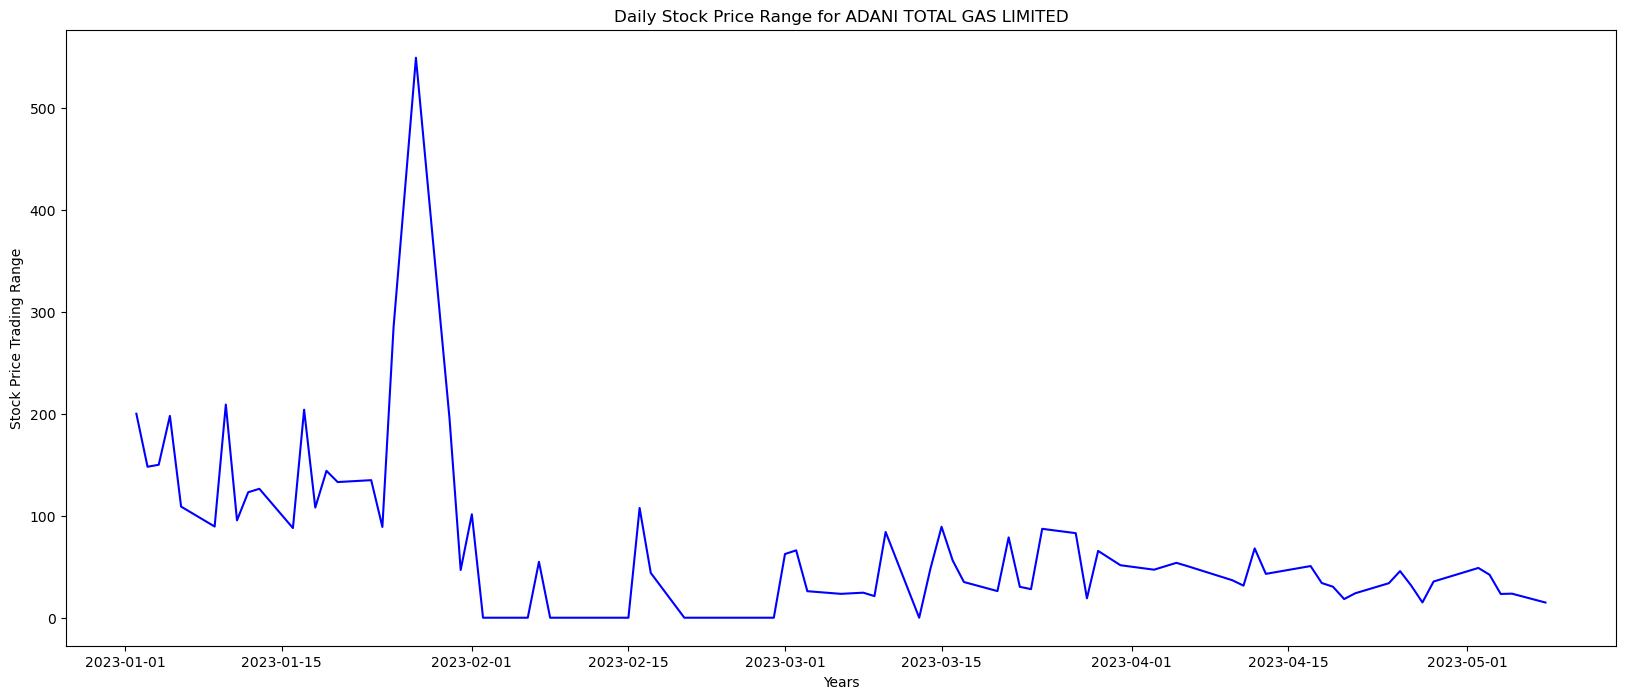

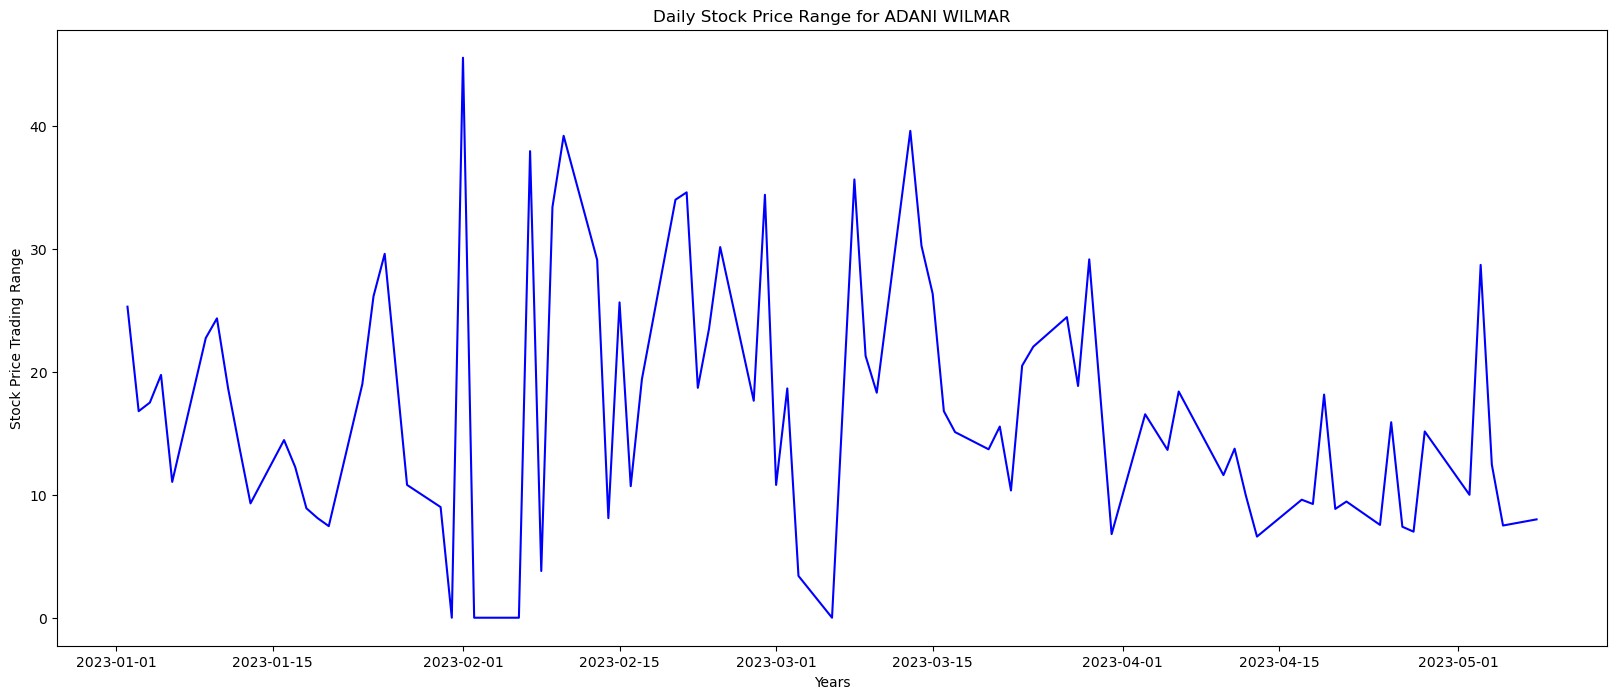

In [32]:
high_low(df1,'ADANI ENTERPRISES')
high_low(df2,'ADANI GREEN')
high_low(df3,'ADANI PORTS')
high_low(df4,'ADANI POWER')
high_low(df5,'ADANI TRANSMISSION')
high_low(df6,'ADANI TOTAL GAS LIMITED')
high_low(df7,'ADANI WILMAR')

**DAILY FLUCTUATIONS**

In [33]:
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [34]:
def compare_hcl(df,name):
    fig=px.line(df,x='Date',y=['close','HIGH','LOW'],
            template='plotly_dark',
            color_discrete_sequence=['red','orange','blue'],
            title='{} Stock Price Over Time for'.format(name)
               )
    fig.show()

In [35]:
compare_hcl(df1,'ADANI ENTERPRISES')
compare_hcl(df2,'ADANI GREEN')
compare_hcl(df3,'ADANI PORTS')
compare_hcl(df4,'ADANI POWER')
compare_hcl(df5,'ADANI TRANSMISSION')
compare_hcl(df6,'ADANI TOTAL GAS LIMITED')
compare_hcl(df7,'ADANI WILMAR')

In [36]:
df1.head()

Date series     OPEN    HIGH      LOW  PREV. CLOSE  \
Company                                                                      
ADANI ENTERPRISES 2023-05-08     EQ  1920.30  1926.9  1876.00      1920.30   
ADANI ENTERPRISES 2023-05-05     EQ  1954.80  1955.0  1903.15      1911.25   
ADANI ENTERPRISES 2023-05-04     EQ  1839.05  1935.0  1839.05      1839.00   
ADANI ENTERPRISES 2023-05-03     EQ  1919.00  1940.0  1785.35      1919.85   
ADANI ENTERPRISES 2023-05-02     EQ  1935.00  1966.0  1908.00      1924.95   

                      ltp    close     vwap   52W H    52W L     VOLUME  \
Company                                                                   
ADANI ENTERPRISES  1892.0  1887.50  1893.79  4190.0  1017.45  2835197.0   
ADANI ENTERPRISES  1919.2  1920.30  1930.87  4190.0  1017.45  6137744.0   
ADANI ENTERPRISES  1925.0  1911.25  1886.78  4190.0  1017.45  4842127.0   
ADANI ENTERPRISES  1834.0  1839.00  1856.55  4190.0  1017.45  5849432.0   
ADANI ENTERPRISES  1919.0  1919.85  1932.34  4190.0  1017.45  3813963.0   

                          VALUE  No of trades  Daily Range  
Company                                                     
ADANI ENTERPRISES  5.369264e+09      101164.0        50.90  
ADANI ENTERPRISES  1.185122e+10      207327.0        51.85  
ADANI ENTERPRISES  9.136040e+09      168632.0        95.95  
ADANI ENTERPRISES  1.085978e+10      228734.0       154.65  
ADANI ENTERPRISES  7.369856e+09      143521.0        58.00

**Analysing the Daily Returns on Stock**

In [37]:
def daily_returns(df,cmp_name):
    df['Daily Return'] = df['close'].pct_change() 
    
    plt.figure(figsize=(20, 10)) 
    df['Daily Return'].hist(bins=40)
    plt.xlabel('Daily Return')
    plt.title('Dialy Returns On '+cmp_name)
    plt.show()

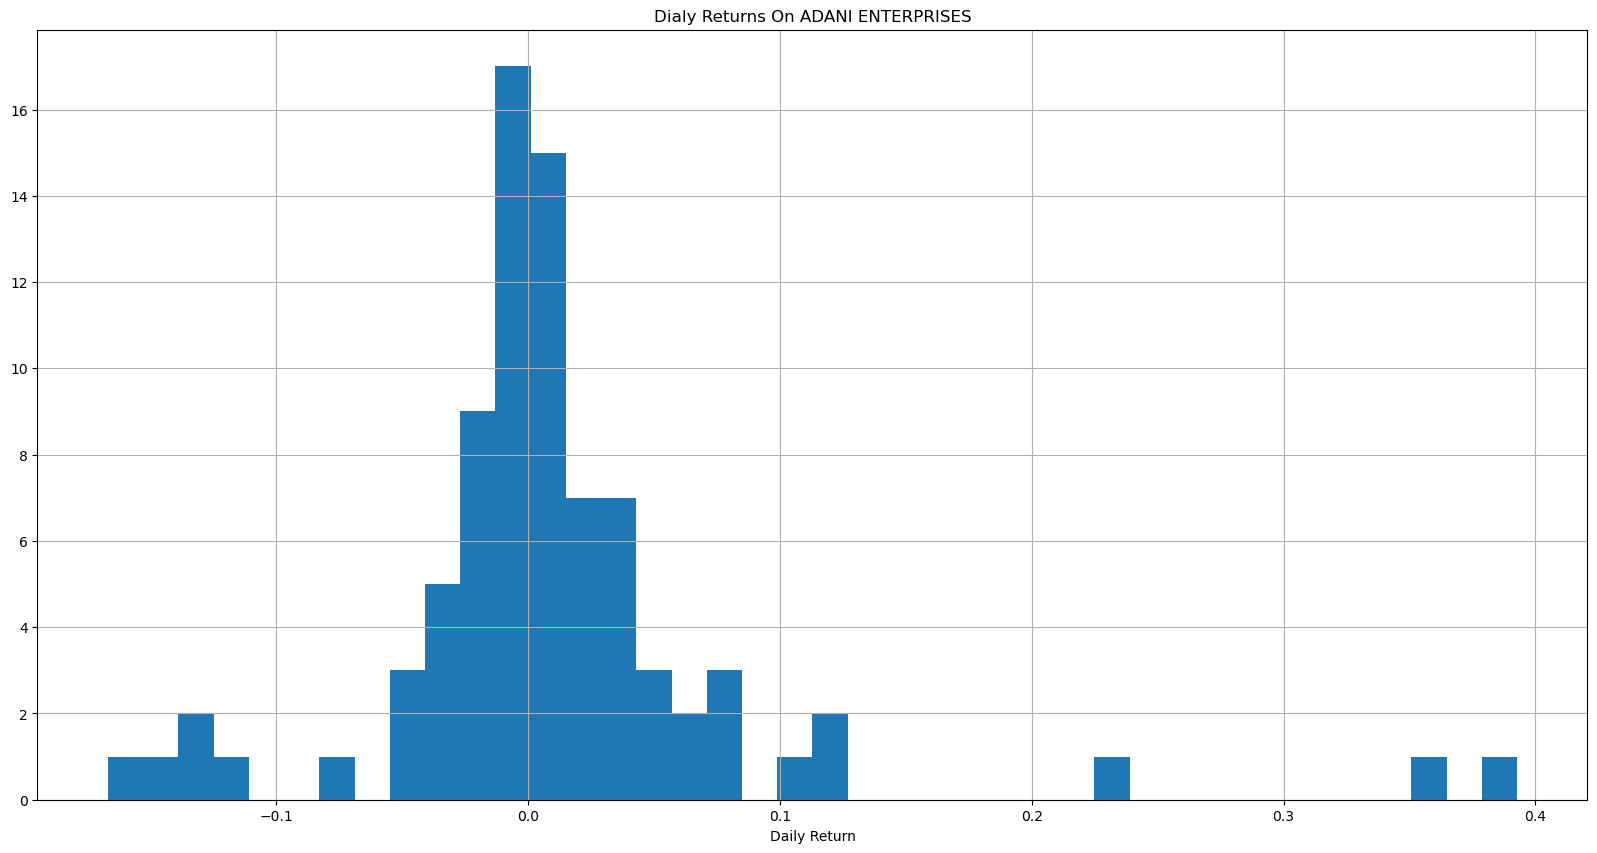

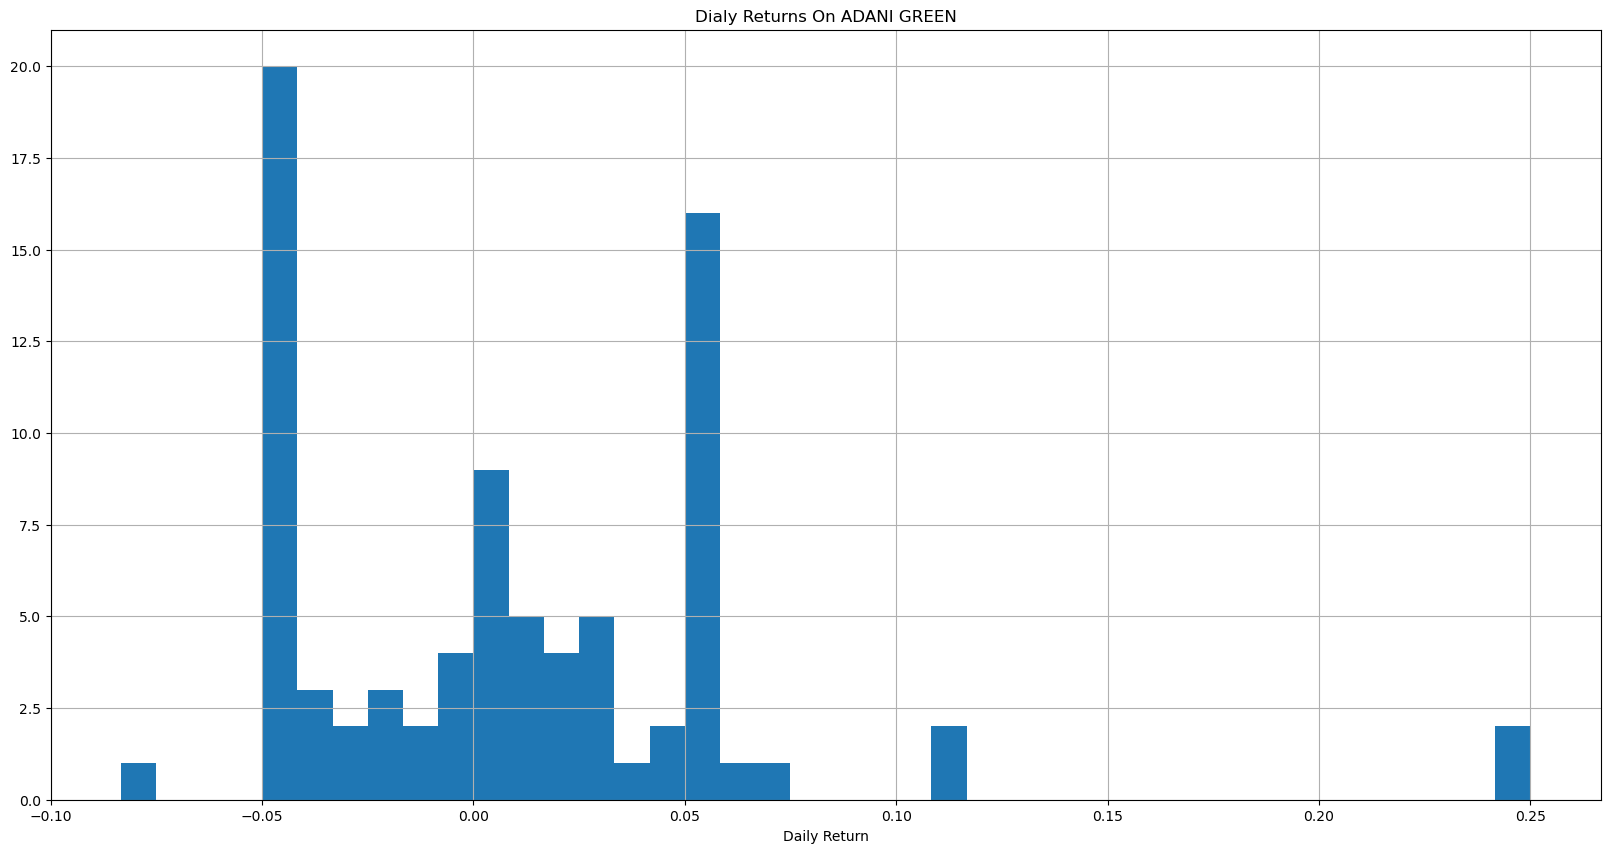

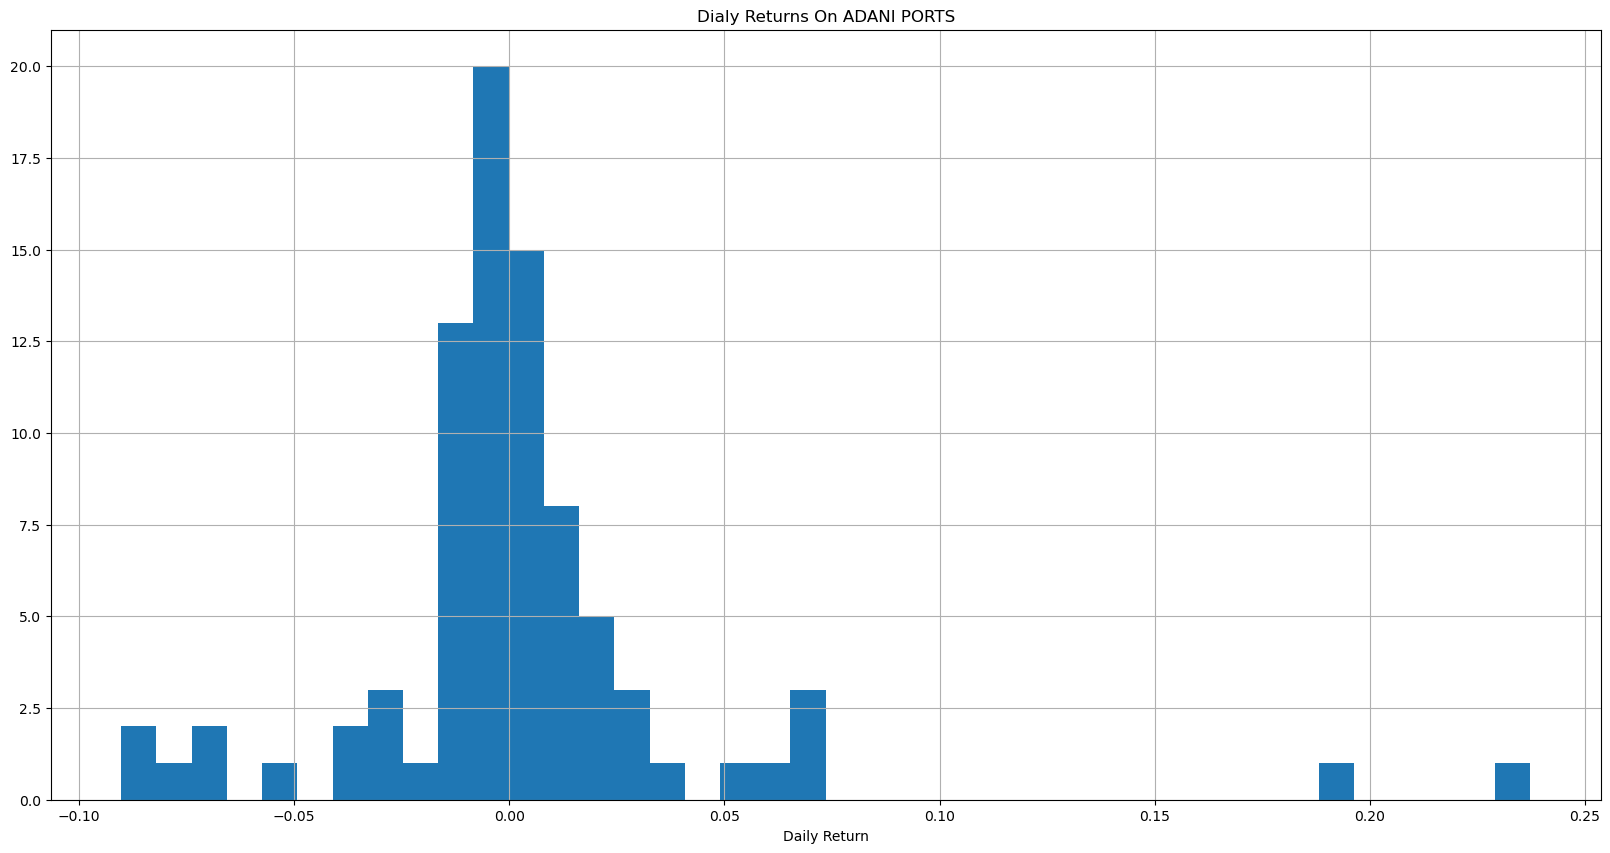

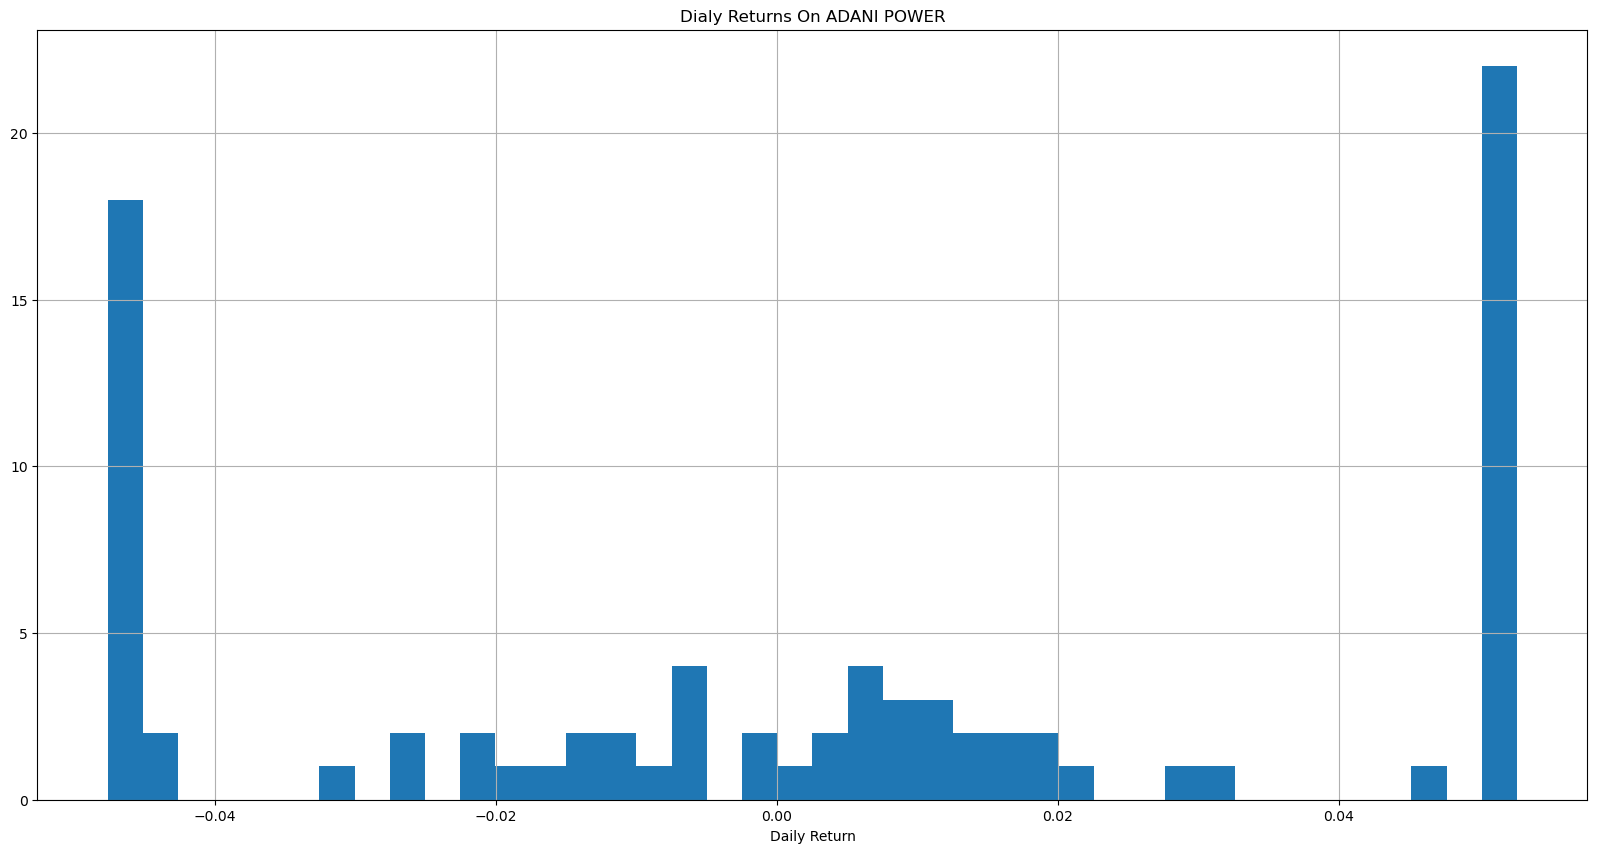

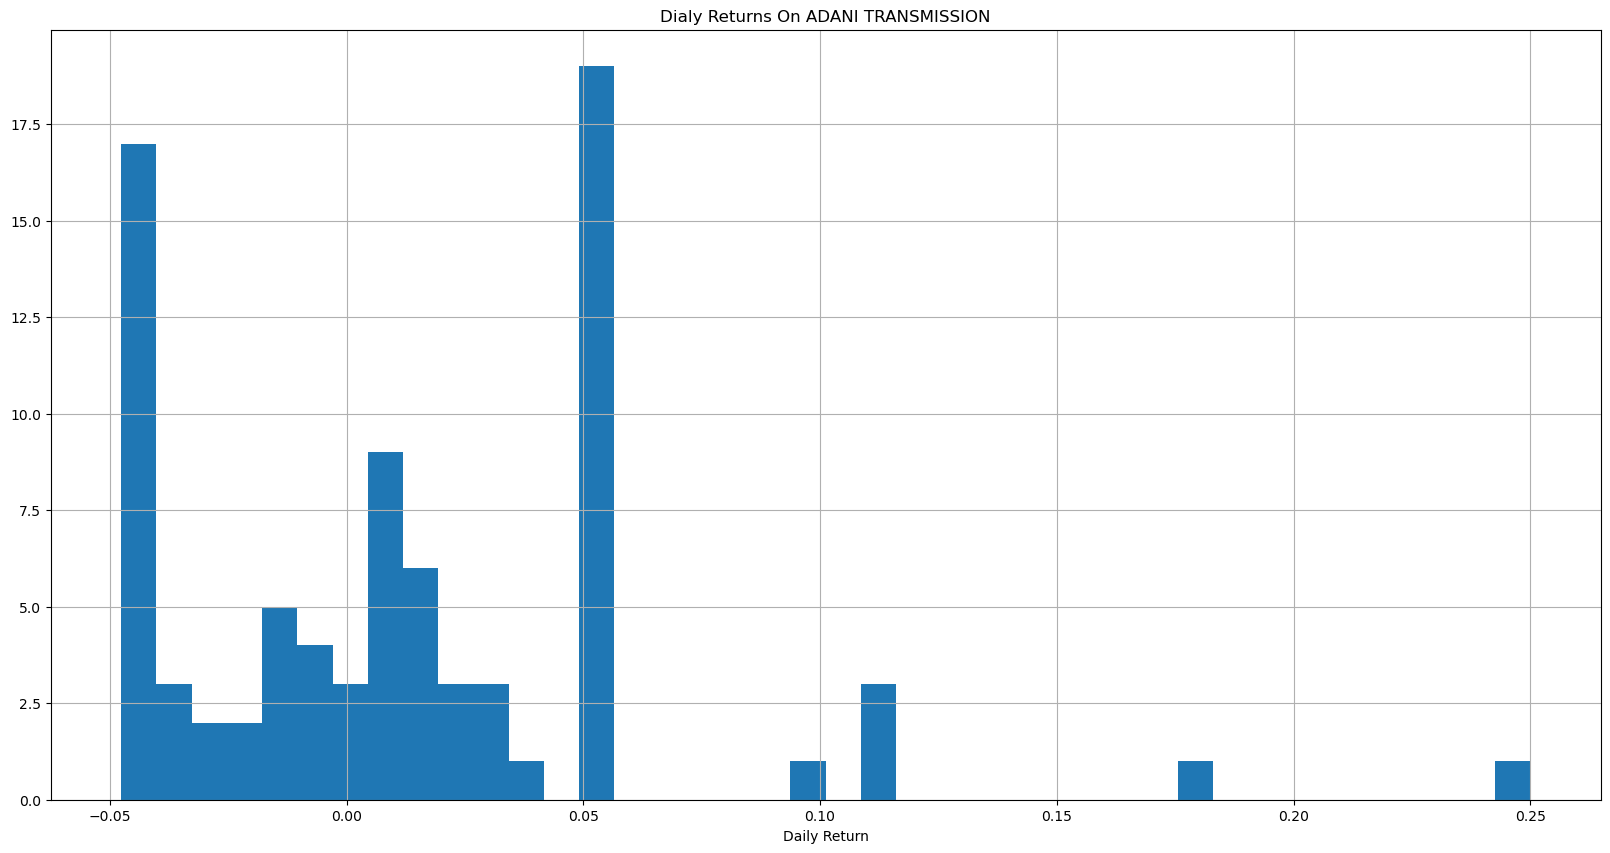

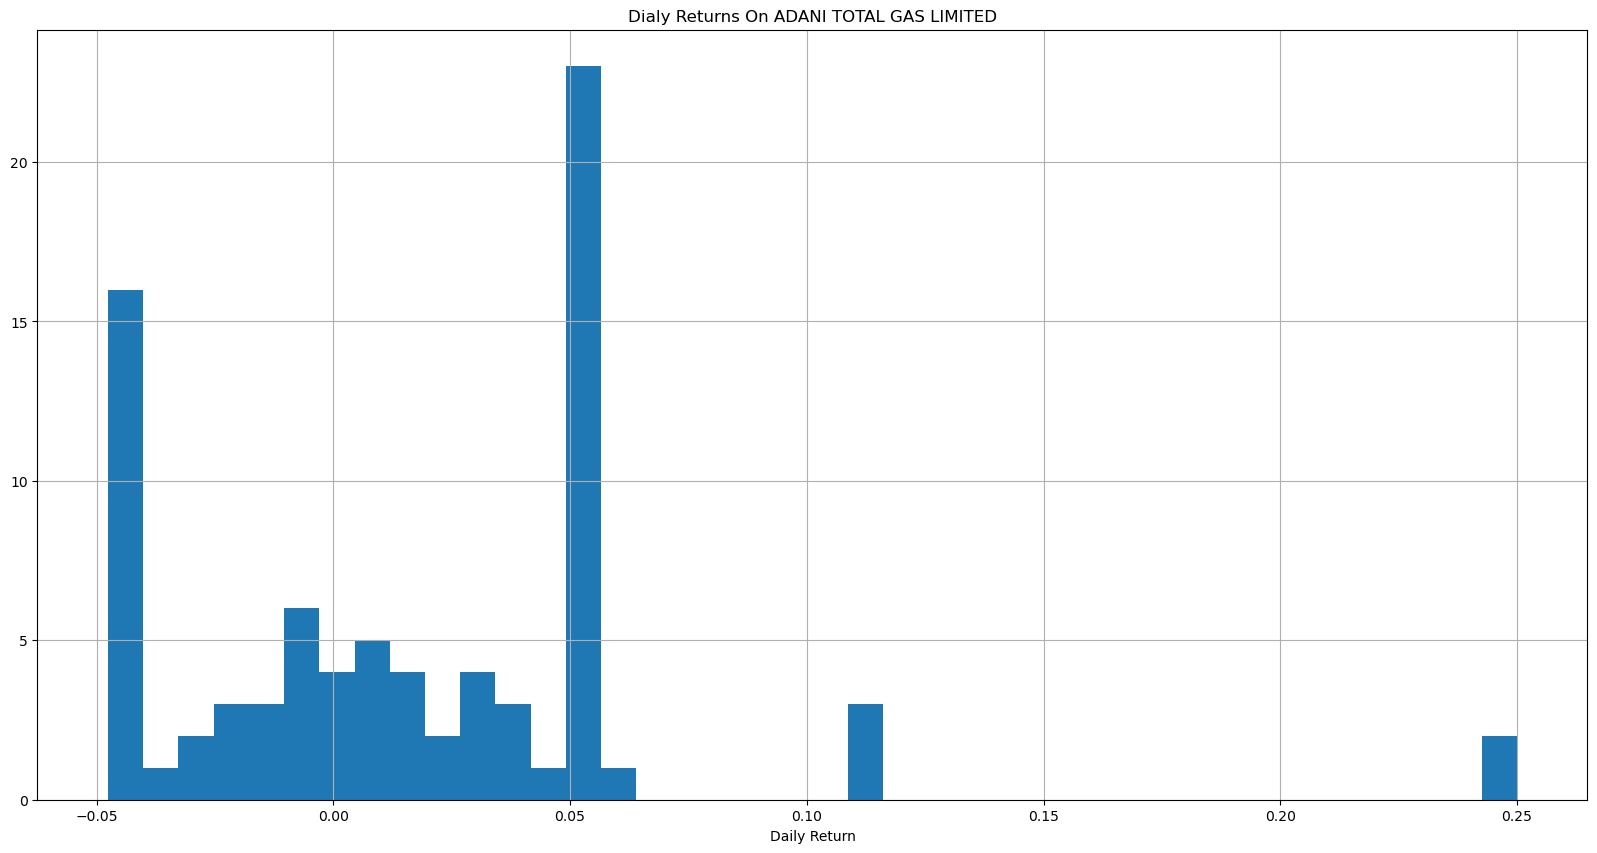

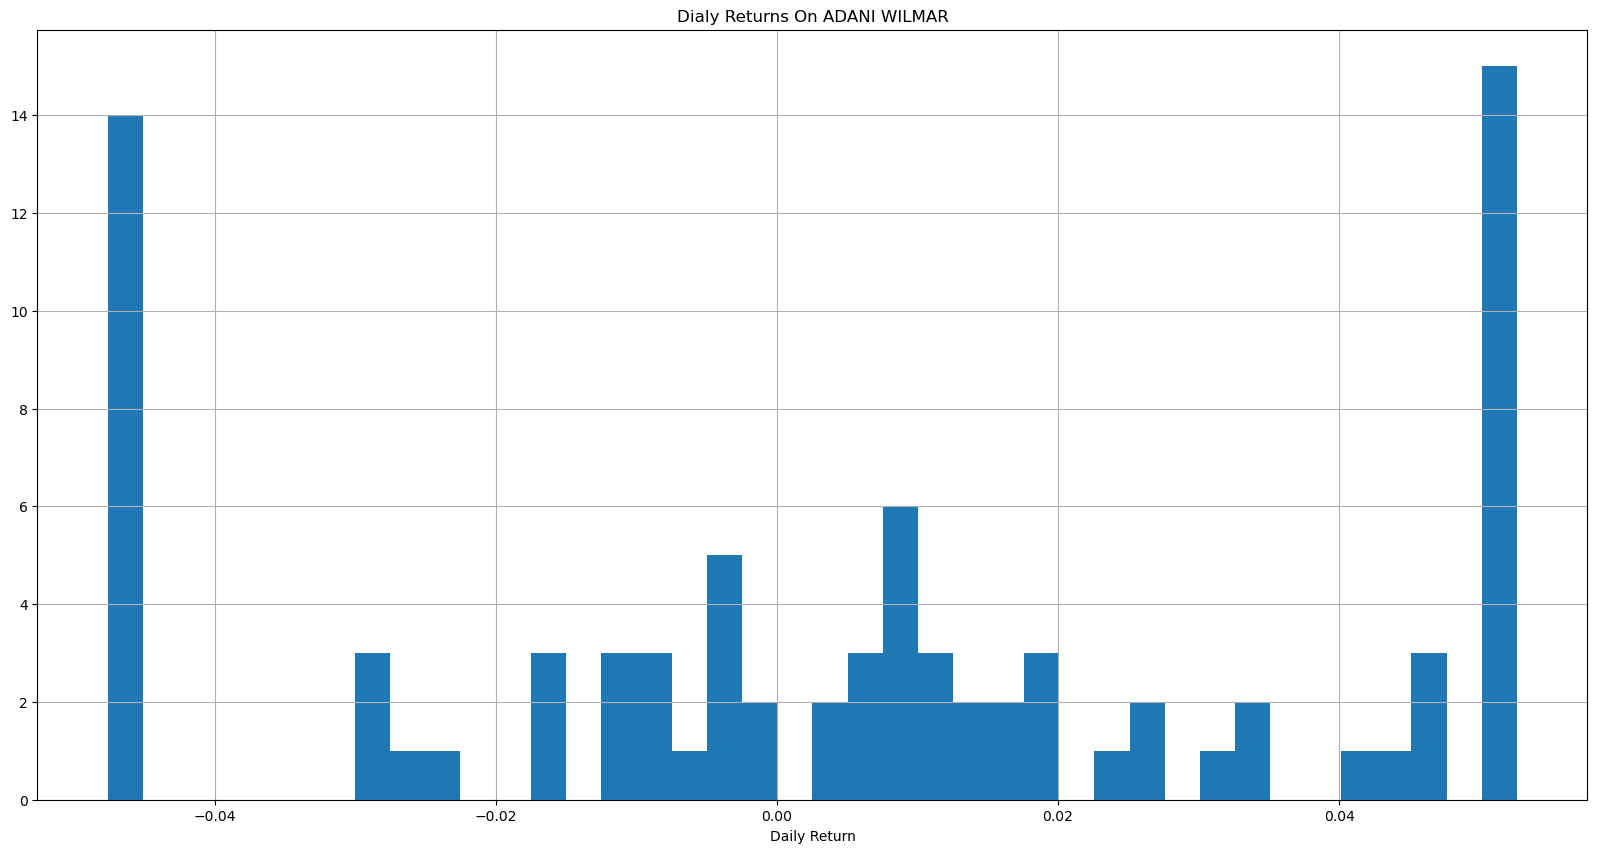

In [38]:
daily_returns(df1,'ADANI ENTERPRISES')
daily_returns(df2,'ADANI GREEN')
daily_returns(df3,'ADANI PORTS')
daily_returns(df4,'ADANI POWER')
daily_returns(df5,'ADANI TRANSMISSION')
daily_returns(df6,'ADANI TOTAL GAS LIMITED')
daily_returns(df7,'ADANI WILMAR')

In [39]:
def daily_exch(df,name):

    fig=px.histogram(df,x='Date',y='No of trades',
                     template='plotly_dark',
                     nbins=53,
                     color_discrete_sequence=['rgb(229,134,6)'],
                     title='{} Volume (Transactions)'.format(name))
    fig.show()  
    

In [40]:
daily_exch(df1,'ADANI ENTERPRISES')
daily_exch(df2,'ADANI GREEN')
daily_exch(df3,'ADANI PORTS')
daily_exch(df4,'ADANI POWER')
daily_exch(df5,'ADANI TRANSMISSION')
daily_exch(df6,'ADANI TOTAL GAS LIMITED')
daily_exch(df7,'ADANI WILMAR')

**Analysing change in the turnover**

In [41]:
def val_change(df,name):
    fig=px.line(df,x='Date',y='VALUE',
                     template='plotly_dark',
                     color_discrete_sequence=['plum'],
                     title='{} Turnover Over Time'.format(name)
               )
    fig.show()

In [42]:
val_change(df1,'ADANI ENTERPRISES')
val_change(df2,'ADANI GREEN')
val_change(df3,'ADANI PORTS')
val_change(df4,'ADANI POWER')
val_change(df5,'ADANI TRANSMISSION')
val_change(df6,'ADANI TOTAL GAS LIMITED')
val_change(df7,'ADANI WILMAR')

**Comparing Stock Prices of ADANI Group Companies**

In [43]:
def new_df(ptype):
    dfs=['ADANI ENTERPRISES','ADANI GREEN','ADANI PORTS','ADANI POWER',
         'ADANI TRANSMISSION','ADANI TOTAL GAS LIMTED','ADANI WILMAR']
    dict={}
    ds=[df1,df2,df3,df4,df5,df6,df7]
    for i in dfs:
        dict[i]=0
    for i in range(len(dfs)):
        dict[dfs[i]]=ds[i][ptype].mean()
    df=pd.DataFrame(dict,index=['value'])
    df_n = df.T
    df_n.index.names=['Company']
    
    #df_n['serial']=[0,1,2,3,4,5,6]
    
    #df_n.set_index("serial", drop=False, inplace = True)
    #df_n[df_n.columns[0]].rename('Company',inplace=True)
    return df_n

In [44]:
df_open=new_df('OPEN')
df_close=new_df('close')
df_high=new_df('HIGH')
df_low=new_df('LOW')
df_vol=new_df('No of trades')

In [45]:
df_open

value
Company                            
ADANI ENTERPRISES       2242.397024
ADANI GREEN             1072.836905
ADANI PORTS              666.211765
ADANI POWER              209.730357
ADANI TRANSMISSION      1386.312500
ADANI TOTAL GAS LIMTED  1630.019048
ADANI WILMAR             449.435714

In [46]:
df_close

value
Company                            
ADANI ENTERPRISES       2213.166667
ADANI GREEN             1062.668452
ADANI PORTS              662.458824
ADANI POWER              209.451786
ADANI TRANSMISSION      1380.352381
ADANI TOTAL GAS LIMTED  1619.555952
ADANI WILMAR             446.774405

In [47]:
df_high

value
Company                            
ADANI ENTERPRISES       2300.650000
ADANI GREEN             1094.458929
ADANI PORTS              678.604706
ADANI POWER              213.578571
ADANI TRANSMISSION      1415.082143
ADANI TOTAL GAS LIMTED  1657.602381
ADANI WILMAR             457.229167

In [48]:
df_low

value
Company                            
ADANI ENTERPRISES       2141.284524
ADANI GREEN             1044.286310
ADANI PORTS              647.704118
ADANI POWER              205.779167
ADANI TRANSMISSION      1349.940476
ADANI TOTAL GAS LIMTED  1591.653571
ADANI WILMAR             440.158333

In [49]:
df_vol

value
Company                              
ADANI ENTERPRISES       353441.357143
ADANI GREEN              96350.380952
ADANI PORTS             209910.294118
ADANI POWER              71842.976190
ADANI TRANSMISSION       40315.190476
ADANI TOTAL GAS LIMTED   36429.654762
ADANI WILMAR             55742.000000

In [50]:
df_open.columns

Index(['value'], dtype='object')

In [51]:
def compare_(df,name):
    fig=px.histogram(df,x=df.index,y=['value'],
                     template='plotly_dark',
                     nbins=53,
                     color_discrete_sequence=['lavenderblush'],
                     title='comparison of '+name+' for Adani Group Companies'
                     )
    fig.show()


In [52]:
compare_(df_open,'opening price')
compare_(df_close,'closing price')
compare_(df_high,'peak price')
compare_(df_low,'lowest price')
compare_(df_vol,'trade volume')


In [53]:
def compare(price_type):
    plt.figure(figsize=(20,15))
   
    plt.plot(df1['Date'],df1[price_type], label = 'ADANI ENTERPRISES')
    plt.plot(df2['Date'], df2[price_type], label = "ADANI GREEN")
    plt.plot(df3['Date'],df3[price_type], label = "ADANI PORTS")
    plt.plot(df4['Date'], df4[price_type], label = "ADANI POWER")
    plt.plot(df5['Date'],df5[price_type], label = "ADANI TRANSMISSION")
    plt.plot(df6['Date'],df6[price_type], label = "ADANI TOTAL GAS LIMITED")
    plt.plot(df7['Date'],df7[price_type], label = "ADANI WILMAR")
    plt.legend()  
    plt.xlabel("Date")
    plt.ylabel(price_type+" Price") 
    plt.title(price_type +" Price Comparison of AGC")
    plt.show()

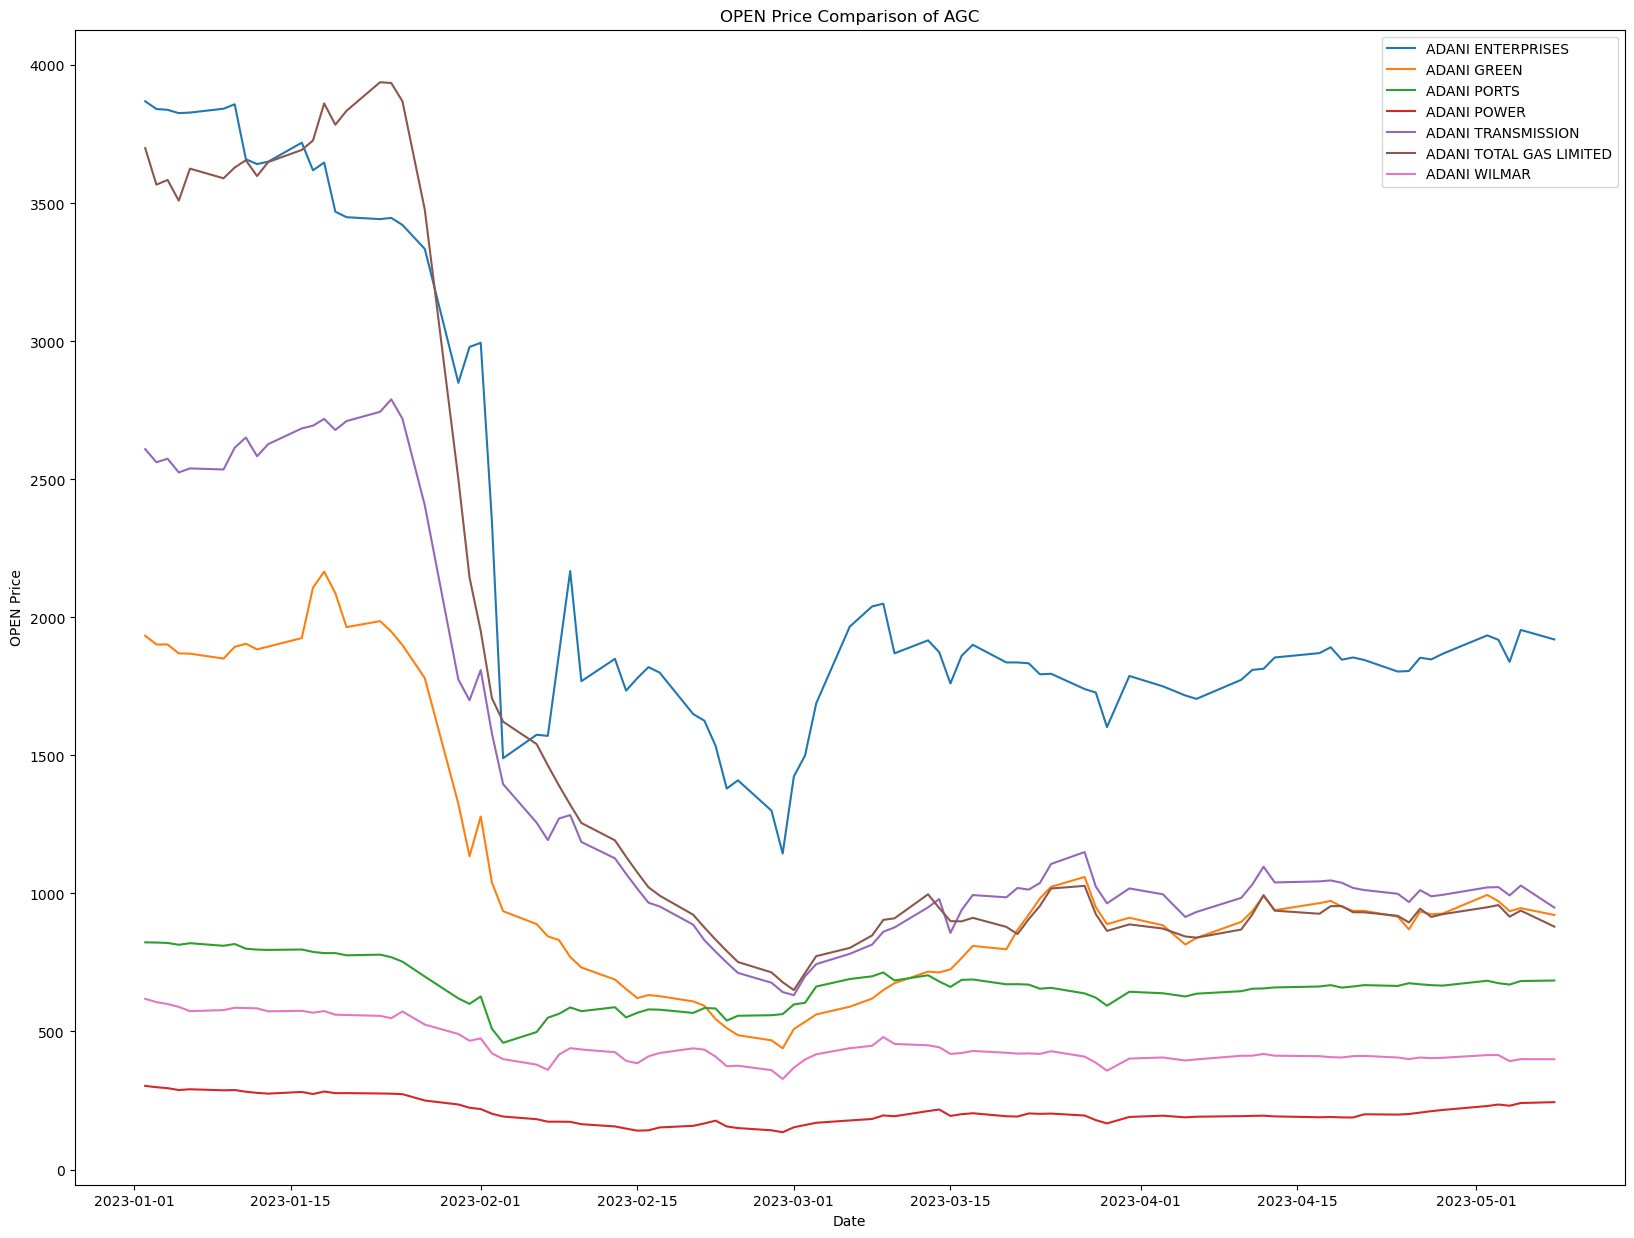

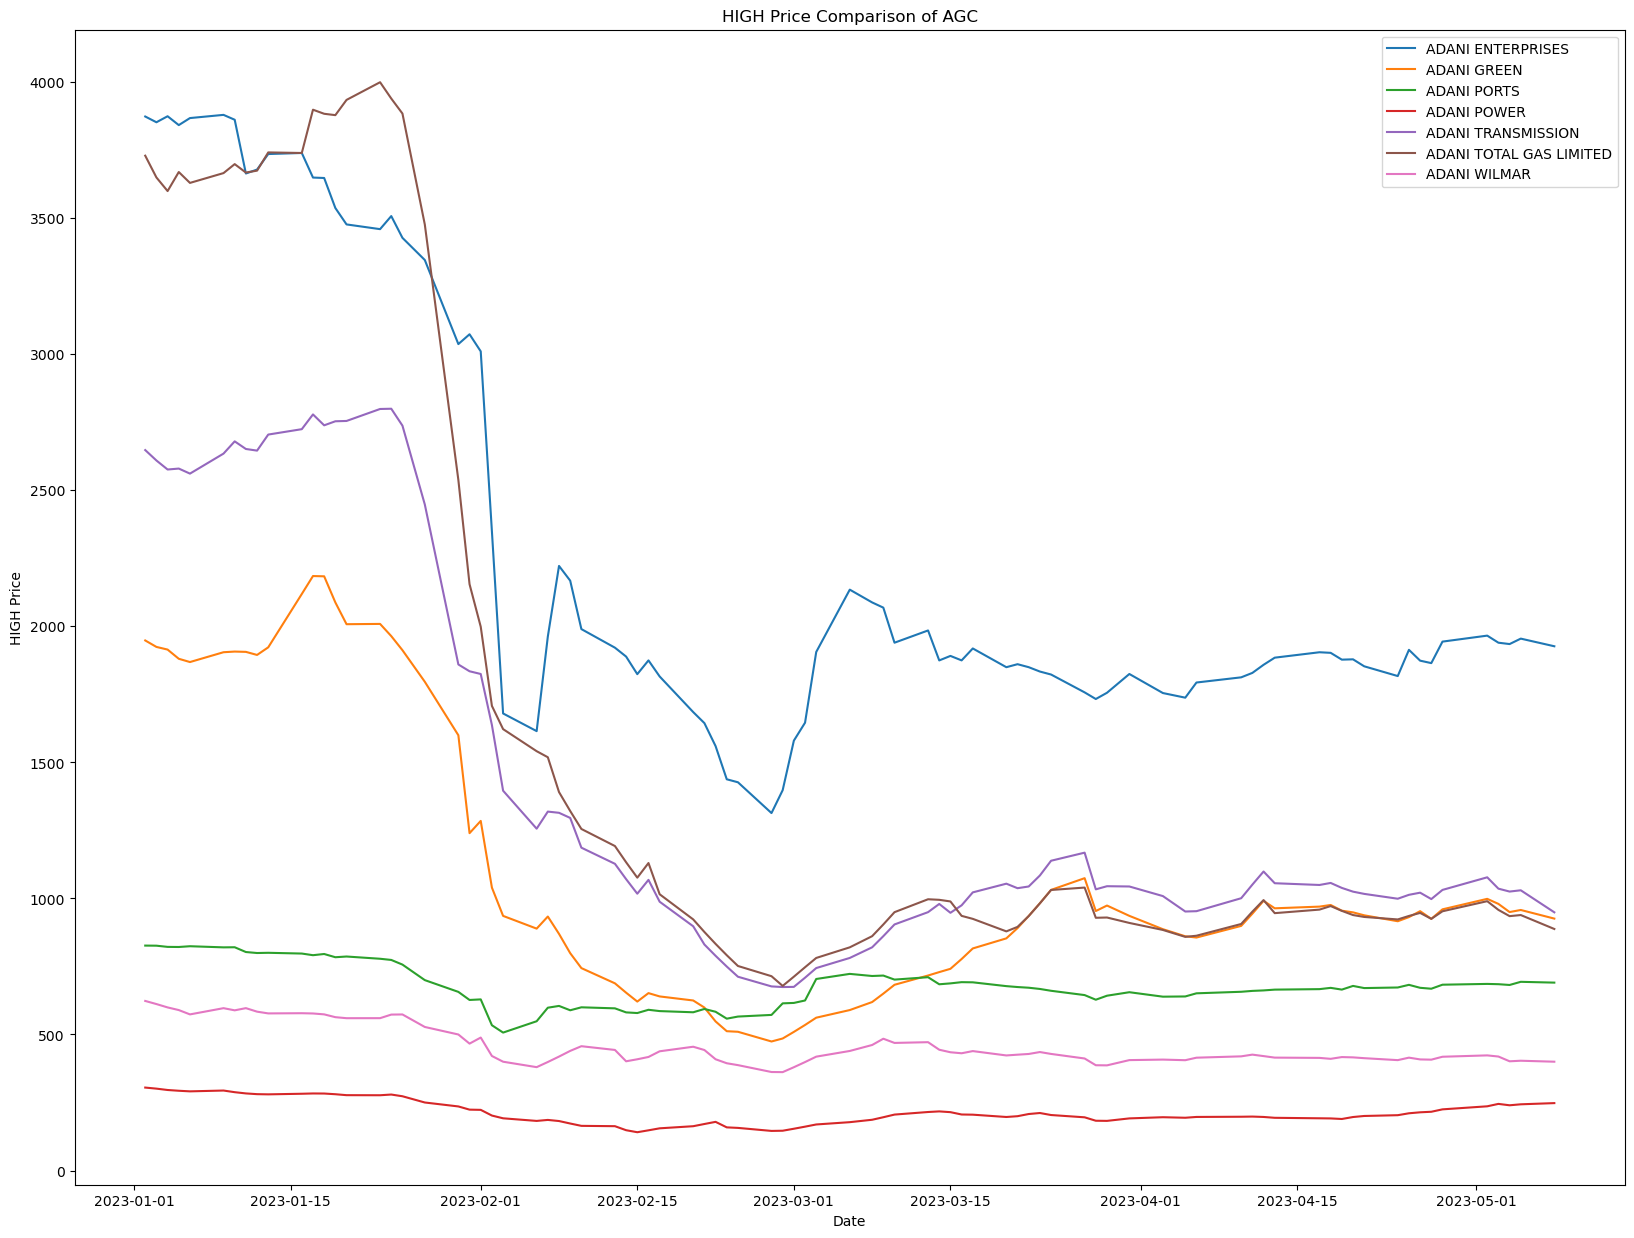

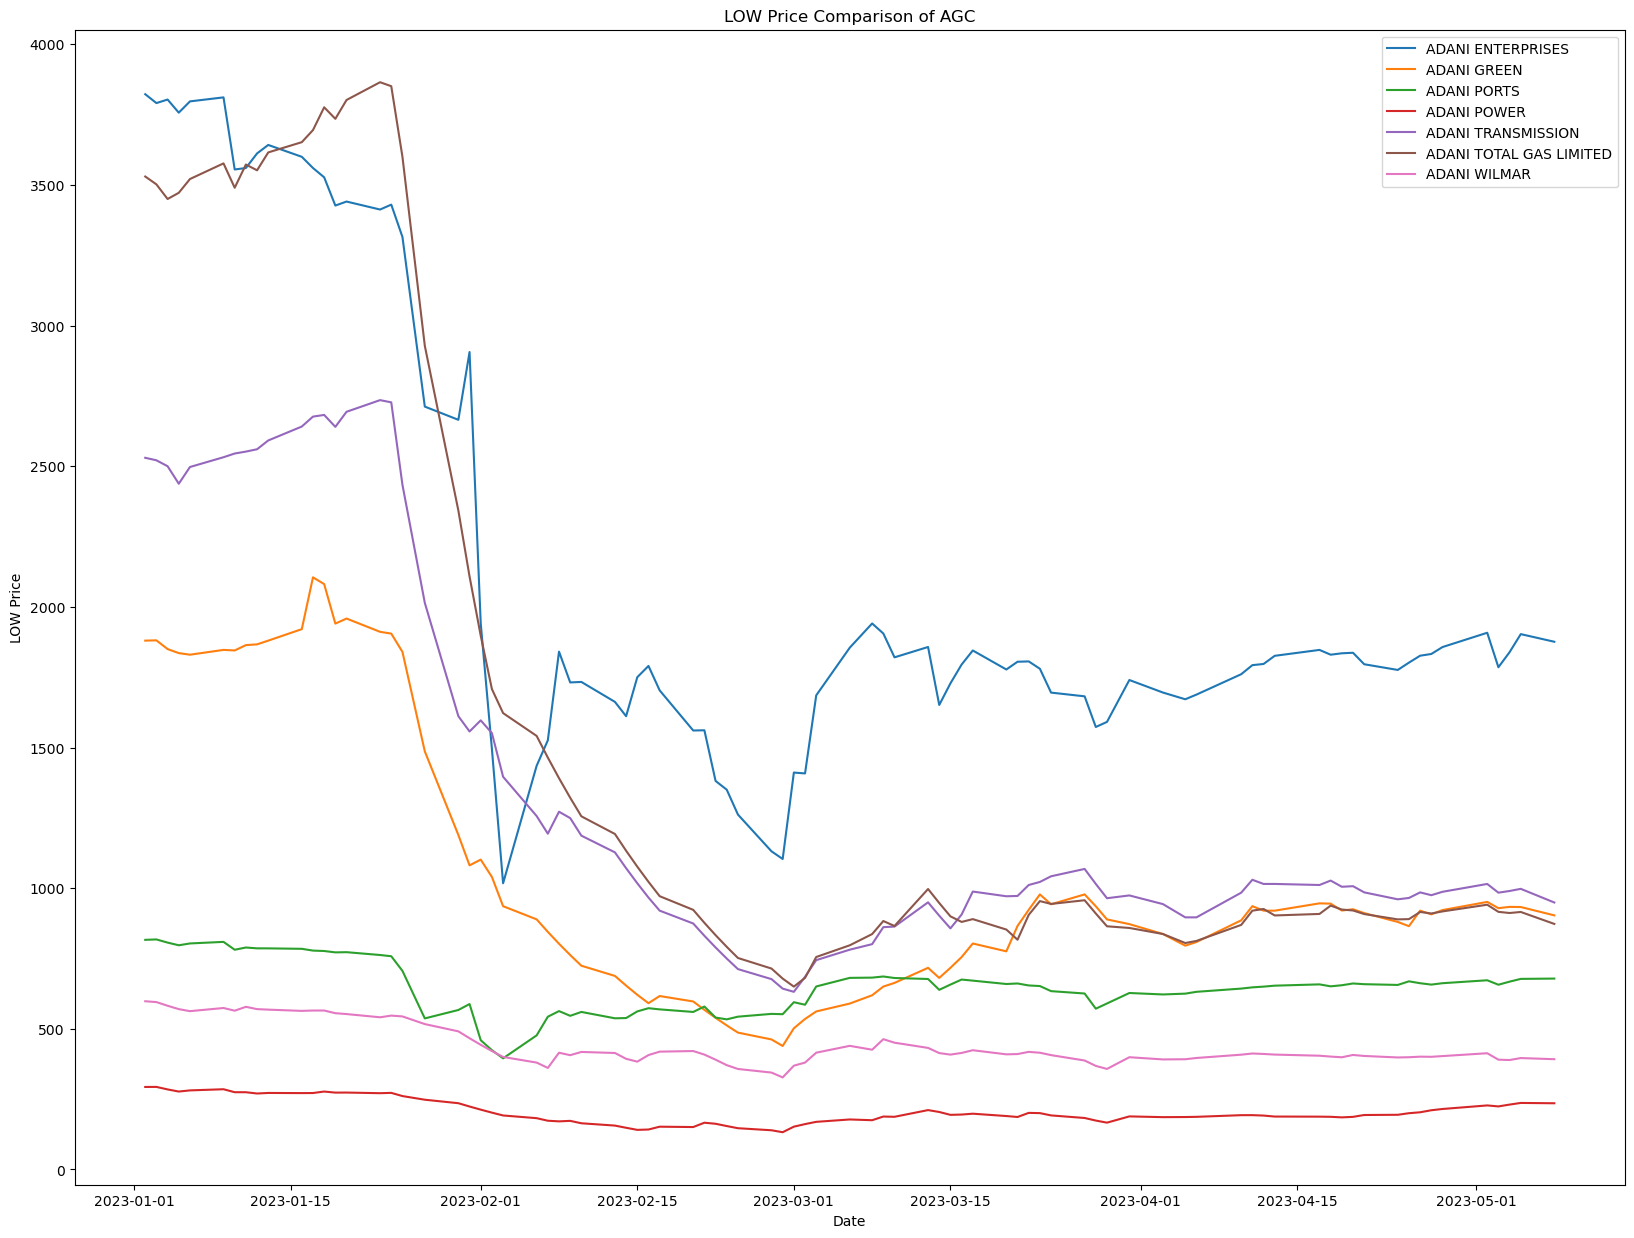

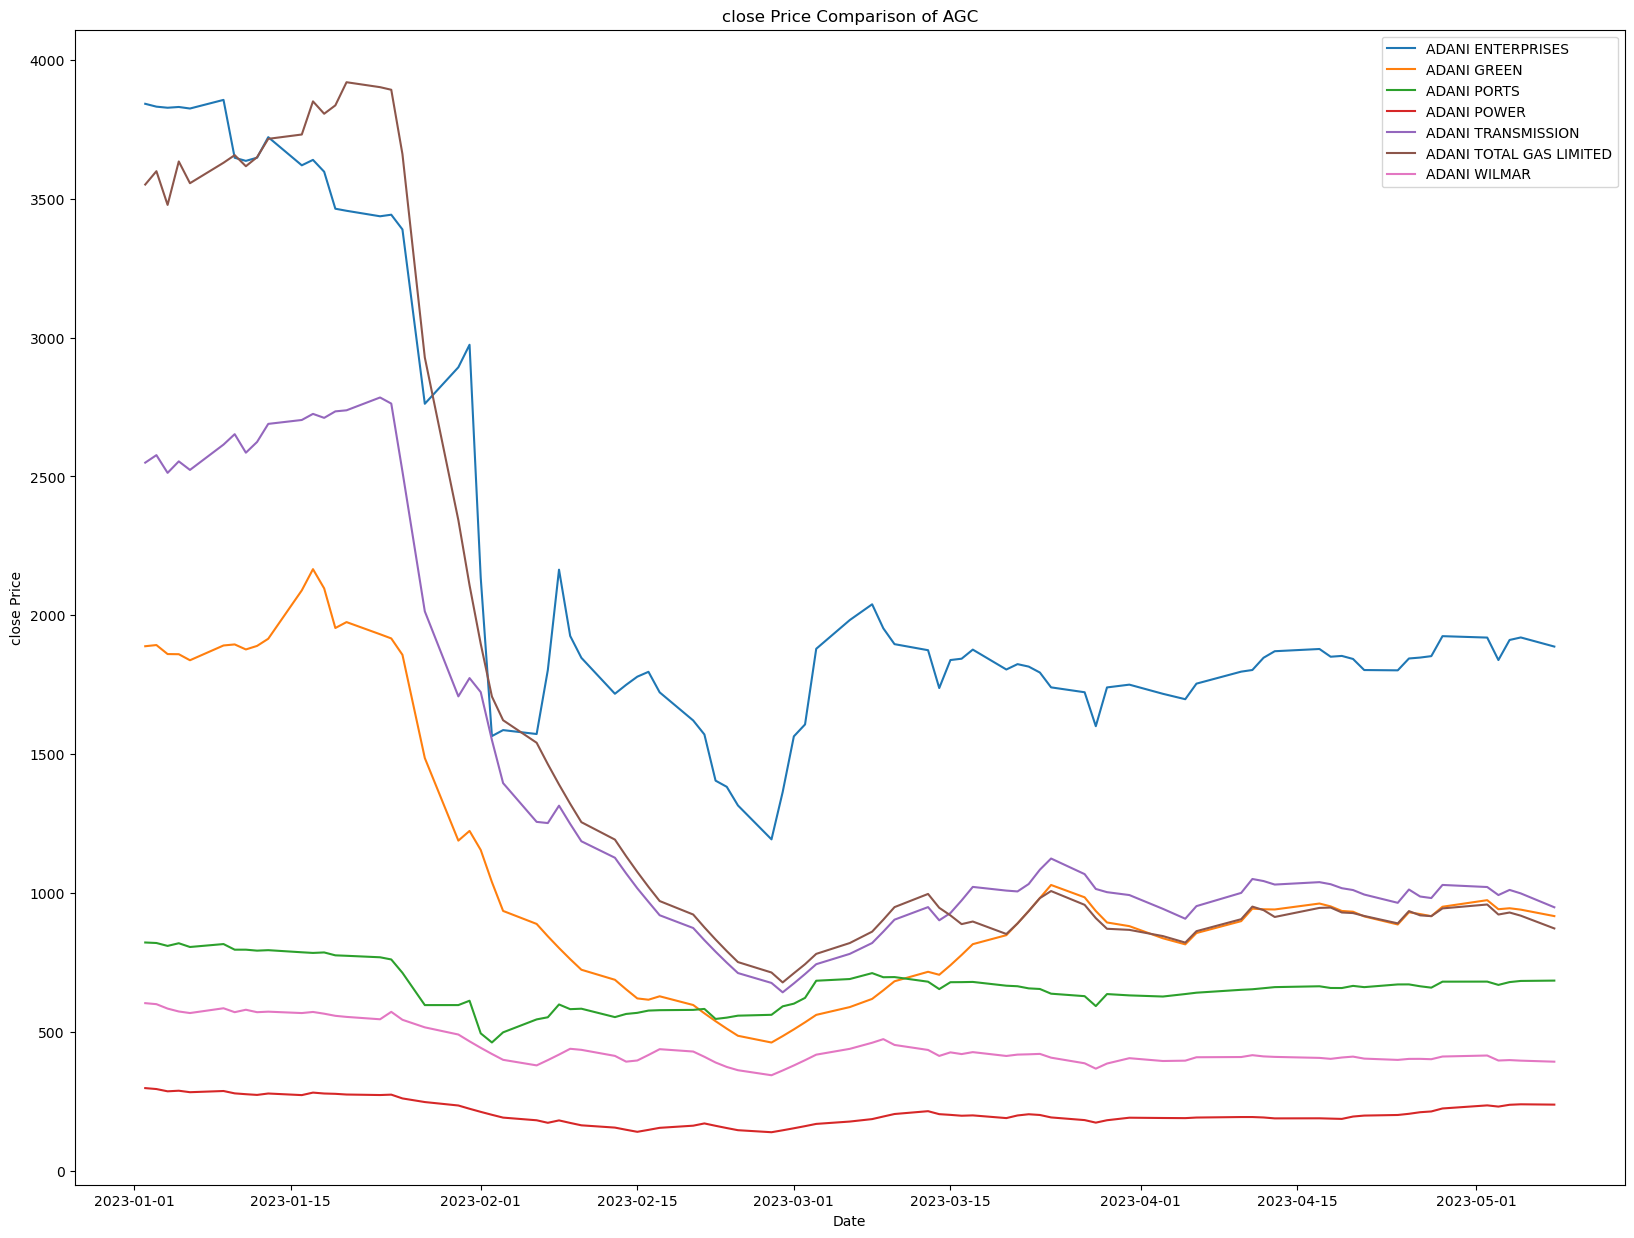

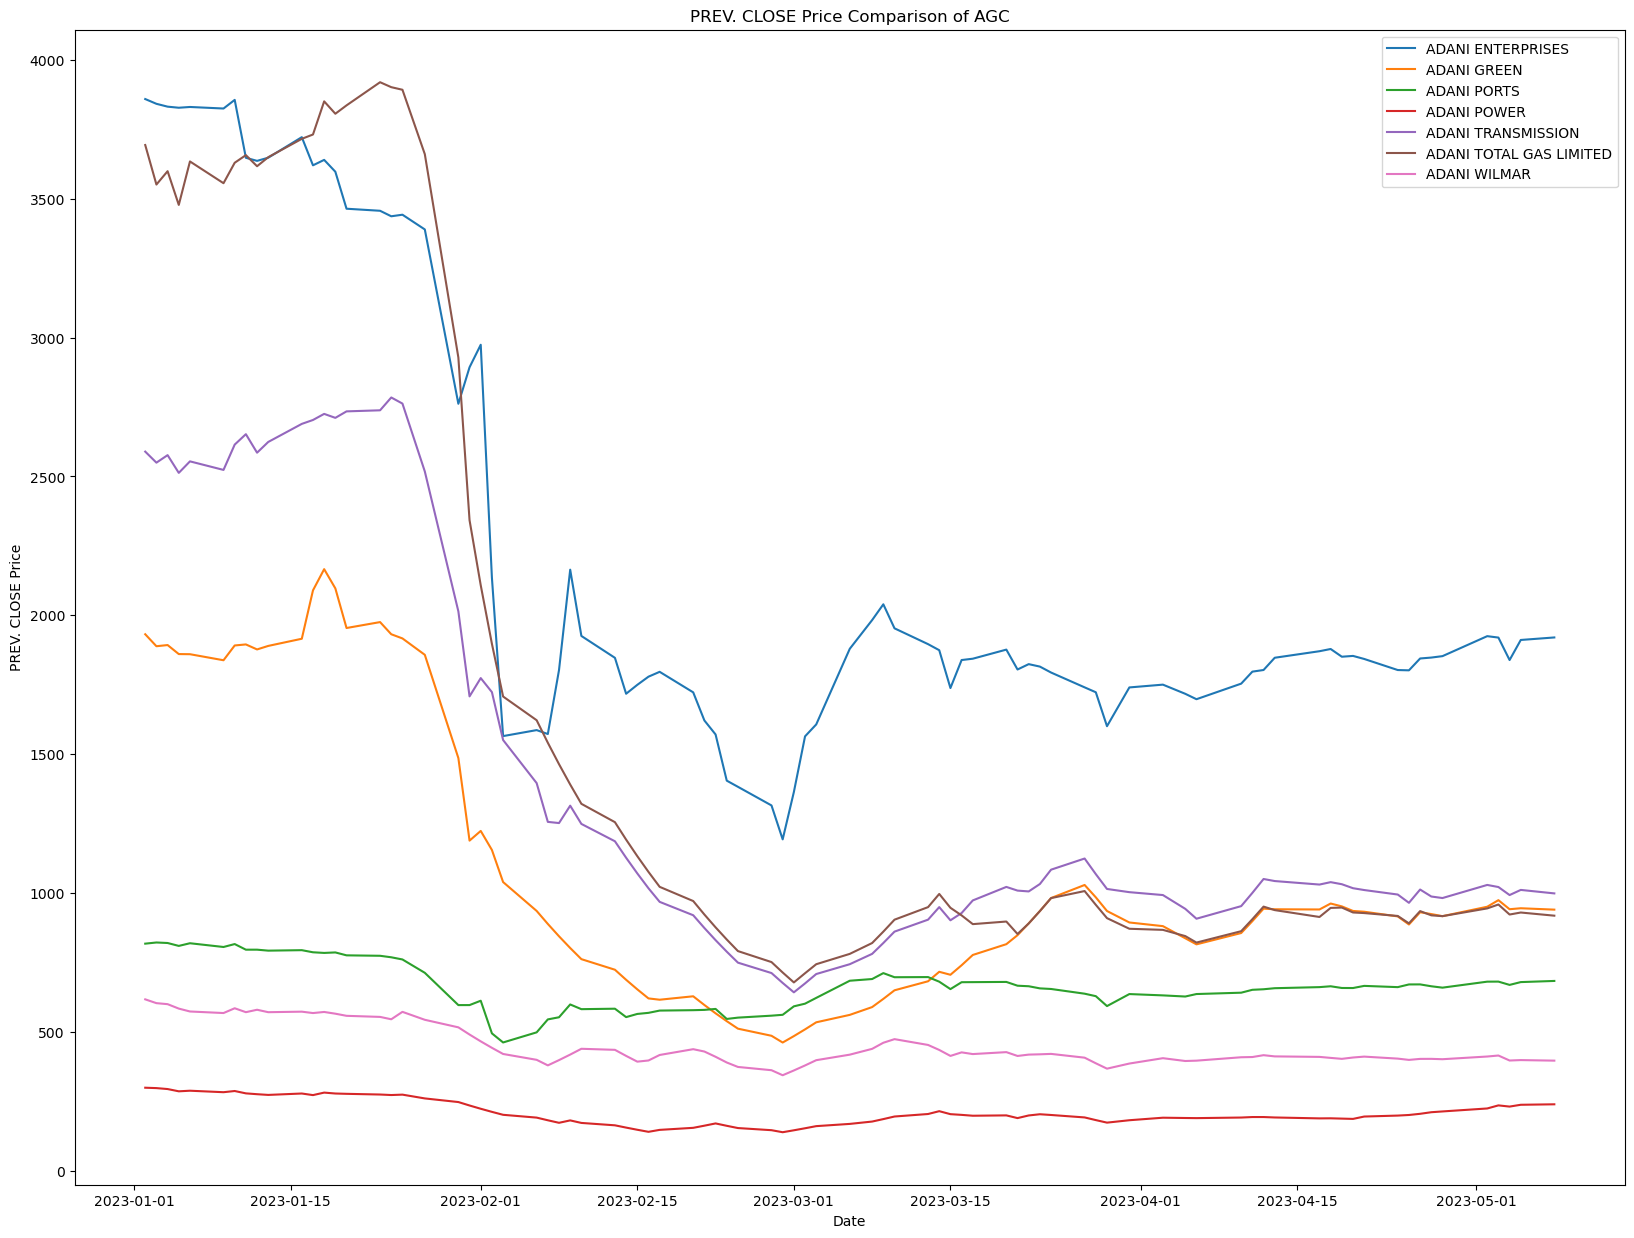

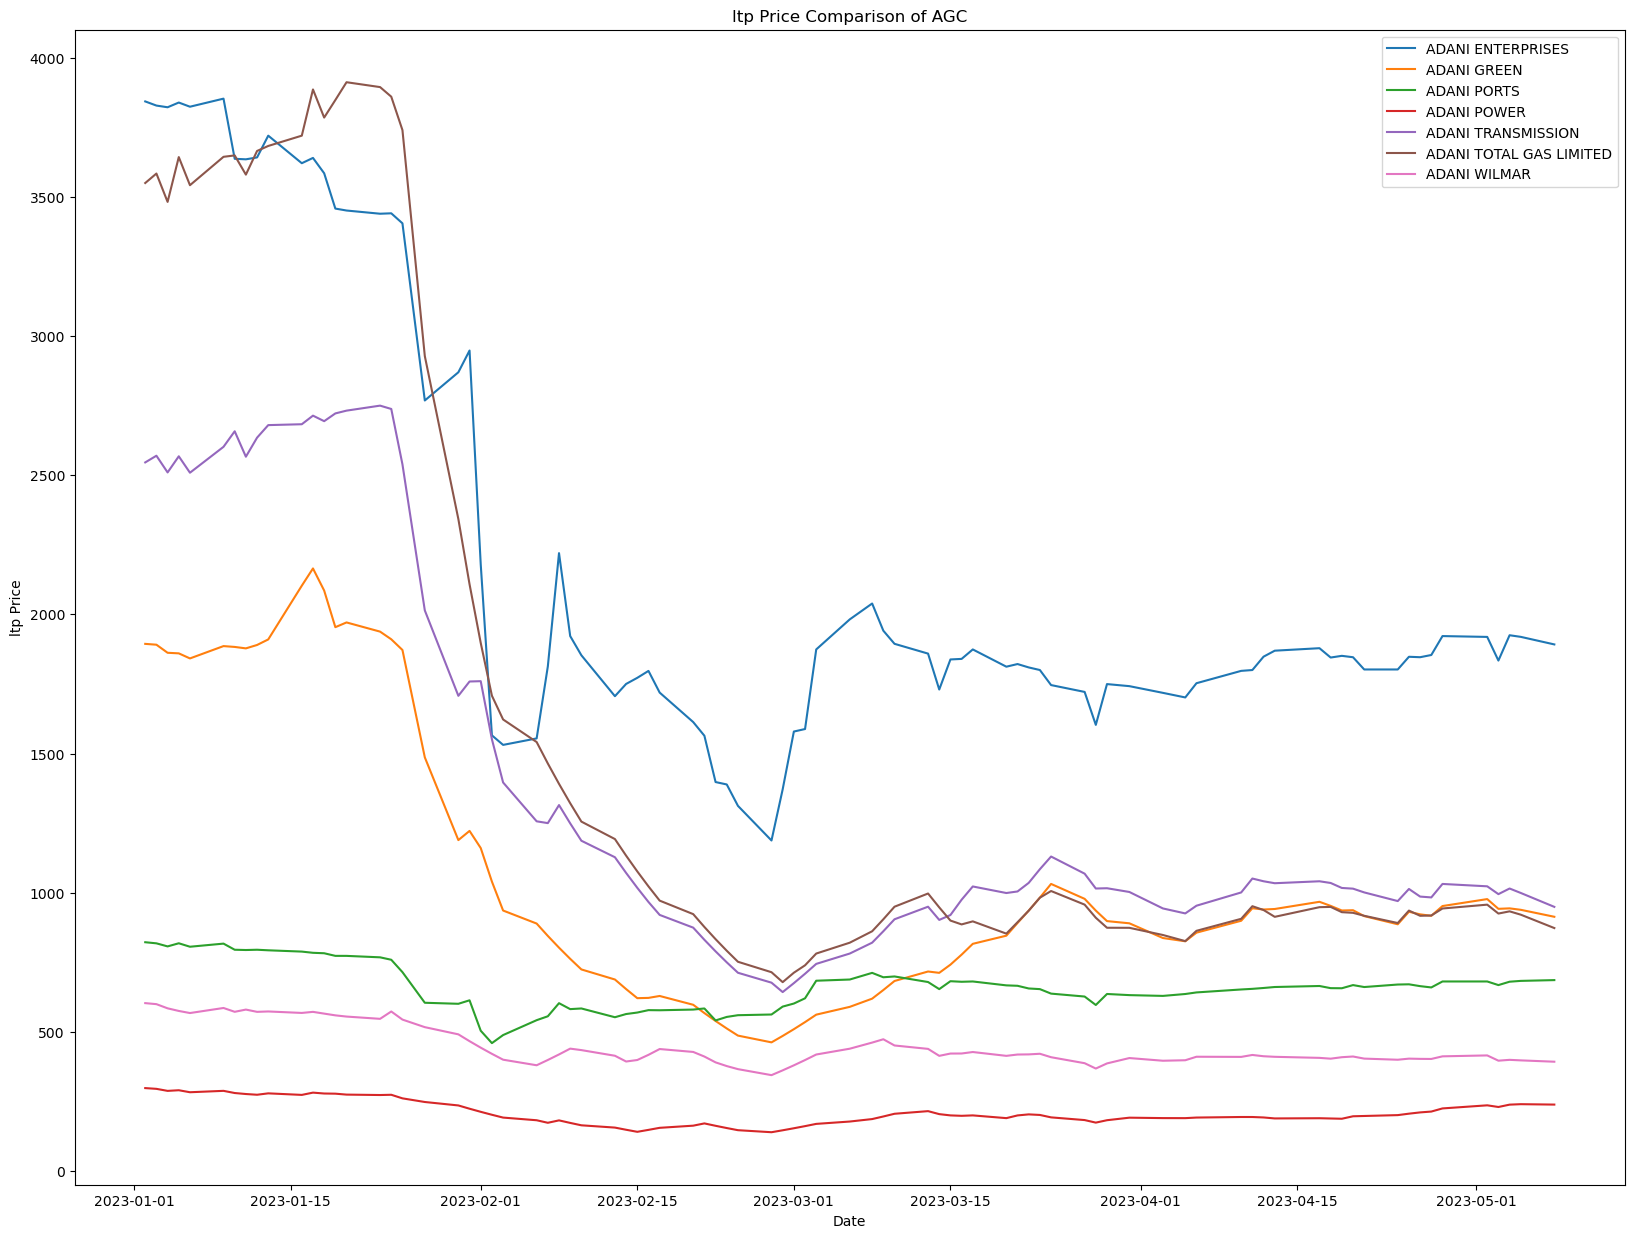

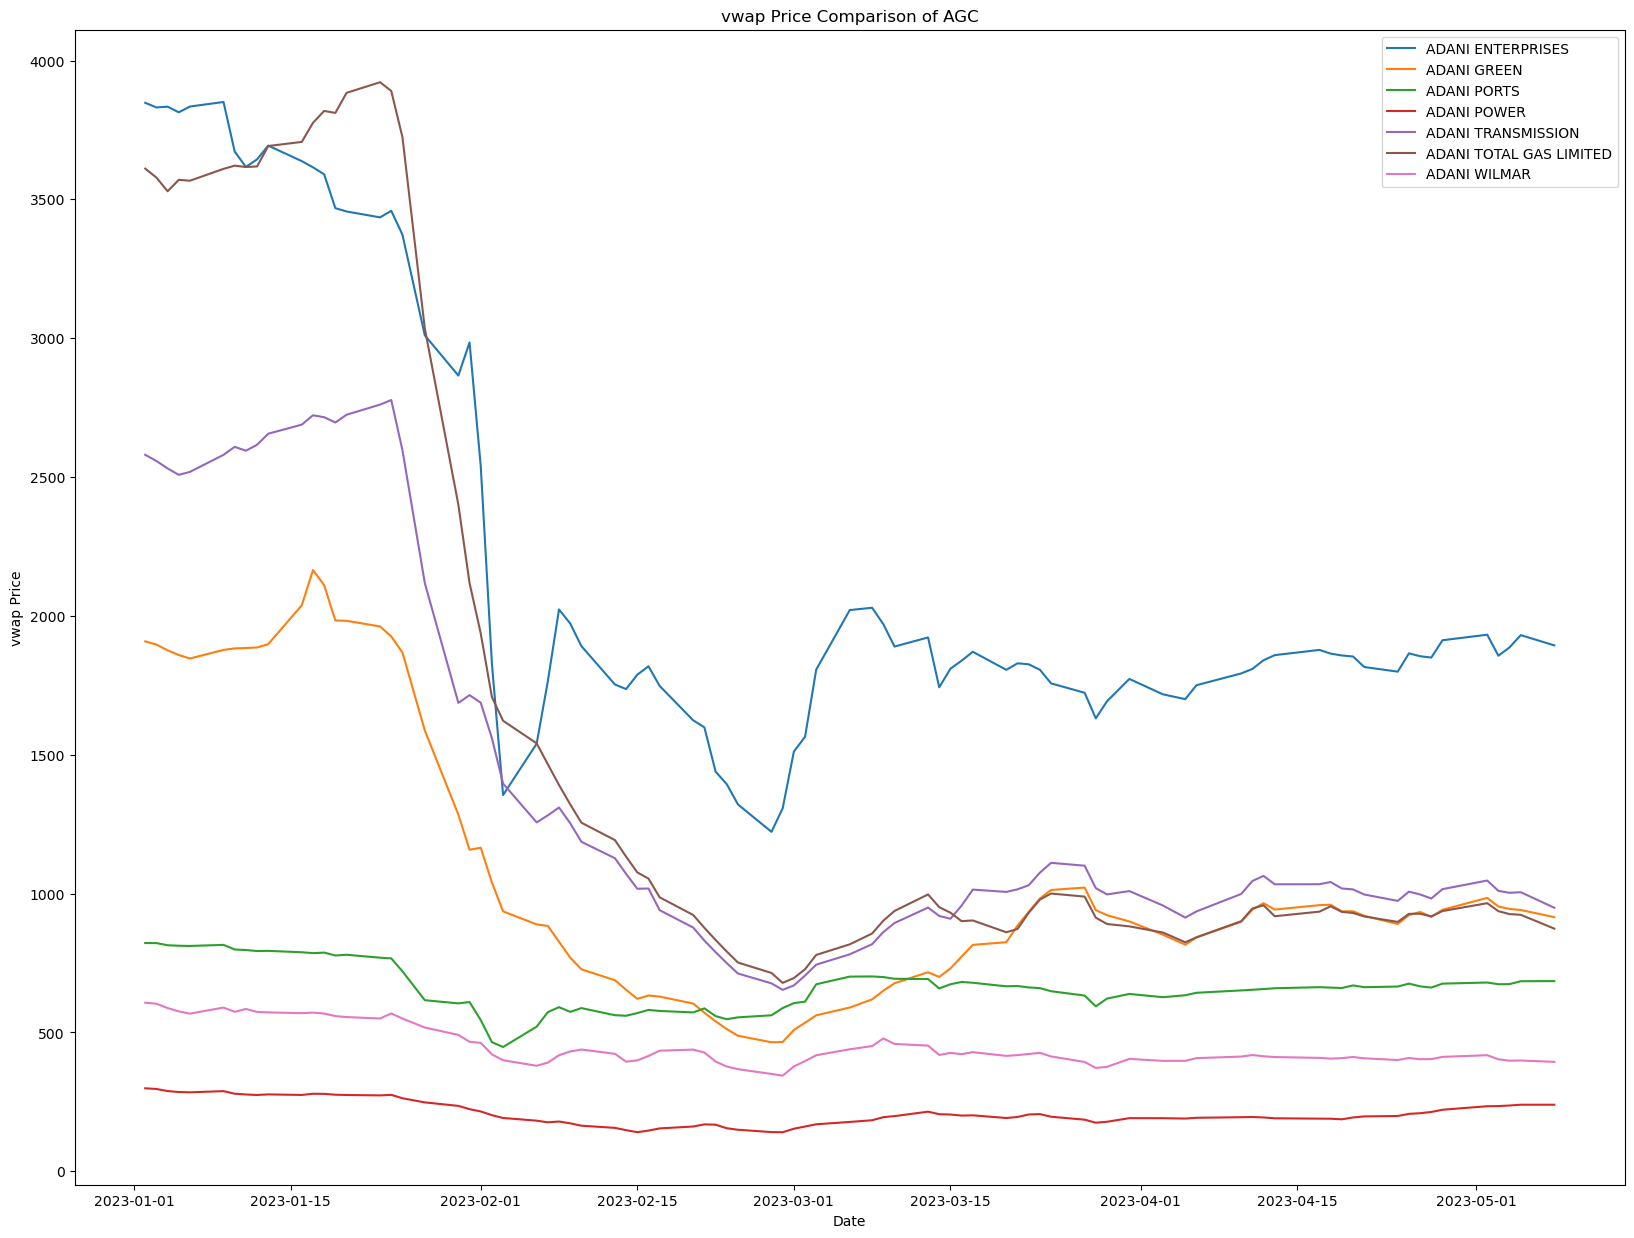

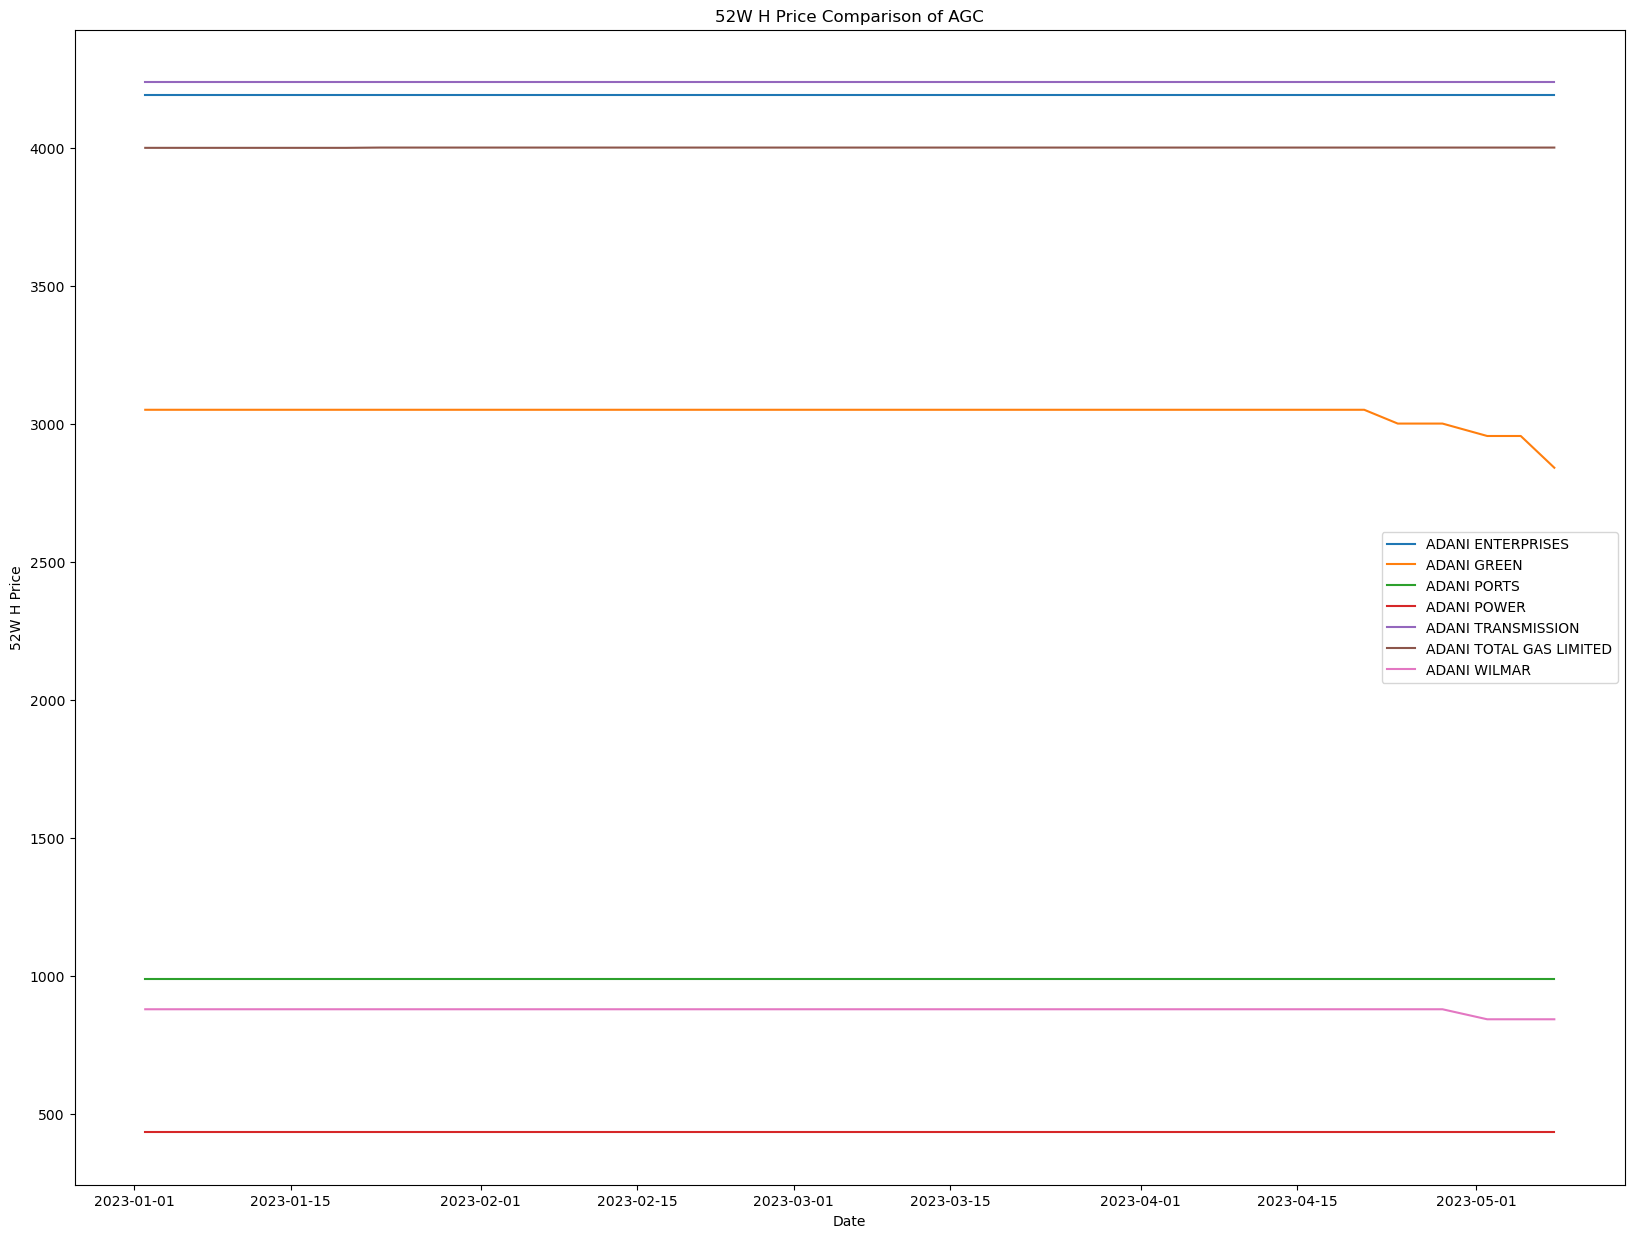

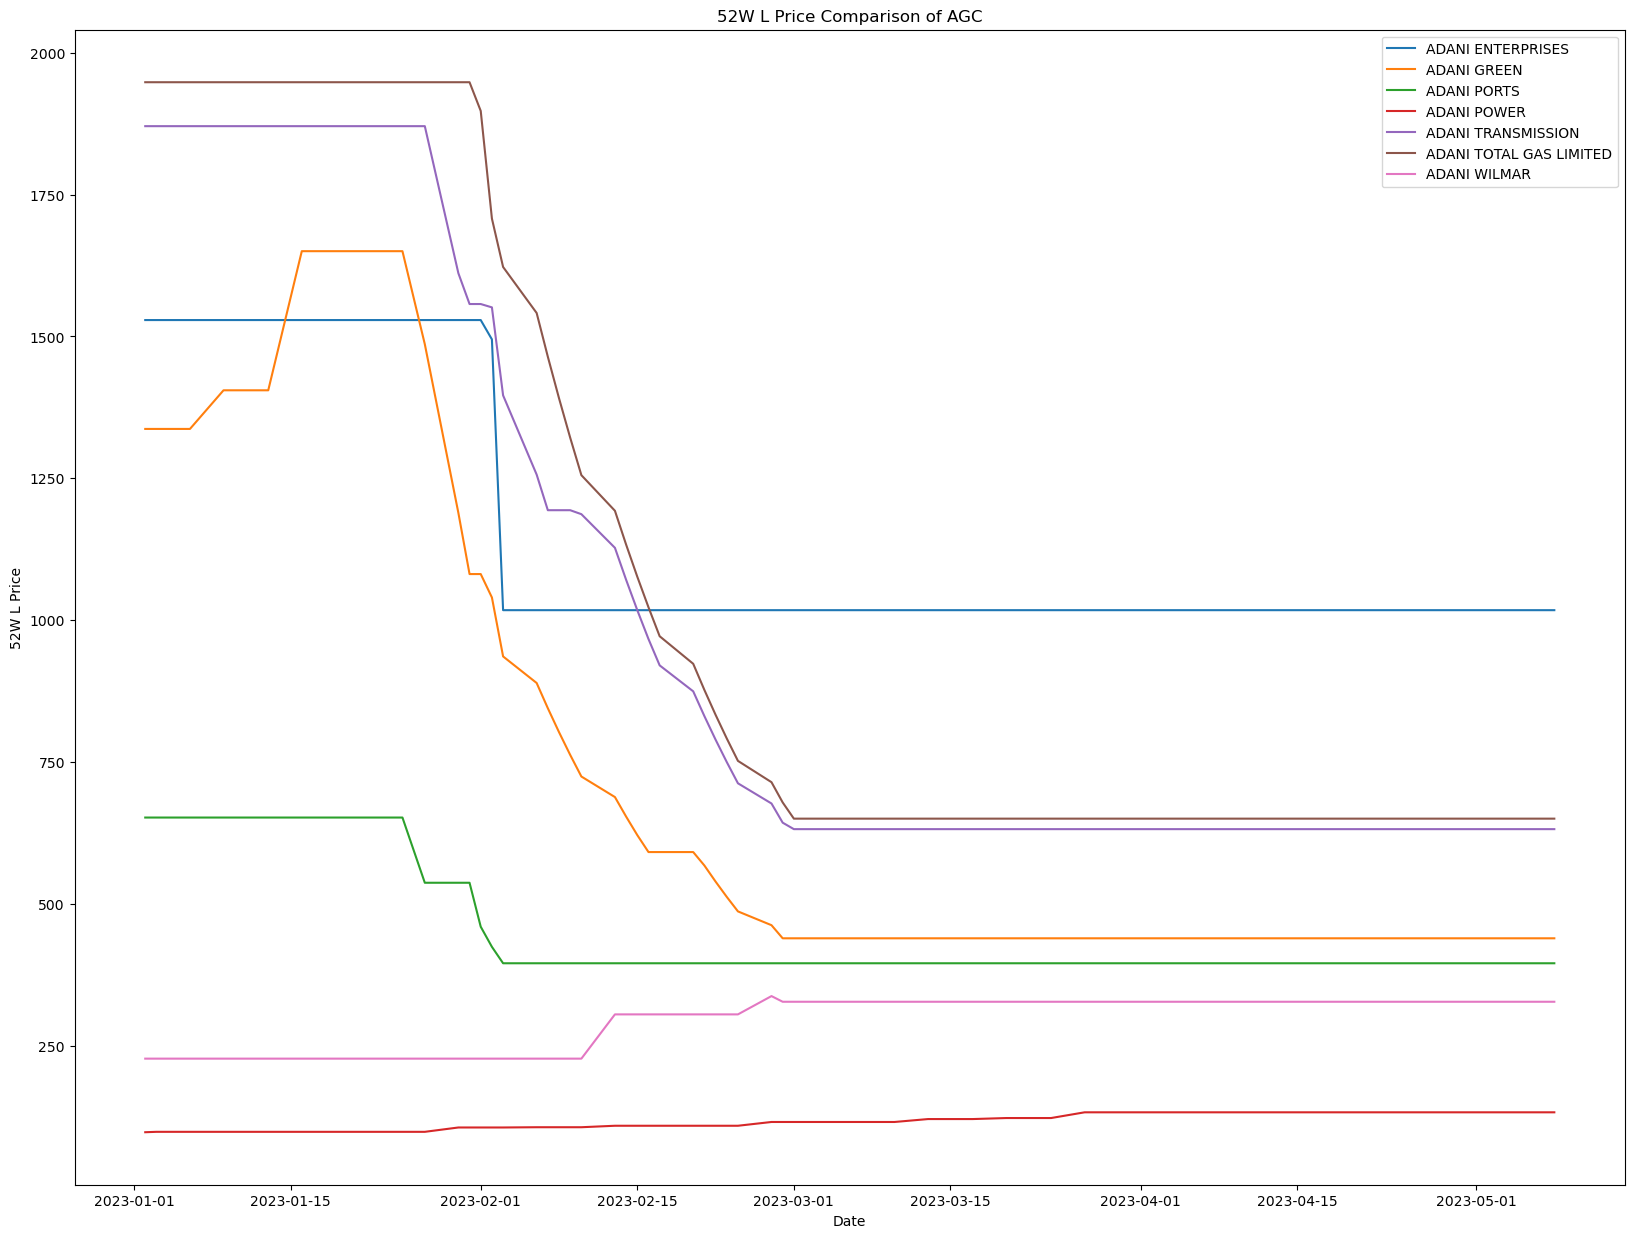

In [54]:
for p in plist:
    compare(p)

If this was helpful, please Upvote :D